## **CAPSTONE PROJECT**

### **SPRINT:1 - DATA CLEANING AND PRE-PROCESSING**

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector as sql
import pymysql

In [4]:
# Loading the datasets
appearances = pd.read_excel("appearances.xlsx")
game_events = pd.read_excel("game_events.xlsx")
game_lineups = pd.read_excel("game_lineups.xlsx")
games = pd.read_excel("games.xlsx")
players = pd.read_excel("players.xlsx")
test_data=pd.read_excel("test data.xlsx")

#### **1) Appearances**

In [6]:
appearances

appearance_id  game_id  player_id       date          player_name  \
0     2224728_119169  2224728     119169 2012-07-13      Aron Johannsson   
1     2224732_161244  2224732     161244 2012-07-14        Conor O'Brien   
2      2224729_39467  2224729      39467 2012-07-15     Clarence Goodson   
3     2232104_119169  2232104     119169 2012-07-19      Aron Johannsson   
4      2219794_39475  2219794      39475 2012-07-22       Sacha Kljestan   
...              ...      ...        ...        ...                  ...   
3563  3415291_537467  3415291     537467 2020-09-26        Joseph Efford   
3564  3415296_367423  3415296     367423 2020-09-26         Chris Durkin   
3565  3431983_478940  3431983     478940 2020-09-26        Reggie Cannon   
3566  3450575_361104  3450575     361104 2020-09-26         Sergino Dest   
3567  3412904_124732  3412904     124732 2020-09-27  John Anthony Brooks   

     competition_id  yellow_cards  red_cards  goals  assists  minutes_played  
0               DK1             0          0      0        0              90  
1               DK1             0          0      1        0              90  
2               DK1             0          0      0        0              90  
3               ELQ             0          0      0        0              74  
4              BESC             0          0      0        0               3  
...             ...           ...        ...    ...      ...             ...  
3563            BE1             0          0      1        0              77  
3564            BE1             1          0      0        0              84  
3565            PO1             0          0      0        0              90  
3566            NL1             0          0      0        0               6  
3567             L1             1          0      0        0              90  

[3568 rows x 11 columns]

In [7]:
appearances.columns

Index(['appearance_id', 'game_id', 'player_id', 'date', 'player_name',
       'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played'],
      dtype='object')

#### **2) Game_events**

In [9]:
game_events

game_event_id       date  game_id  minute  \
0     c6a3c088ed8a38d4ce074dd73b20d3da 2012-08-19  2221641      62   
1     02d605a5c2dc4f9a6721daa583fa5405 2012-08-26  2222536      54   
2     b56c2e2e087cddb3cfe9e3d340975df9 2012-11-18  2222707      79   
3     4a15d1fff4f476f48bb60092c61641d5 2012-11-23  2222721      72   
4     daa97877f7edf2fda885b411d7197921 2013-05-17  2222782      63   
...                                ...        ...      ...     ...   
1844  4acebccbc824e45d51045d8c5e164341 2023-10-31  4194147       3   
1845  159ad5633cf9d7c3a97b593efb6c3269 2023-10-31  4194147       9   
1846  daa31f19aab26eec375884aef73c73b3 2023-10-31  4194147      65   
1847  869a13060604e769290dafe0b1f14483 2023-11-01  4194152      70   
1848  6b7ed06f13c1f67f0d7359c310f20ba0 2023-10-31  4194154      76   

               type  player_id  \
0     Substitutions       1335   
1             Cards       1321   
2     Substitutions     104203   
3     Substitutions     104203   
4             Goals     104203   
...             ...        ...   
1844          Goals     355369   
1845          Goals     355369   
1846  Substitutions     355369   
1847  Substitutions     504215   
1848  Substitutions     103064   

                                            description  player_in_id  \
0                                        , Not reported       45668.0   
1                                1. Yellow card  , Foul           NaN   
2                                            , Tactical       25740.0   
3                                            , Tactical       15583.0   
4     , Right-footed shot, 1. Goal of the Season Ass...           NaN   
...                                                 ...           ...   
1844  , Left-footed shot, 1. Tournament Goal Assist:...           NaN   
1845  , Right-footed shot, 2. Tournament Goal Assist...           NaN   
1846                                         , Tactical      544148.0   
1847                                         , Tactical      406640.0   
1848                                         , Tactical      378874.0   

      player_assist_id  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4              15077.0  
...                ...  
1844          284010.0  
1845          629588.0  
1846               NaN  
1847               NaN  
1848               NaN  

[1849 rows x 9 columns]

In [10]:
game_events.columns

Index(['game_event_id', 'date', 'game_id', 'minute', 'type', 'player_id',
       'description', 'player_in_id', 'player_assist_id'],
      dtype='object')

#### **3) Game_lineups**

In [12]:
game_lineups

game_lineups_id  game_id             type  number  \
0    f2570d1504fc02f4b6c7608e8dcf89a3  4087925      substitutes      34   
1    f5f0da93ea8e1d8bdd799658e7c8f7cb  4087928  starting_lineup      13   
2    31a4d12ec23d604779d909d26c1b5410  4087929      substitutes      26   
3    776dcbef98651450db76723cb7e3b4df  4087935      substitutes      26   
4    6a35ef7495303f29e7f85dbd54547fb1  4087936  starting_lineup      13   
..                                ...      ...              ...     ...   
214  ec3d266094f99ca0a8847de827e37105  4194152  starting_lineup       7   
215  667840cda9bdf3b0344b8e99b306cf38  4194152  starting_lineup      23   
216  1c5d2f60ee777760f8a757aa10c42bb1  4194154  starting_lineup      13   
217  99032084fd00ffbfee52c541a9f960ab  4204000      substitutes      14   
218  5c9eaf6ebb621d43a0d6fd6a9e607ef9  4220942      substitutes      13   

     player_id          player_name  team_captain          position  
0       242284        Ethan Horvath             0        Goalkeeper  
1       145466             Tim Ream             0       Centre-Back  
2       578539       Chris Richards             0       Centre-Back  
3       578539       Chris Richards             0       Centre-Back  
4       145466             Tim Ream             1       Centre-Back  
..         ...                  ...           ...               ...  
214     504215       Giovanni Reyna             0      Right Winger  
215     124732  John Anthony Brooks             0       Centre-Back  
216     103064        Terrence Boyd             0    Centre-Forward  
217     315762     Luca de la Torre             0  Central Midfield  
218     145466             Tim Ream             0       Centre-Back  

[219 rows x 8 columns]

In [13]:
game_lineups.columns

Index(['game_lineups_id', 'game_id', 'type', 'number', 'player_id',
       'player_name', 'team_captain', 'position'],
      dtype='object')

#### **4) Games**

In [15]:
games

game_id competition_id  season         round       date  \
0     2222734            RU1    2012  19. Matchday 2012-12-07   
1     2224572            DK1    2012   3. Matchday 2012-07-28   
2     2224628            DK1    2012  22. Matchday 2013-03-08   
3     2224655            DK1    2012  22. Matchday 2013-03-10   
4     2224729            DK1    2012   1. Matchday 2012-07-15   
...       ...            ...     ...           ...        ...   
3263  3296153            NLP    2019   Round of 16 2020-01-22   
3264  2875216            DK1    2017  19. Matchday 2017-12-10   
3265  3099247            BE1    2018  11. Matchday 2018-10-20   
3266  2872273            GB1    2017  16. Matchday 2017-12-09   
3267  2517322            FAC    2014   Third Round 2015-01-04   

      home_club_goals  away_club_goals  home_club_position  \
0                   2                3                11.0   
1                   1                2                12.0   
2                   2                0                 3.0   
3                   0                3                 6.0   
4                   0                1                 9.0   
...               ...              ...                 ...   
3263                7                0                 NaN   
3264                3                2                 3.0   
3265                3                1                 9.0   
3266                5                1                 6.0   
3267                3                1                 NaN   

      away_club_position home_club_manager_name away_club_manager_name  \
0                   10.0        Miodrag Bozovic       Slavoljub Muslin   
1                    1.0            Jess Thorup       Lars Sondergaard   
2                   10.0             Colin Todd       Lars Sondergaard   
3                   12.0           Peter Rensen        Auri Skarbalius   
4                    5.0        Auri Skarbalius            Troels Bech   
...                  ...                    ...                    ...   
3263                 NaN           Erik ten Hag           Eric Meijers   
3264                 4.0        Kasper Hjulmand      Thomas Thomasberg   
3265                 7.0          Glen De Boeck              Marc Brys   
3266                15.0    Mauricio Pochettino            Mark Hughes   
3267                 NaN            Mark Hughes           Kevin Wilkin   

                   stadium  attendance              referee  \
0                  Olimp-2      5700.0     Sergey Kuznetsov   
1         Blue Water Arena      5345.0     Michael Svendsen   
2     Cepheus Park Randers      3481.0         Jakob Kehlet   
3               Ceres Park      7967.0          Kenn Hansen   
4          Brondby Stadium     10806.0  Lars Christoffersen   
...                    ...         ...                  ...   
3263   Johan Cruijff ArenA     52017.0      Richard Martens   
3264   Right to Dream Park      2843.0     Michael Tykgaard   
3265   Guldensporenstadion      6143.0          Wesley Alen   
3266       Wembley Stadium     62202.0           Roger East   
3267        bet365 Stadium     19423.0         Simon Hooper   

      home_club_formation  away_club_formation  \
0                     NaN                  NaN   
1                     NaN                  NaN   
2                     NaN                  NaN   
3                     NaN                  NaN   
4                     NaN                  NaN   
...                   ...                  ...   
3263                  NaN                  NaN   
3264                  NaN                  NaN   
3265                  NaN                  NaN   
3266                  NaN                  NaN   
3267                  NaN                  NaN   

                        home_club_name  \
0                            FK Rostov   
1                           Esbjerg fB   
2                 Randers Fodbold Club   
3            Aarhus Gymnastik Forening   
4                      

In [16]:
games.columns

Index(['game_id', 'competition_id', 'season', 'round', 'date',
       'home_club_goals', 'away_club_goals', 'home_club_position',
       'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type'],
      dtype='object')

#### **5) Players**

In [18]:
players

player_id                 name  last_season  current_club_id  \
0       124732  John Anthony Brooks         2023              533   
1       223047      Emerson Hyndman         2018              903   
2       307781         Lynden Gooch         2016              289   
3       370846         Timothy Weah         2023              506   
4       484756   Djordje Mihailovic         2023             1090   
..         ...                  ...          ...              ...   
147     273570        Desevio Payne         2020             1283   
148     111783     Alejandro Bedoya         2015              995   
149     160670             Joe Gyau         2014               16   
150       3476         Brad Friedel         2014              148   
151     504215       Giovanni Reyna         2023               16   

             player_code country_of_birth date_of_birth        sub_position  \
0    john-anthony-brooks          Germany    1993-01-28         Centre-Back   
1        emerson-hyndman    United States    1996-04-09    Central Midfield   
2           lynden-gooch    United States    1995-12-24        Right Winger   
3           timothy-weah    United States    2000-02-22      Right Midfield   
4     djordje-mihailovic    United States    1998-11-10  Attacking Midfield   
..                   ...              ...           ...                 ...   
147        desevio-payne    United States    1995-11-30          Right-Back   
148     alejandro-bedoya    United States    1987-04-29    Central Midfield   
149             joe-gyau    United States    1992-09-16         Left Winger   
150         brad-friedel    United States    1971-05-18          Goalkeeper   
151       giovanni-reyna          England    2002-11-13  Attacking Midfield   

       position   foot  height_in_cm  market_value_in_eur  \
0      Defender   left         194.0            2000000.0   
1      Midfield  right         170.0             800000.0   
2        Attack  right         173.0            1000000.0   
3      Midfield  right         183.0           14000000.0   
4      Midfield    NaN         178.0            5000000.0   
..          ...    ...           ...                  ...   
147    Defender  right         182.0                  NaN   
148    Midfield  right         182.0             300000.0   
149      Attack   both         175.0             400000.0   
150  Goalkeeper    NaN           NaN                  NaN   
151    Midfield  right         185.0           25000000.0   

     highest_market_value_in_eur contract_expiration_date           agent_name  
0                     15000000.0               2024-06-30                ROGON  
1                      1800000.0                      NaT           OmniSports  
2                      1000000.0               2024-06-30  Unique Sports Group  
3                     15000000.0               2028-06-30    BS Group - BS Law  
4                      6000000.0               2026-06-30  YMU Management Ltd.  
..                           ...                      ...                  ...  
147                     400000.0                      NaT                  NaN  
148                    2500000.0               2023-12-31            YMU Group  
149                     600000.0               2023-12-31  BR Group Management  
150                    4000000.0                      NaT                  NaN  
151                   42000000.0               2025-06-30            Wasserman  

[152 rows x 15 columns]

In [19]:
players.columns

Index(['player_id', 'name', 'last_season', 'current_club_id', 'player_code',
       'country_of_birth', 'date_of_birth', 'sub_position', 'position', 'foot',
       'height_in_cm', 'market_value_in_eur', 'highest_market_value_in_eur',
       'contract_expiration_date', 'agent_name'],
      dtype='object')

#### **6) Test_data**

In [21]:
test_data

Unnamed: 0   appearance_id  game_id  player_id competition_id  \
0        4197  3450613_315762  3450613     315762            NL1   
1        4198  3450613_315762  3450613     315762            NL1   

   yellow_cards  red_cards  goals  assists  minutes_played  ...  height_in_cm  \
0             0          0      0        0              58  ...           177   
1             0          0      0        0              58  ...           177   

  market_value_in_eur  highest_market_value_in_eur  contract_expiration_date  \
0             3000000                      3000000                2026-06-30   
1             3000000                      3000000                2026-06-30   

                    game_lineups_id           type_y number       player_name  \
0  d05d080ea379575b2aad4aa5766e69ce  starting_lineup     14  Luca de la Torre   
1  99032084fd00ffbfee52c541a9f960ab      substitutes     14  Luca de la Torre   

  team_captain        position_y  
0            0    Right Midfield  
1            0  Central Midfield  

[2 rows x 49 columns]

In [22]:
test_data.columns

Index(['Unnamed: 0', 'appearance_id', 'game_id', 'player_id', 'competition_id',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'season', 'round', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'game_event_id', 'date', 'minute', 'type_x', 'player_in_id', 'name',
       'last_season', 'current_club_id', 'player_code', 'country_of_birth',
       'date_of_birth', 'sub_position', 'position_x', 'foot', 'height_in_cm',
       'market_value_in_eur', 'highest_market_value_in_eur',
       'contract_expiration_date', 'game_lineups_id', 'type_y', 'number',
       'player_name', 'team_captain', 'position_y'],
      dtype='object')

### **Standardizing column names**

In [24]:
# Standardizing column names
players.rename(columns={"name": "player_name"}, inplace=True)
#appearances.rename(columns={"assists":"player_assist_id"},inplace=True)
appearances

appearance_id  game_id  player_id       date          player_name  \
0     2224728_119169  2224728     119169 2012-07-13      Aron Johannsson   
1     2224732_161244  2224732     161244 2012-07-14        Conor O'Brien   
2      2224729_39467  2224729      39467 2012-07-15     Clarence Goodson   
3     2232104_119169  2232104     119169 2012-07-19      Aron Johannsson   
4      2219794_39475  2219794      39475 2012-07-22       Sacha Kljestan   
...              ...      ...        ...        ...                  ...   
3563  3415291_537467  3415291     537467 2020-09-26        Joseph Efford   
3564  3415296_367423  3415296     367423 2020-09-26         Chris Durkin   
3565  3431983_478940  3431983     478940 2020-09-26        Reggie Cannon   
3566  3450575_361104  3450575     361104 2020-09-26         Sergino Dest   
3567  3412904_124732  3412904     124732 2020-09-27  John Anthony Brooks   

     competition_id  yellow_cards  red_cards  goals  assists  minutes_played  
0               DK1             0          0      0        0              90  
1               DK1             0          0      1        0              90  
2               DK1             0          0      0        0              90  
3               ELQ             0          0      0        0              74  
4              BESC             0          0      0        0               3  
...             ...           ...        ...    ...      ...             ...  
3563            BE1             0          0      1        0              77  
3564            BE1             1          0      0        0              84  
3565            PO1             0          0      0        0              90  
3566            NL1             0          0      0        0               6  
3567             L1             1          0      0        0              90  

[3568 rows x 11 columns]

### **Merging the data**

#### **a) Merging appearnces and game_events**

In [27]:
# Merge on common columns
merged_df = appearances.merge(game_events, on=["game_id"], how="inner")
merged_df

appearance_id  game_id  player_id_x     date_x       player_name  \
0     2224732_161244  2224732       161244 2012-07-14     Conor O'Brien   
1     2232104_119169  2232104       119169 2012-07-19   Aron Johannsson   
2      2224560_39467  2224560        39467 2012-07-22  Clarence Goodson   
3     2224569_161244  2224569       161244 2012-07-22     Conor O'Brien   
4     2224568_119169  2224568       119169 2012-07-23   Aron Johannsson   
...              ...      ...          ...        ...               ...   
1334  3450613_315762  3450613       315762 2020-09-20  Luca de la Torre   
1335  3412906_393325  3412906       393325 2020-09-26      Josh Sargent   
1336  3415291_537467  3415291       537467 2020-09-26     Joseph Efford   
1337  3415291_537467  3415291       537467 2020-09-26     Joseph Efford   
1338  3415296_367423  3415296       367423 2020-09-26      Chris Durkin   

     competition_id  yellow_cards  red_cards  goals  assists  minutes_played  \
0               DK1             0          0      1        0              90   
1               ELQ             0          0      0        0              74   
2               DK1             1          0      0        0              90   
3               DK1             1          0      0        1              90   
4               DK1             0          0      0        0              73   
...             ...           ...        ...    ...      ...             ...   
1334            NL1             0          0      0        0              58   
1335             L1             0          0      0        1              87   
1336            BE1             0          0      1        0              77   
1337            BE1             0          0      1        0              77   
1338            BE1             1          0      0        0              84   

                         game_event_id     date_y  minute           type  \
0     d9f02a9d767f319e58909ba1e1de6d23 2012-07-14      50          Goals   
1     2ab0ea7af8313c0da07c723728bb6a49 2012-07-19      74  Substitutions   
2     e7631c64f9a922d4370ba6db39ccbfac 2012-07-22      60          Cards   
3     abe3da42c64790a4c4ae00ff82c3024f 2012-07-22      68          Cards   
4     1b4e309dd87c3a8f86e0675b9b29d36c 2012-07-23      73  Substitutions   
...                                ...        ...     ...            ...   
1334  027c17a496d567bce24280628ee1bce2 2020-09-20      58  Substitutions   
1335  e22f77951e979538ff2e0c1fa1fd0611 2020-09-26      87  Substitutions   
1336  3e0892bd11f50a5259b22e5c43755ada 2020-09-26      11          Goals   
1337  2c1bc4101fb8b426e84b9b5d55eb5783 2020-09-26      77  Substitutions   
1338  b3d9d733681d01939841c363789f9642 2020-09-26      84  Substitutions   

      player_id_y                                        description  \
0          161244  , Long distance kick, 1. Goal of the Season As...   
1          119169                                     , Not reported   
2           39467                             1. Yellow card  , Foul   
3          161244                             1. Yellow card  , Foul   
4          119169                                         , Tactical   
...           ...                                                ...   
1334       315762                                                NaN   
1335       393325                                                NaN   
1336       537467         , Right-footed shot, 2. Goal of the Season   
1337       537467                                                NaN   
1338       367423                                                NaN   

      player_in_id  player_assist_id  
0              NaN               NaN  
1         174001.0               NaN  
2              NaN               NaN  
3              NaN               NaN  
4          24282.0               NaN  
...            ...               ...  
1334      446247.0               NaN  
1335      344830.0               NaN  
1336           N

In [28]:
merged_df[["date_x","date_y"]]

date_x     date_y
0    2012-07-14 2012-07-14
1    2012-07-19 2012-07-19
2    2012-07-22 2012-07-22
3    2012-07-22 2012-07-22
4    2012-07-23 2012-07-23
...         ...        ...
1334 2020-09-20 2020-09-20
1335 2020-09-26 2020-09-26
1336 2020-09-26 2020-09-26
1337 2020-09-26 2020-09-26
1338 2020-09-26 2020-09-26

[1339 rows x 2 columns]

In [29]:
merged_df[["player_id_x","player_id_y"]]

player_id_x  player_id_y
0          161244       161244
1          119169       119169
2           39467        39467
3          161244       161244
4          119169       119169
...           ...          ...
1334       315762       315762
1335       393325       393325
1336       537467       537467
1337       537467       537467
1338       367423       367423

[1339 rows x 2 columns]

In [30]:
merged_df["date"] = merged_df["date_x"].fillna(merged_df["date_y"]) 
merged_df.drop(columns=[ "date_x","date_y"], inplace=True)

In [31]:
merged_df["player_id"] = merged_df["player_id_x"].fillna(merged_df["player_id_y"]) 
merged_df.drop(columns=["player_id_x","player_id_y"], inplace=True)

In [32]:
merged_df.columns

Index(['appearance_id', 'game_id', 'player_name', 'competition_id',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'game_event_id', 'minute', 'type', 'description', 'player_in_id',
       'player_assist_id', 'date', 'player_id'],
      dtype='object')

#### **b) Merging appearances,game_events and game_lineups**

In [34]:
merged_dfr = merged_df.merge(game_lineups, on=["player_id"], how="inner")
merged_dfr

appearance_id  game_id_x     player_name_x competition_id  \
0      2231426_49723    2231426  Timothy Chandler             L1   
1      2231426_49723    2231426  Timothy Chandler             L1   
2      2231426_49723    2231426  Timothy Chandler             L1   
3      2231426_49723    2231426  Timothy Chandler             L1   
4      2231426_49723    2231426  Timothy Chandler             L1   
...              ...        ...               ...            ...   
4194  3415291_537467    3415291     Joseph Efford            BE1   
4195  3415291_537467    3415291     Joseph Efford            BE1   
4196  3415291_537467    3415291     Joseph Efford            BE1   
4197  3415291_537467    3415291     Joseph Efford            BE1   
4198  3415291_537467    3415291     Joseph Efford            BE1   

      yellow_cards  red_cards  goals  assists  minutes_played  \
0                0          0      0        0              70   
1                0          0      0        0              70   
2                0          0      0        0              70   
3                0          0      0        0              70   
4                0          0      0        0              70   
...            ...        ...    ...      ...             ...   
4194             0          0      1        0              77   
4195             0          0      1        0              77   
4196             0          0      1        0              77   
4197             0          0      1        0              77   
4198             0          0      1        0              77   

                         game_event_id  ...  player_assist_id       date  \
0     8b80ccdd11e7e891b29f9ea738a88612  ...               NaN 2012-09-21   
1     8b80ccdd11e7e891b29f9ea738a88612  ...               NaN 2012-09-21   
2     8b80ccdd11e7e891b29f9ea738a88612  ...               NaN 2012-09-21   
3     8b80ccdd11e7e891b29f9ea738a88612  ...               NaN 2012-09-21   
4     8b80ccdd11e7e891b29f9ea738a88612  ...               NaN 2012-09-21   
...                                ...  ...               ...        ...   
4194  2c1bc4101fb8b426e84b9b5d55eb5783  ...               NaN 2020-09-26   
4195  2c1bc4101fb8b426e84b9b5d55eb5783  ...               NaN 2020-09-26   
4196  2c1bc4101fb8b426e84b9b5d55eb5783  ...               NaN 2020-09-26   
4197  2c1bc4101fb8b426e84b9b5d55eb5783  ...               NaN 2020-09-26   
4198  2c1bc4101fb8b426e84b9b5d55eb5783  ...               NaN 2020-09-26   

     player_id                   game_lineups_id  game_id_y       type_y  \
0        49723  8d717b1017e72d89d2ee1112bb2d7466    4096025  substitutes   
1        49723  d53eb3fd74523d6dd4536653c145ae96    4096042  substitutes   
2        49723  3efc21c645e46b2f411bcdb1710aa444    4096061  substitutes   
3        49723  cc79e78c570ce19872dfed125d324407    4162615  substitutes   
4        49723  21de58902f547e231bf2604be9fa996f    4162639  substitutes   
...        ...                               ...        ...          ...   
4194    537467  26085977dac1dc934abb39888f128636    4120867  substitutes   
4195    537467  eadce2f0ce9f400d0561a8c05453d702    4150507  substitutes   
4196    537467  bc79183aa9a1ffacb14cc733f6143411    4150562  substitutes   
4197    537467  e16817800f83daf7bad1ddabf58316b7    4150625  substitutes   
4198    537467  0d88348def07721797108005edf3c5b4    4150656  substitutes   

      number     player_name_y  team_captain        position  
0         22  Timothy Chandler             0      Right-Back  
1         22  Timothy Chandler             0      Right-Back  
2         22  Timothy Chandler             0      Right-Back  
3         22  Timothy Chandler             0      Right-Back  
4         22  Timothy Chandler             0      Right-Back  
...      ...               ...           ...             ...  
4194      11     Joseph Efford             0  Centre-Forward  
4195      28     Joseph Efford             0  Centre-Forward  
4196      28    

In [35]:
merged_dfr.columns

Index(['appearance_id', 'game_id_x', 'player_name_x', 'competition_id',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'game_event_id', 'minute', 'type_x', 'description', 'player_in_id',
       'player_assist_id', 'date', 'player_id', 'game_lineups_id', 'game_id_y',
       'type_y', 'number', 'player_name_y', 'team_captain', 'position'],
      dtype='object')

In [36]:
merged_dfr[["game_id_x","game_id_y"]]

game_id_x  game_id_y
0       2231426    4096025
1       2231426    4096042
2       2231426    4096061
3       2231426    4162615
4       2231426    4162639
...         ...        ...
4194    3415291    4120867
4195    3415291    4150507
4196    3415291    4150562
4197    3415291    4150625
4198    3415291    4150656

[4199 rows x 2 columns]

In [37]:
merged_dfr[["player_name_x","player_name_y"]]

player_name_x     player_name_y
0     Timothy Chandler  Timothy Chandler
1     Timothy Chandler  Timothy Chandler
2     Timothy Chandler  Timothy Chandler
3     Timothy Chandler  Timothy Chandler
4     Timothy Chandler  Timothy Chandler
...                ...               ...
4194     Joseph Efford     Joseph Efford
4195     Joseph Efford     Joseph Efford
4196     Joseph Efford     Joseph Efford
4197     Joseph Efford     Joseph Efford
4198     Joseph Efford     Joseph Efford

[4199 rows x 2 columns]

In [38]:
merged_dfr["type_x"].value_counts()
merged_dfr["type_y"].value_counts()

type_y
starting_lineup    2469
substitutes        1730
Name: count, dtype: int64

In [39]:
merged_dfr["game_id"] = merged_dfr["game_id_x"].fillna(merged_dfr["game_id_y"]) 
merged_dfr.drop(columns=["game_id_x", "game_id_y"], inplace=True)

In [40]:
merged_dfr["player_name"] = merged_dfr["player_name_x"].fillna(merged_dfr["player_name_y"]) 
merged_dfr.drop(columns=["player_name_x", "player_name_y"], inplace=True)

#### **c) Merging appearances,games and game_lineups and game_events**

In [42]:
merged_df_1 = merged_dfr.merge(games, on=["game_id"], how="inner")
merged_df_1

appearance_id competition_id_x  yellow_cards  red_cards  goals  \
0      2231426_49723               L1             0          0      0   
1      2231426_49723               L1             0          0      0   
2      2231426_49723               L1             0          0      0   
3      2231426_49723               L1             0          0      0   
4      2231426_49723               L1             0          0      0   
...              ...              ...           ...        ...    ...   
4194  3415291_537467              BE1             0          0      1   
4195  3415291_537467              BE1             0          0      1   
4196  3415291_537467              BE1             0          0      1   
4197  3415291_537467              BE1             0          0      1   
4198  3415291_537467              BE1             0          0      1   

      assists  minutes_played                     game_event_id  minute  \
0           0              70  8b80ccdd11e7e891b29f9ea738a88612      70   
1           0              70  8b80ccdd11e7e891b29f9ea738a88612      70   
2           0              70  8b80ccdd11e7e891b29f9ea738a88612      70   
3           0              70  8b80ccdd11e7e891b29f9ea738a88612      70   
4           0              70  8b80ccdd11e7e891b29f9ea738a88612      70   
...       ...             ...                               ...     ...   
4194        0              77  2c1bc4101fb8b426e84b9b5d55eb5783      77   
4195        0              77  2c1bc4101fb8b426e84b9b5d55eb5783      77   
4196        0              77  2c1bc4101fb8b426e84b9b5d55eb5783      77   
4197        0              77  2c1bc4101fb8b426e84b9b5d55eb5783      77   
4198        0              77  2c1bc4101fb8b426e84b9b5d55eb5783      77   

             type_x  ... away_club_manager_name              stadium  \
0     Substitutions  ...              Armin Veh  Max-Morlock-Stadion   
1     Substitutions  ...              Armin Veh  Max-Morlock-Stadion   
2     Substitutions  ...              Armin Veh  Max-Morlock-Stadion   
3     Substitutions  ...              Armin Veh  Max-Morlock-Stadion   
4     Substitutions  ...              Armin Veh  Max-Morlock-Stadion   
...             ...  ...                    ...                  ...   
4194  Substitutions  ...            Nicky Hayen    Olympisch Stadion   
4195  Substitutions  ...            Nicky Hayen    Olympisch Stadion   
4196  Substitutions  ...            Nicky Hayen    Olympisch Stadion   
4197  Substitutions  ...            Nicky Hayen    Olympisch Stadion   
4198  Substitutions  ...            Nicky Hayen    Olympisch Stadion   

      attendance          referee  home_club_formation away_club_formation  \
0        45033.0     Felix Zwayer                  NaN                 NaN   
1        45033.0     Felix Zwayer                  NaN                 NaN   
2        45033.0     Felix Zwayer                  NaN                 NaN   
3        45033.0     Felix Zwayer                  NaN                 NaN   
4        45033.0     Felix Zwayer                  NaN                 NaN   
...          ...              ...                  ...                 ...   
4194      3200.0  Wesli De Cremer                  NaN                 NaN   
4195      3200.0  Wesli De Cremer                  NaN                 NaN   
4196      3200.0  Wesli De Cremer                  NaN                 NaN   
4197      3200.0  Wesli De Cremer                  NaN                 NaN   
4198      3200.0  Wesli De Cremer                  NaN                 NaN   

      home_club_name                   away_club_name  aggregate  \
0     1.FC Nuremberg  eintracht frankfurt Football ag   01:02:00   
1     1.FC Nuremberg  eintracht frankfurt Football ag   01:02:00   
2     1.FC Nuremberg  eintracht frankfurt Football ag   01:02:00   
3     1.FC Nuremberg  eintracht frankfurt Football ag   01:02:00   
4     1.FC Nuremberg  eintracht frankfurt Football ag   01:02:00   
...              ..

In [43]:
merged_df_1["competition_id"] = merged_df_1["competition_id_x"].fillna(merged_df_1["competition_id_y"]) 
merged_df_1.drop(columns=["competition_id_x", "competition_id_y"], inplace=True)

In [44]:
merged_df_1["date"] = merged_df_1["date_x"].fillna(merged_df_1["date_y"]) 
merged_df_1.drop(columns=["date_x", "date_y"], inplace=True)

In [45]:
merged_df_1.columns

Index(['appearance_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'game_event_id', 'minute', 'type_x', 'description',
       'player_in_id', 'player_assist_id', 'player_id', 'game_lineups_id',
       'type_y', 'number', 'team_captain', 'position', 'game_id',
       'player_name', 'season', 'round', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type', 'competition_id',
       'date'],
      dtype='object')

#### **d) Merging appearances,games and game_lineups,game_events and players**

In [47]:
merged_df_2 = merged_df_1.merge(players, on=["player_id"], how="inner")
merged_df_2

appearance_id  yellow_cards  red_cards  goals  assists  minutes_played  \
0      2231426_49723             0          0      0        0              70   
1      2231426_49723             0          0      0        0              70   
2      2231426_49723             0          0      0        0              70   
3      2231426_49723             0          0      0        0              70   
4      2231426_49723             0          0      0        0              70   
...              ...           ...        ...    ...      ...             ...   
4194  3415291_537467             0          0      1        0              77   
4195  3415291_537467             0          0      1        0              77   
4196  3415291_537467             0          0      1        0              77   
4197  3415291_537467             0          0      1        0              77   
4198  3415291_537467             0          0      1        0              77   

                         game_event_id  minute         type_x     description  \
0     8b80ccdd11e7e891b29f9ea738a88612      70  Substitutions  , Not reported   
1     8b80ccdd11e7e891b29f9ea738a88612      70  Substitutions  , Not reported   
2     8b80ccdd11e7e891b29f9ea738a88612      70  Substitutions  , Not reported   
3     8b80ccdd11e7e891b29f9ea738a88612      70  Substitutions  , Not reported   
4     8b80ccdd11e7e891b29f9ea738a88612      70  Substitutions  , Not reported   
...                                ...     ...            ...             ...   
4194  2c1bc4101fb8b426e84b9b5d55eb5783      77  Substitutions             NaN   
4195  2c1bc4101fb8b426e84b9b5d55eb5783      77  Substitutions             NaN   
4196  2c1bc4101fb8b426e84b9b5d55eb5783      77  Substitutions             NaN   
4197  2c1bc4101fb8b426e84b9b5d55eb5783      77  Substitutions             NaN   
4198  2c1bc4101fb8b426e84b9b5d55eb5783      77  Substitutions             NaN   

      ...  country_of_birth  date_of_birth    sub_position position_y   foot  \
0     ...           Germany     1990-03-29      Right-Back   Defender  right   
1     ...           Germany     1990-03-29      Right-Back   Defender  right   
2     ...           Germany     1990-03-29      Right-Back   Defender  right   
3     ...           Germany     1990-03-29      Right-Back   Defender  right   
4     ...           Germany     1990-03-29      Right-Back   Defender  right   
...   ...               ...            ...             ...        ...    ...   
4194  ...     United States     1996-08-29  Centre-Forward     Attack  right   
4195  ...     United States     1996-08-29  Centre-Forward     Attack  right   
4196  ...     United States     1996-08-29  Centre-Forward     Attack  right   
4197  ...     United States     1996-08-29  Centre-Forward     Attack  right   
4198  ...     United States     1996-08-29  Centre-Forward     Attack  right   

      height_in_cm  market_value_in_eur highest_market_value_in_eur  \
0            186.0             700000.0                   5000000.0   
1            186.0             700000.0                   5000000.0   
2            186.0             700000.0                   5000000.0   
3            186.0             700000.0                   5000000.0   
4            186.0             700000.0                   5000000.0   
...            ...                  ...                         ...   
4194         176.0             300000.0                    600000.0   
4195         176.0             300000.0                    600000.0   
4196         176.0             300000.0                    600000.0   
4197         176.0             300000.0                    600000.0   
4198         176.0             300000.0                    600000.0   

      contract_expiration_date  agent_name  
0                   2025-06-30         NaN  
1                   2025-06-30         NaN  
2                   2025-06-30         NaN  
3                   2025-06-30         NaN  
4                   20

In [48]:
merged_df_2["player_name"] = merged_df_2["player_name_x"].fillna(merged_df_2["player_name_y"]) 
merged_df_2.drop(columns=["player_name_x", "player_name_y"], inplace=True)

In [49]:
merged_df_2[["position_x","position_y"]]

position_x position_y
0         Right-Back   Defender
1         Right-Back   Defender
2         Right-Back   Defender
3         Right-Back   Defender
4         Right-Back   Defender
...              ...        ...
4194  Centre-Forward     Attack
4195  Centre-Forward     Attack
4196  Centre-Forward     Attack
4197  Centre-Forward     Attack
4198  Centre-Forward     Attack

[4199 rows x 2 columns]

In [50]:
merged_df_2.columns

Index(['appearance_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'game_event_id', 'minute', 'type_x', 'description',
       'player_in_id', 'player_assist_id', 'player_id', 'game_lineups_id',
       'type_y', 'number', 'team_captain', 'position_x', 'game_id', 'season',
       'round', 'home_club_goals', 'away_club_goals', 'home_club_position',
       'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type', 'competition_id',
       'date', 'last_season', 'current_club_id', 'player_code',
       'country_of_birth', 'date_of_birth', 'sub_position', 'position_y',
       'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'player_name'],
      dtype='object')

In [51]:
duplicate_columns = merged_df_2.columns[merged_df_2.columns.duplicated()]
print("Duplicate columns:", duplicate_columns.tolist())

Duplicate columns: []


In [52]:
merged_df_2

appearance_id  yellow_cards  red_cards  goals  assists  minutes_played  \
0      2231426_49723             0          0      0        0              70   
1      2231426_49723             0          0      0        0              70   
2      2231426_49723             0          0      0        0              70   
3      2231426_49723             0          0      0        0              70   
4      2231426_49723             0          0      0        0              70   
...              ...           ...        ...    ...      ...             ...   
4194  3415291_537467             0          0      1        0              77   
4195  3415291_537467             0          0      1        0              77   
4196  3415291_537467             0          0      1        0              77   
4197  3415291_537467             0          0      1        0              77   
4198  3415291_537467             0          0      1        0              77   

                         game_event_id  minute         type_x     description  \
0     8b80ccdd11e7e891b29f9ea738a88612      70  Substitutions  , Not reported   
1     8b80ccdd11e7e891b29f9ea738a88612      70  Substitutions  , Not reported   
2     8b80ccdd11e7e891b29f9ea738a88612      70  Substitutions  , Not reported   
3     8b80ccdd11e7e891b29f9ea738a88612      70  Substitutions  , Not reported   
4     8b80ccdd11e7e891b29f9ea738a88612      70  Substitutions  , Not reported   
...                                ...     ...            ...             ...   
4194  2c1bc4101fb8b426e84b9b5d55eb5783      77  Substitutions             NaN   
4195  2c1bc4101fb8b426e84b9b5d55eb5783      77  Substitutions             NaN   
4196  2c1bc4101fb8b426e84b9b5d55eb5783      77  Substitutions             NaN   
4197  2c1bc4101fb8b426e84b9b5d55eb5783      77  Substitutions             NaN   
4198  2c1bc4101fb8b426e84b9b5d55eb5783      77  Substitutions             NaN   

      ...  date_of_birth    sub_position  position_y   foot height_in_cm  \
0     ...     1990-03-29      Right-Back    Defender  right        186.0   
1     ...     1990-03-29      Right-Back    Defender  right        186.0   
2     ...     1990-03-29      Right-Back    Defender  right        186.0   
3     ...     1990-03-29      Right-Back    Defender  right        186.0   
4     ...     1990-03-29      Right-Back    Defender  right        186.0   
...   ...            ...             ...         ...    ...          ...   
4194  ...     1996-08-29  Centre-Forward      Attack  right        176.0   
4195  ...     1996-08-29  Centre-Forward      Attack  right        176.0   
4196  ...     1996-08-29  Centre-Forward      Attack  right        176.0   
4197  ...     1996-08-29  Centre-Forward      Attack  right        176.0   
4198  ...     1996-08-29  Centre-Forward      Attack  right        176.0   

      market_value_in_eur  highest_market_value_in_eur  \
0                700000.0                    5000000.0   
1                700000.0                    5000000.0   
2                700000.0                    5000000.0   
3                700000.0                    5000000.0   
4                700000.0                    5000000.0   
...                   ...                          ...   
4194             300000.0                     600000.0   
4195             300000.0                     600000.0   
4196             300000.0                     600000.0   
4197             300000.0                     600000.0   
4198             300000.0                     600000.0   

     contract_expiration_date  agent_name       player_name  
0                  2025-06-30         NaN  Timothy Chandler  
1                  2025-06-30         NaN  Timothy Chandler  
2                  2025-06-30         NaN  Timothy Chandler  
3                  2025-06-30         NaN  Timothy Chandler  
4                  2025-06-30         NaN  Timothy Chandler  
...                       ...         ...               ...  
4194             

#### **Alternate way**

In [54]:
# Merging on common columns
merged_df = appearances.merge(game_events, on=["game_id"], how="inner", suffixes=("", "_dup"))
merged_df = merged_df.merge(game_lineups, on=["player_id"], how="inner", suffixes=("", "_dup"))
merged_df = merged_df.merge(games, on=["game_id"], how="inner", suffixes=("", "_dup"))
merged_df = merged_df.merge(players, on=["player_id"], how="inner", suffixes=("", "_dup"))

# Drop duplicate columns if needed
merged = merged_df.loc[:, ~merged_df.columns.str.endswith('_dup')]

# Save merged file
merged.to_csv("merged_data.csv", index=False)

print("Merge completed successfully. Output saved as merged_data.csv")

Merge completed successfully. Output saved as merged_data.csv


In [55]:
merged_df_2

appearance_id  yellow_cards  red_cards  goals  assists  minutes_played  \
0      2231426_49723             0          0      0        0              70   
1      2231426_49723             0          0      0        0              70   
2      2231426_49723             0          0      0        0              70   
3      2231426_49723             0          0      0        0              70   
4      2231426_49723             0          0      0        0              70   
...              ...           ...        ...    ...      ...             ...   
4194  3415291_537467             0          0      1        0              77   
4195  3415291_537467             0          0      1        0              77   
4196  3415291_537467             0          0      1        0              77   
4197  3415291_537467             0          0      1        0              77   
4198  3415291_537467             0          0      1        0              77   

                         game_event_id  minute         type_x     description  \
0     8b80ccdd11e7e891b29f9ea738a88612      70  Substitutions  , Not reported   
1     8b80ccdd11e7e891b29f9ea738a88612      70  Substitutions  , Not reported   
2     8b80ccdd11e7e891b29f9ea738a88612      70  Substitutions  , Not reported   
3     8b80ccdd11e7e891b29f9ea738a88612      70  Substitutions  , Not reported   
4     8b80ccdd11e7e891b29f9ea738a88612      70  Substitutions  , Not reported   
...                                ...     ...            ...             ...   
4194  2c1bc4101fb8b426e84b9b5d55eb5783      77  Substitutions             NaN   
4195  2c1bc4101fb8b426e84b9b5d55eb5783      77  Substitutions             NaN   
4196  2c1bc4101fb8b426e84b9b5d55eb5783      77  Substitutions             NaN   
4197  2c1bc4101fb8b426e84b9b5d55eb5783      77  Substitutions             NaN   
4198  2c1bc4101fb8b426e84b9b5d55eb5783      77  Substitutions             NaN   

      ...  date_of_birth    sub_position  position_y   foot height_in_cm  \
0     ...     1990-03-29      Right-Back    Defender  right        186.0   
1     ...     1990-03-29      Right-Back    Defender  right        186.0   
2     ...     1990-03-29      Right-Back    Defender  right        186.0   
3     ...     1990-03-29      Right-Back    Defender  right        186.0   
4     ...     1990-03-29      Right-Back    Defender  right        186.0   
...   ...            ...             ...         ...    ...          ...   
4194  ...     1996-08-29  Centre-Forward      Attack  right        176.0   
4195  ...     1996-08-29  Centre-Forward      Attack  right        176.0   
4196  ...     1996-08-29  Centre-Forward      Attack  right        176.0   
4197  ...     1996-08-29  Centre-Forward      Attack  right        176.0   
4198  ...     1996-08-29  Centre-Forward      Attack  right        176.0   

      market_value_in_eur  highest_market_value_in_eur  \
0                700000.0                    5000000.0   
1                700000.0                    5000000.0   
2                700000.0                    5000000.0   
3                700000.0                    5000000.0   
4                700000.0                    5000000.0   
...                   ...                          ...   
4194             300000.0                     600000.0   
4195             300000.0                     600000.0   
4196             300000.0                     600000.0   
4197             300000.0                     600000.0   
4198             300000.0                     600000.0   

     contract_expiration_date  agent_name       player_name  
0                  2025-06-30         NaN  Timothy Chandler  
1                  2025-06-30         NaN  Timothy Chandler  
2                  2025-06-30         NaN  Timothy Chandler  
3                  2025-06-30         NaN  Timothy Chandler  
4                  2025-06-30         NaN  Timothy Chandler  
...                       ...         ...               ...  
4194             

In [56]:
merged_df_2.isnull().sum()

appearance_id                     0
yellow_cards                      0
red_cards                         0
goals                             0
assists                           0
minutes_played                    0
game_event_id                     0
minute                            0
type_x                            0
description                    2658
player_in_id                   1446
player_assist_id               4167
player_id                         0
game_lineups_id                   0
type_y                            0
number                            0
team_captain                      0
position_x                        0
game_id                           0
season                            0
round                             0
home_club_goals                   0
away_club_goals                   0
home_club_position              718
away_club_position              718
home_club_manager_name            0
away_club_manager_name            0
stadium                     

In [57]:
merged_df_2["market_value_in_eur"].median()

7000000.0

In [58]:
merged_df_2["attendance"].median()

28825.0

In [59]:
merged_df_2['home_club_position'].median()

8.0

In [60]:
merged_df_2['away_club_position'].median()

9.0

In [61]:
merged_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   appearance_id                4199 non-null   object        
 1   yellow_cards                 4199 non-null   int64         
 2   red_cards                    4199 non-null   int64         
 3   goals                        4199 non-null   int64         
 4   assists                      4199 non-null   int64         
 5   minutes_played               4199 non-null   int64         
 6   game_event_id                4199 non-null   object        
 7   minute                       4199 non-null   int64         
 8   type_x                       4199 non-null   object        
 9   description                  1541 non-null   object        
 10  player_in_id                 2753 non-null   float64       
 11  player_assist_id             32 non-null   

In [62]:
# Dropping columns with too many null values (completely empty)
merged_df_2.drop(columns=['home_club_formation', 'away_club_formation'], inplace=True)

In [63]:
# Filling numerical columns with median or mean
merged_df_2['market_value_in_eur'].fillna(merged_df_2['market_value_in_eur'].median(), inplace=True)
merged_df_2['attendance'].fillna(merged_df_2['attendance'].median(), inplace=True)
merged_df_2['home_club_position'].fillna(merged_df_2['home_club_position'].median(), inplace=True)
merged_df_2['away_club_position'].fillna(merged_df_2['away_club_position'].median(), inplace=True)

In [64]:
# Filling categorical columns with 'Unknown'
merged_df_2['home_club_name'].fillna('Unknown', inplace=True)
merged_df_2['away_club_name'].fillna('Unknown', inplace=True)
merged_df_2['agent_name'].fillna('Unknown', inplace=True)
merged_df_2['referee'].fillna('Unknown', inplace=True)
merged_df_2['description'].fillna('Unknown', inplace=True)
merged_df_2['player_in_id'].fillna('Unknown', inplace=True)
merged_df_2['player_assist_id'].fillna('Unknown', inplace=True)

In [65]:
merged_df_2['player_in_id'].unique()

array([60957.0, 'Unknown', 56711.0, 1986.0, 59059.0, 92180.0, 4691.0,
       411.0, 129674.0, 122695.0, 16474.0, 103547.0, 168162.0, 47931.0,
       56811.0, 215592.0, 33343.0, 112930.0, 42234.0, 102226.0, 4315.0,
       168543.0, 74295.0, 55042.0, 274862.0, 110822.0, 37666.0, 80009.0,
       123513.0, 81163.0, 35207.0, 53622.0, 82243.0, 103565.0, 162434.0,
       179451.0, 59054.0, 62337.0, 140570.0, 28947.0, 283223.0, 59016.0,
       85867.0, 245027.0, 58205.0, 42737.0, 73782.0, 396841.0, 157396.0,
       39372.0, 160668.0, 424051.0, 340177.0, 348863.0, 73013.0, 195782.0,
       39094.0, 1565.0, 143891.0, 278343.0, 153084.0, 81785.0, 237662.0,
       265254.0, 32711.0, 146164.0, 256866.0, 83882.0, 439456.0, 372711.0,
       540941.0, 148343.0, 191422.0, 40995.0, 69015.0, 146258.0, 127160.0,
       401173.0, 343337.0, 349066.0, 104249.0, 60761.0, 290405.0,
       170463.0, 16520.0, 342229.0, 335002.0, 268327.0, 374253.0,
       118303.0, 432982.0, 157501.0, 306793.0, 85670.0, 245537.0

In [66]:
merged_df_2['contract_expiration_date'].unique()

<DatetimeArray>
['2025-06-30 00:00:00', '2024-06-30 00:00:00',                 'NaT',
 '2027-06-30 00:00:00', '2028-06-30 00:00:00', '2026-06-30 00:00:00']
Length: 6, dtype: datetime64[ns]

In [67]:
# Converting contract expiration date to string type
merged_df_2['contract_expiration_date'] = merged_df_2['contract_expiration_date'].astype(str)

# Replacing 'NaT' or any missing values with 'Unknown'
merged_df_2['contract_expiration_date'].replace('NaT', 'Unknown', inplace=True)
merged_df_2['contract_expiration_date'].fillna('Unknown', inplace=True)


In [68]:
merged_df_2['contract_expiration_date'].unique()

array(['2025-06-30', '2024-06-30', 'Unknown', '2027-06-30', '2028-06-30',
       '2026-06-30'], dtype=object)

In [69]:
merged_df_2.isnull().sum()

appearance_id                  0
yellow_cards                   0
red_cards                      0
goals                          0
assists                        0
minutes_played                 0
game_event_id                  0
minute                         0
type_x                         0
description                    0
player_in_id                   0
player_assist_id               0
player_id                      0
game_lineups_id                0
type_y                         0
number                         0
team_captain                   0
position_x                     0
game_id                        0
season                         0
round                          0
home_club_goals                0
away_club_goals                0
home_club_position             0
away_club_position             0
home_club_manager_name         0
away_club_manager_name         0
stadium                        0
attendance                     0
referee                        0
home_club_

In [70]:
merged_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   appearance_id                4199 non-null   object        
 1   yellow_cards                 4199 non-null   int64         
 2   red_cards                    4199 non-null   int64         
 3   goals                        4199 non-null   int64         
 4   assists                      4199 non-null   int64         
 5   minutes_played               4199 non-null   int64         
 6   game_event_id                4199 non-null   object        
 7   minute                       4199 non-null   int64         
 8   type_x                       4199 non-null   object        
 9   description                  4199 non-null   object        
 10  player_in_id                 4199 non-null   object        
 11  player_assist_id             4199 non-null 

In [71]:
merged_df_2.describe()

yellow_cards  red_cards        goals      assists  minutes_played  \
count   4199.000000     4199.0  4199.000000  4199.000000     4199.000000   
mean       0.160038        0.0     0.426530     0.128602       69.734937   
min        0.000000        0.0     0.000000     0.000000        1.000000   
25%        0.000000        0.0     0.000000     0.000000       59.000000   
50%        0.000000        0.0     0.000000     0.000000       77.000000   
75%        0.000000        0.0     1.000000     0.000000       90.000000   
max        1.000000        0.0     3.000000     2.000000      120.000000   
std        0.366685        0.0     0.594377     0.354833       22.695994   

            minute      player_id       number  team_captain       game_id  \
count  4199.000000    4199.000000  4199.000000   4199.000000  4.199000e+03   
mean     62.821386  309643.513456    16.690879      0.010717  2.973497e+06   
min       3.000000   49723.000000     2.000000      0.000000  2.231400e+06   
25%      49.000000  307781.000000    11.000000      0.000000  2.864733e+06   
50%      68.000000  315779.000000    13.000000      0.000000  3.058641e+06   
75%      80.000000  370846.000000    22.000000      0.000000  3.203678e+06   
max     105.000000  544931.000000    99.000000      1.000000  3.450613e+06   
std      21.509828  129945.963238    13.968118      0.102978  2.769344e+05   

       ...  home_club_position  away_club_position    attendance  \
count  ...         4199.000000         4199.000000   4199.000000   
mean   ...            8.597047            9.168135  32648.614908   
min    ...            1.000000            1.000000    300.000000   
25%    ...            5.000000            5.500000  10266.000000   
50%    ...            8.000000            9.000000  28825.000000   
75%    ...           12.000000           13.000000  51500.000000   
max    ...           20.000000           20.000000  81365.000000   
std    ...            4.727501            4.758265  24799.673754   

                                date  last_season  current_club_id  \
count                           4199  4199.000000      4199.000000   
mean   2018-05-15 02:04:29.206954240  2022.734937       311.328888   
min              2012-09-21 00:00:00  2016.000000         5.000000   
25%              2017-08-12 00:00:00  2023.000000         5.000000   
50%              2018-10-01 00:00:00  2023.000000       206.000000   
75%              2019-09-20 00:00:00  2023.000000       533.000000   
max              2020-09-26 00:00:00  2023.000000      3999.000000   
std                              NaN     1.070189       410.550798   

                       date_of_birth  height_in_cm  market_value_in_eur  \
count                           4199   4199.000000         4.199000e+03   
mean   1997-01-17 16:53:23.048344960    181.824006         1.133794e+07   
min              1987-10-05 00:00:00    171.000000         3.000000e+05   
25%              1996-04-26 00:00:00    177.000000         8.000000e+05   
50%              1998-08-28 00:00:00    178.000000         7.000000e+06   
75%              1998-09-18 00:00:00    186.000000         2.500000e+07   
max              2002-11-13 00:00:00    194.000000         2.500000e+07   
std                              NaN      6.420269         1.088681e+07   

      highest_market_value_in_eur  
count                4.199000e+03  
mean                 2.512348e+07  
min                  4.000000e+05  
25%                  3.500000e+06  
50%                  1.500000e+07  
75%                  6.000000e+07  
max                  6.000000e+07  
std                  2.440447e+07  

[8 rows x 23 columns]

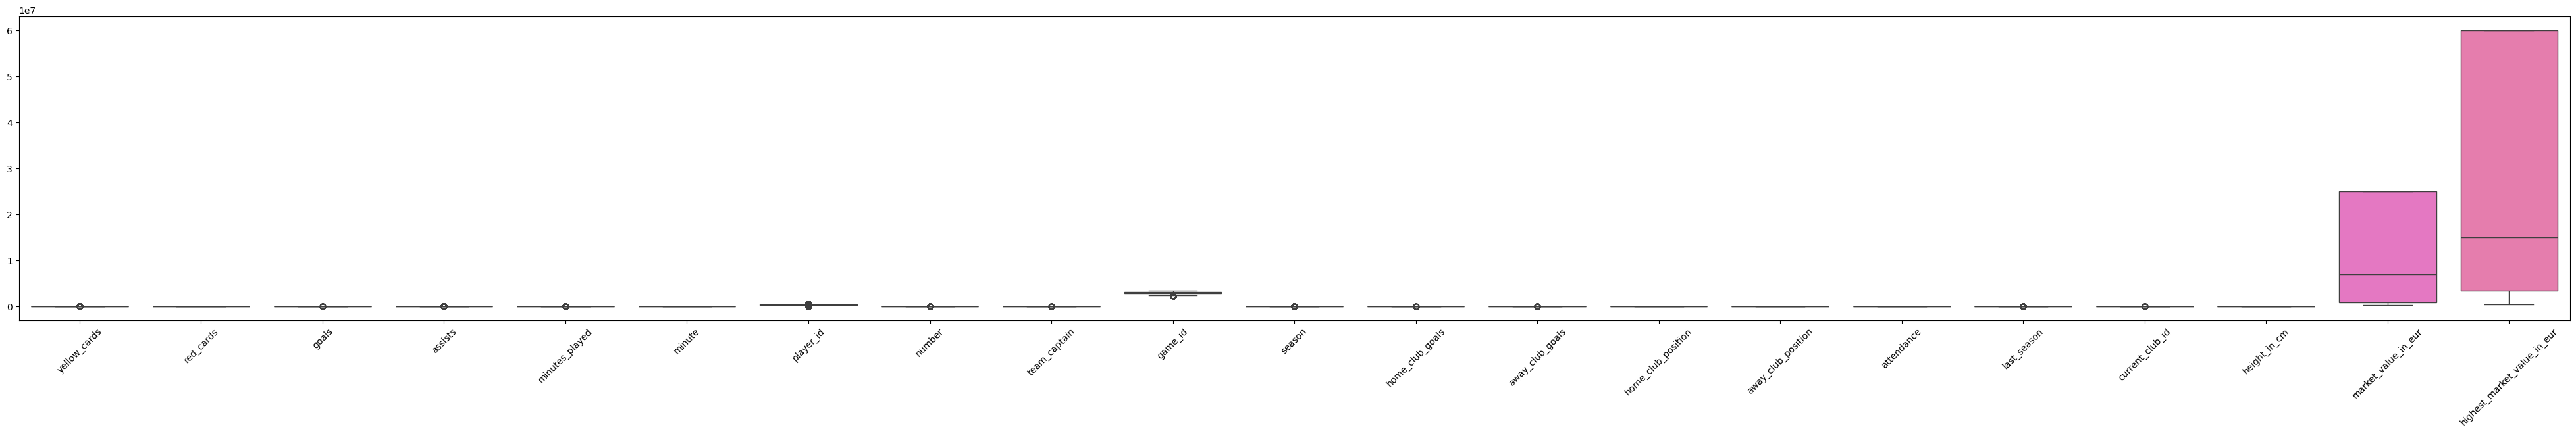

In [72]:
#Box Plot
sns.boxplot(data=merged_df_2)
plt.gcf().set_size_inches(50,6) #gcf(): get current figure size
plt.xticks(rotation=45) #tilts the xlabel
plt.show()

Helps identify the distribution, spread, and potential outliers in the dataset.
Useful for detecting skewness, variability, and extreme values in football data.
Since the dataset has few outliers, they were retained as they might represent important football performances rather than errors.

In [74]:
# Saving the merged file
merged_df_2.to_excel("Football_merged_cleaned.xlsx")
print("Merge completed successfully. Output saved as Football_merged_cleaned.xlsx")

Merge completed successfully. Output saved as Football_merged_cleaned.xlsx


In [75]:
Football_data=pd.read_excel("Football_merged_cleaned.xlsx")
Football_data

Unnamed: 0   appearance_id  yellow_cards  red_cards  goals  assists  \
0              0   2231426_49723             0          0      0        0   
1              1   2231426_49723             0          0      0        0   
2              2   2231426_49723             0          0      0        0   
3              3   2231426_49723             0          0      0        0   
4              4   2231426_49723             0          0      0        0   
...          ...             ...           ...        ...    ...      ...   
4194        4194  3415291_537467             0          0      1        0   
4195        4195  3415291_537467             0          0      1        0   
4196        4196  3415291_537467             0          0      1        0   
4197        4197  3415291_537467             0          0      1        0   
4198        4198  3415291_537467             0          0      1        0   

      minutes_played                     game_event_id  minute         type_x  \
0                 70  8b80ccdd11e7e891b29f9ea738a88612      70  Substitutions   
1                 70  8b80ccdd11e7e891b29f9ea738a88612      70  Substitutions   
2                 70  8b80ccdd11e7e891b29f9ea738a88612      70  Substitutions   
3                 70  8b80ccdd11e7e891b29f9ea738a88612      70  Substitutions   
4                 70  8b80ccdd11e7e891b29f9ea738a88612      70  Substitutions   
...              ...                               ...     ...            ...   
4194              77  2c1bc4101fb8b426e84b9b5d55eb5783      77  Substitutions   
4195              77  2c1bc4101fb8b426e84b9b5d55eb5783      77  Substitutions   
4196              77  2c1bc4101fb8b426e84b9b5d55eb5783      77  Substitutions   
4197              77  2c1bc4101fb8b426e84b9b5d55eb5783      77  Substitutions   
4198              77  2c1bc4101fb8b426e84b9b5d55eb5783      77  Substitutions   

      ... date_of_birth    sub_position position_y   foot height_in_cm  \
0     ...    1990-03-29      Right-Back   Defender  right          186   
1     ...    1990-03-29      Right-Back   Defender  right          186   
2     ...    1990-03-29      Right-Back   Defender  right          186   
3     ...    1990-03-29      Right-Back   Defender  right          186   
4     ...    1990-03-29      Right-Back   Defender  right          186   
...   ...           ...             ...        ...    ...          ...   
4194  ...    1996-08-29  Centre-Forward     Attack  right          176   
4195  ...    1996-08-29  Centre-Forward     Attack  right          176   
4196  ...    1996-08-29  Centre-Forward     Attack  right          176   
4197  ...    1996-08-29  Centre-Forward     Attack  right          176   
4198  ...    1996-08-29  Centre-Forward     Attack  right          176   

     market_value_in_eur  highest_market_value_in_eur  \
0                 700000                      5000000   
1                 700000                      5000000   
2                 700000                      5000000   
3                 700000                      5000000   
4                 700000                      5000000   
...                  ...                          ...   
4194              300000                       600000   
4195              300000                       600000   
4196              300000                       600000   
4197              300000                       600000   
4198              300000                       600000   

      contract_expiration_date  agent_name       player_name  
0                   2025-06-30     Unknown  Timothy Chandler  
1                   2025-06-30     Unknown  Timothy Chandler  
2                   2025-06-30     Unknown  Timothy Chandler  
3                   2025-06-30     Unknown  Timothy Chandler  
4                   2025-06-30     Unknown  Timothy Chandler  
...                        ...         ...               ...  
4194                2026-06-30  TOP Agency     Joseph Efford  
4195                2026-06-30

In [76]:
Football_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Unnamed: 0                   4199 non-null   int64         
 1   appearance_id                4199 non-null   object        
 2   yellow_cards                 4199 non-null   int64         
 3   red_cards                    4199 non-null   int64         
 4   goals                        4199 non-null   int64         
 5   assists                      4199 non-null   int64         
 6   minutes_played               4199 non-null   int64         
 7   game_event_id                4199 non-null   object        
 8   minute                       4199 non-null   int64         
 9   type_x                       4199 non-null   object        
 10  description                  4199 non-null   object        
 11  player_in_id                 4199 non-null 

### **Data Dictionary: Football Dataset**  

| Column_Name                   |Description |

|-------------------------------|------------ |  
| appearance_id                 | Unique identifier for each appearance |  
| yellow_cards                  | Number of yellow cards received |  
| red_cards                     | Number of red cards received |  
| goals                         | Number of goals scored |  
| assists                       | Number of assists made |  
| minutes_played                | Minutes played in a match |  
| game_event_id                 | Unique identifier for each game event |  
| minute                        | Minute at which an event occurred |  
| description                   | Description of the game event |  
| player_in_id                  | Unique identifier for the player subbed in |  
| player_assist_id              | Unique identifier for the player who assisted a goal |  
| player_id                     | Unique identifier for each player |  
| game_lineups_id               | Unique identifier for each game lineup |  
| number                        | Players shirt number |  
| team_captain                  | Indicates whether the player is the team captain (0 for No, 1 for Yes) |  
| game_id                       | Unique identifier for each game |  
| type                          | Type of the lineup (e.g., starting lineup, substitutes) |  
| season                        | Season during which the game took place |  
| round                         | Round of the competition |  
| home_club_goals               | Number of goals scored by the home club |  
| away_club_goals               | Number of goals scored by the away club |  
| home_club_position            | Position of the home club in the league |  
| away_club_position            | Position of the away club in the league |  
| home_club_manager_name        | Name of the home clubs manager |  
| away_club_manager_name        | Name of the away clubs manager |  
| stadium                       | Name of the stadium where the game was played |  
| attendance                    | Number of attendees at the game |  
| referee                       | Name of the referee for the game |  
| home_club_name                | Name of the home club |  
| away_club_name                | Name of the away club |  
| aggregate                     | Score aggregate (if applicable, e.g., "02:03" for a two-legged match) |  
| competition_type              | Type of the competition (e.g., domestic_league) |  
| competition_id                | Unique identifier for the competition |  
| date                          | Date of the match |  
| last_season                   | Last season the player participated in |  
| current_club_id               | Unique identifier for the players current club |  
| player_code                   | Code representing the player |  
| country_of_birth              | Country of birth of the player |  
| date_of_birth                 | Date of birth of the player |  
| sub_position                  | Sub-position of the player (if applicable) |  
| foot                          | Preferred foot of the player |  
| height_in_cm                  | Height of the player in centimeters |  
| market_value_in_eur           | Current market value of the player in euros |  
| highest_market_value_in_eur   | Highest market value of the player in euros |  
| contract_expiration_date      | Expiry date of the players contract |  
| agent_name                    | Name of the players agent |  
| player_name                   | Name of the player |  
| position                      | Main playing position of the player |  

### **SPRINT:3 - PERFORMANCE ANALYSIS - SOLVING BUSINESS QUESTIONS**

In [79]:
def descriptive_analysis(Football_data, columns):
    return Football_data[columns].describe()

In [80]:
selected_columns = ['attendance', 'home_club_goals', 'away_club_goals', 'yellow_cards']
summary_stats = descriptive_analysis(Football_data, selected_columns)
summary_stats

attendance  home_club_goals  away_club_goals  yellow_cards
count   4199.000000      4199.000000       4199.00000   4199.000000
mean   32648.614908         1.891641          1.55799      0.160038
std    24799.673754         1.522555          1.47131      0.366685
min      300.000000         0.000000          0.00000      0.000000
25%    10266.000000         1.000000          0.00000      0.000000
50%    28825.000000         2.000000          1.00000      0.000000
75%    51500.000000         3.000000          2.00000      0.000000
max    81365.000000         7.000000          7.00000      1.000000

In [81]:
Football_data.groupby('home_club_name')['attendance'].describe()

count          mean          std  \
home_club_name                                                                  
 Lille Olympique Sporting Club                10.0  34494.000000     0.000000   
1. FC Koln                                    41.0  45786.585366  7344.634729   
1. FSV Mainz 05                               33.0  32128.272727  1282.935021   
1.FC Nuremberg                               116.0  40379.189655  6472.160850   
AC Horsens                                    28.0   2790.250000   442.141893   
...                                            ...           ...          ...   
Yellow-Red Koninklijke Voetbalclub Mechelen    8.0  11167.500000  2242.321820   
club atletico de madrid sad                   14.0  61023.000000     0.000000   
spvgg greuther furth games                    28.0  15500.000000     0.000000   
valencia club de futbol s.a.d                 14.0  43486.000000     0.000000   
verein fur leibesubungen                     131.0  28038.274809  1821.325025   

                                                 min      25%      50%  \
home_club_name                                                           
 Lille Olympique Sporting Club               34494.0  34494.0  34494.0   
1. FC Koln                                   28825.0  45100.0  49500.0   
1. FSV Mainz 05                              30579.0  30579.0  32976.0   
1.FC Nuremberg                               30397.0  36079.0  37068.0   
AC Horsens                                    2441.0   2441.0   2441.0   
...                                              ...      ...      ...   
Yellow-Red Koninklijke Voetbalclub Mechelen   9070.0   9070.0  11167.5   
club atletico de madrid sad                  61023.0  61023.0  61023.0   
spvgg greuther furth games                   15500.0  15500.0  15500.0   
valencia club de futbol s.a.d                43486.0  43486.0  43486.0   
verein fur leibesubungen                     24450.0  26621.0  28825.0   

                                                 75%      max  
home_club_name                                                 
 Lille Olympique Sporting Club               34494.0  34494.0  
1. FC Koln                                   50000.0  50000.0  
1. FSV Mainz 05                              32976.0  33507.0  
1.FC Nuremberg                               46055.0  50000.0  
AC Horsens                                    3330.0   3330.0  
...                                              ...      ...  
Yellow-Red Koninklijke Voetbalclub Mechelen  13265.0  13265.0  
club atletico de madrid sad                  61023.0  61023.0  
spvgg greuther furth games                   15500.0  15500.0  
valencia club de futbol s.a.d                43486.0  43486.0  
verein fur leibesubungen                     30000.0  30000.0  

[107 rows x 8 columns]

#### **1. Conditional Probability Calculation**
##### **The probability of a player scoring a goal if they played more than 60 minutes in a match**

In [83]:
# Filtering matches where minutes played is 60 or more
played_60 = Football_data[Football_data['minutes_played'] >= 60]

# Counting players who scored at least 1 goal in these matches
goal_given_60 = played_60[played_60['goals'] > 0]

# Probability Calculation: P(Goal | Minutes >= 60)
prob_goal_given_60 = len(goal_given_60) / len(played_60)
print(f"P(Goal | Minutes >= 60) = {prob_goal_given_60:.2f}")



P(Goal | Minutes >= 60) = 0.41


### **Interpretation:**
The computed probability 0.41 (or 41%) means that:
41% of players who played at least 60 minutes in a match scored at least one goal.

#### **2. Conditional Probability**
##### **The probability of a team winning given that they scored more than 2 goals**

In [86]:
#  Home club wins if home goals > away goals
Football_data['home_win'] = Football_data['home_club_goals'] > Football_data['away_club_goals']

# Filtering matches where the home team scored more than 2 goals
high_scoring_games = Football_data[Football_data['home_club_goals'] > 2]

# Counting home wins in these matches
home_wins_given_goals = high_scoring_games[high_scoring_games['home_win']]

# Probability Calculation: P(Win | Goals > 2)
prob_win_given_goals = len(home_wins_given_goals) / len(high_scoring_games)
print(f"P(Win | Goals > 2) = {prob_win_given_goals:.2f}")


P(Win | Goals > 2) = 0.82


## Interpretation of P(Win | Goals > 2) = 0.82  

The probability of a home team winning when it scores more than 2 goals is 0.82 (82%). This indicates that in most cases, scoring at least 3 goals leads to victory. However, 18% of these matches still result in either a draw or an away team win, suggesting that defensive performance and opposition strength also play a role.  

#### **3. Joint Probability**
##### **The probability of a player both scoring a goal and assisting in the same match**

In [89]:
# Counting players who both scored and assisted in a match
goal_and_assist = Football_data[(Football_data['goals'] > 0) & (Football_data['assists'] > 0)]

# Probability Calculation: P(Goal ∩ Assist)
prob_goal_and_assist = len(goal_and_assist) / len(Football_data)
print(f"P(Goal and Assist) = {prob_goal_and_assist:.2f}")


P(Goal and Assist) = 0.06


# Interpretation:
The joint probability of a player both scoring a goal and providing an assist in a match is 0.06 (or 6%).

This means that in 6% of all recorded matches, a player achieved both a goal and an assist.

#### **4. Joint Probability**
##### **The probability that a player is not a captain and played more than 30 minutes**

In [92]:
# Counting players who are not captains and played for more than 30 minutes
captain_goals = Football_data[(Football_data['team_captain'] == 0) & (Football_data['minutes_played'] > 30)]

# Probability Calculation: P(Captain and Yellow Card)
prob_captain_yellow = len(captain_goals) / len(Football_data)
print(f"P(Captain and Yellow Card) = {prob_captain_yellow:.2f}")


P(Captain and Yellow Card) = 0.91


In [93]:
Football_data["team_captain"].unique()

array([0, 1], dtype=int64)

#### **5. Conditional Probability**
##### **The probability that a player assists a goal given that they played more than 60 minutes**

In [95]:
# Filtering players who played more than 60 minutes
played_60 = Football_data[Football_data['minutes_played'] > 60]

# Counting players with assists in this group
assist_given_60 = played_60[played_60['assists'] > 0]

# Probability Calculation: P(Assist | Minutes > 60)
prob_assist_given_60 = len(assist_given_60) / len(played_60)
print(f"P(Assist | Minutes > 60) = {prob_assist_given_60:.2f}")


P(Assist | Minutes > 60) = 0.14


#### **Data Sampling, Central Limit theorem and normal distribution**

Text(0, 0.5, 'Frequency')

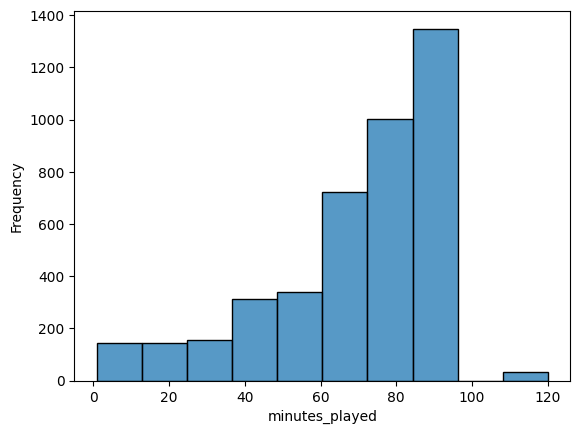

In [97]:
# Distribution of minutes_played among all players in the dataset
import matplotlib.pyplot as plt
import seaborn as sb

player_df=Football_data[("minutes_played")].copy()
sb.histplot(player_df, bins=10)
plt.xlabel("minutes_played")
plt.ylabel("Frequency")

#### **Drawing the random samples of sizes of 10, 20, and 50**

In [99]:
sd_10=player_df.sample(n=10,replace=True, random_state=1)
sd_20=player_df.sample(n=20,replace=True, random_state=1)
sd_30=player_df.sample(n=30,replace=True, random_state=1)
sd_40=player_df.sample(n=40,replace=True, random_state=1)
sd_50=player_df.sample(n=50,replace=True, random_state=1)
sd_60=player_df.sample(n=60,replace=True, random_state=1)
print("===============sample size = 10========================")
print(sd_10)
print("===============sample size = 20========================")
print(sd_20)
print("===============sample size = 30========================")
print(sd_30)
print("===============sample size = 40========================")
print(sd_40)
print("===============sample size = 50========================")
print(sd_50)
print("===============sample size = 60========================")
print(sd_60)

===============sample size = 10========================
235     90
3980    66
905     77
2763    90
2895    84
144     61
2797    90
3462    62
1202    90
2962    74
Name: minutes_played, dtype: int64
===============sample size = 20========================
235     90
3980    66
905     77
2763    90
2895    84
144     61
2797    90
3462    62
1202    90
2962    74
2516    63
252     15
3562    82
562     76
2628    90
3049    90
753     61
1527    85
3550    66
1888    67
Name: minutes_played, dtype: int64
===============sample size = 30========================
235      90
3980     66
905      77
2763     90
2895     84
144      61
2797     90
3462     62
1202     90
2962     74
2516     63
252      15
3562     82
562      76
2628     90
3049     90
753      61
1527     85
3550     66
1888     67
1110     57
1031     90
2877     64
3606     90
1337     73
2561    120
728      27
431      55
4074     90
542      73
Name: minutes_played, dtype: int64
===============sample size = 40======

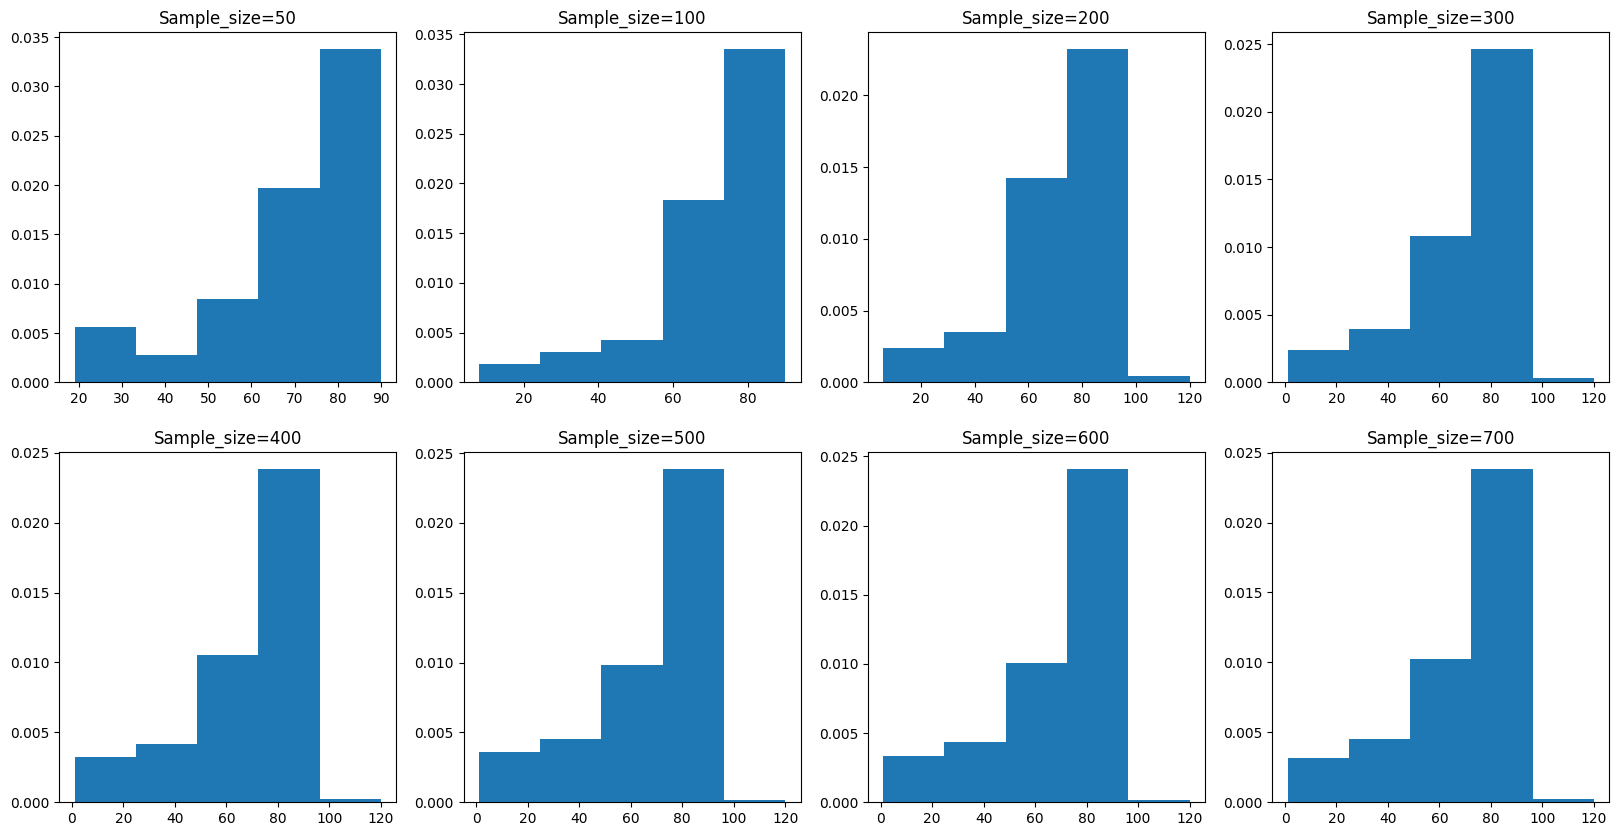

In [100]:
num=[50,100,200,300,400,500,600,700]
data_s=[]
sample_df=pd.DataFrame()

fig,ax=plt.subplots(2,4, figsize=(20,10))
for i in num:
    sample_df= Football_data.sample(n=i,replace=True,random_state=0)
    data_s.append(sample_df["minutes_played"].tolist())

k=0 #(count)
for i in range(0,2):
    for j in range(0,4):
        ax[i,j].hist(data_s[k],5,density=True) # 5 is bin size
        ax[i,j].set_title(label="Sample_size="+str(len(data_s[k])))
        k=k+1
plt.show()  

In [101]:
#Population parameters
import statistics as st
import scipy.stats as sts

data_p=Football_data["minutes_played"].tolist()

p_mean=st.mean(data_p)
p_median=st.median(data_p)
p_sd=st.stdev(data_p)

print("Population mean is:", p_mean)
print("Population median is:", p_median)
print("Population Standard deviation  is:", p_sd)
print("Population skewness is:",sts.skew(data_p,bias=False))
print("Population kurtosis is:",sts.kurtosis(data_p,bias=False))

Population mean is: 69.73493688973565
Population median is: 77
Population Standard deviation  is: 22.695993988055037
Population skewness is: -1.0946447078945352
Population kurtosis is: 0.688568747955697


In [102]:
#Sample Statistics:
#This is for a random sample of 40 among the entire population
sd_40_mean=st.mean(sd_40)
sd_40_median=st.median(sd_40)
sd_40_sd=st.stdev(sd_40)

print("Sample mean is:",sd_40_mean )
print("Sample median is:", sd_40_median)
print("Sample Standard deviation  is:", sd_40_sd)
print("Sample skewness is:",sts.skew(sd_40,bias=False))
print("Sample kurtosis is:",sts.kurtosis(sd_40,bias=False))

Sample mean is: 75.7
Sample median is: 77.0
Sample Standard deviation  is: 18.292775651213816
Sample skewness is: -1.0822160941375891
Sample kurtosis is: 3.1943960879652034


In [103]:
sample_df1=pd.DataFrame()
for i in range(0,20):
    sample_df1["sample_"+str(i)]=Football_data["minutes_played"].sample(n=40,replace=True).reset_index(drop=True)

In [104]:
sample_df1

sample_0  sample_1  sample_2  sample_3  sample_4  sample_5  sample_6  \
0          1        75        81        85        68        74        90   
1         55        45        90        73        90        59        57   
2         77        25        80        74        70        79        35   
3         13        90        90        67       120        79        90   
4         82        90        90        78        90        58        85   
5         49        82        55        90        81        63        76   
6         68        90        69        80        72        45        86   
7         86        78        12        84        80        76        80   
8         65        20        90        62        90        80        90   
9         13        90        60        45        78        89        74   
10        90        62        90        90        90        90        78   
11        72        78        13        46        76        86        89   
12        90        90        84        76        90        68        70   
13        86        29        46        73        74        73        80   
14        81        73        90        45        29        68        70   
15        56        45        63        90        90        26        90   
16        80        71        78        90        80        82        78   
17       120        84        90        90        90        61        90   
18        24        40        86        73        90        72        83   
19        54        45        46        56        90       120        90   
20        90        76        25        90        71        90        84   
21        66        80        66       120        73        71        59   
22        65        90        75        75        74        90        90   
23        90        80        90        90        90        64        90   
24        64        72        90        90        72        90        90   
25        12        80        90        75        82        90        72   
26        90        90        89        82        84        90        84   
27        26        63        45        78        55        90        14   
28        76        88        82        57        54        90        89   
29        80        59        63        79        90        80        33   
30        78        46        68        31        45        82        90   
31        80        90        90        89        86        45        84   
32        78        90        72        66        82        90        90   
33        55        15        54        74         9        79        68   
34        72        38        62        90        64        90        90   
35        90        81        90        45        84        72        78   
36        20        80        33        45        55        90        84   
37        90        68        64        60        84        90        90   
38        12        12        56        90        67        77        49   
39        86        69        77        56        90        56        90   

    sample_7  sample_8  sample_9  sample_10  sample_11  sample_12  sample_13  \
0         90        21        45         60         62         70         45   
1         76        80        30         90         90         75         54   
2         64        59        90         74         78         85         45   
3         90        86        90         90        120         64         70   
4         89        69        20         90         76         90         66   
5         86        56        45         90         90         70         19   
6         72        68        56         74         90         78          8   
7         27        90        82         62         90         73         13   
8         90        90        58         22         82         90         45   
9         68        90        65         90         79         86         75   
10     

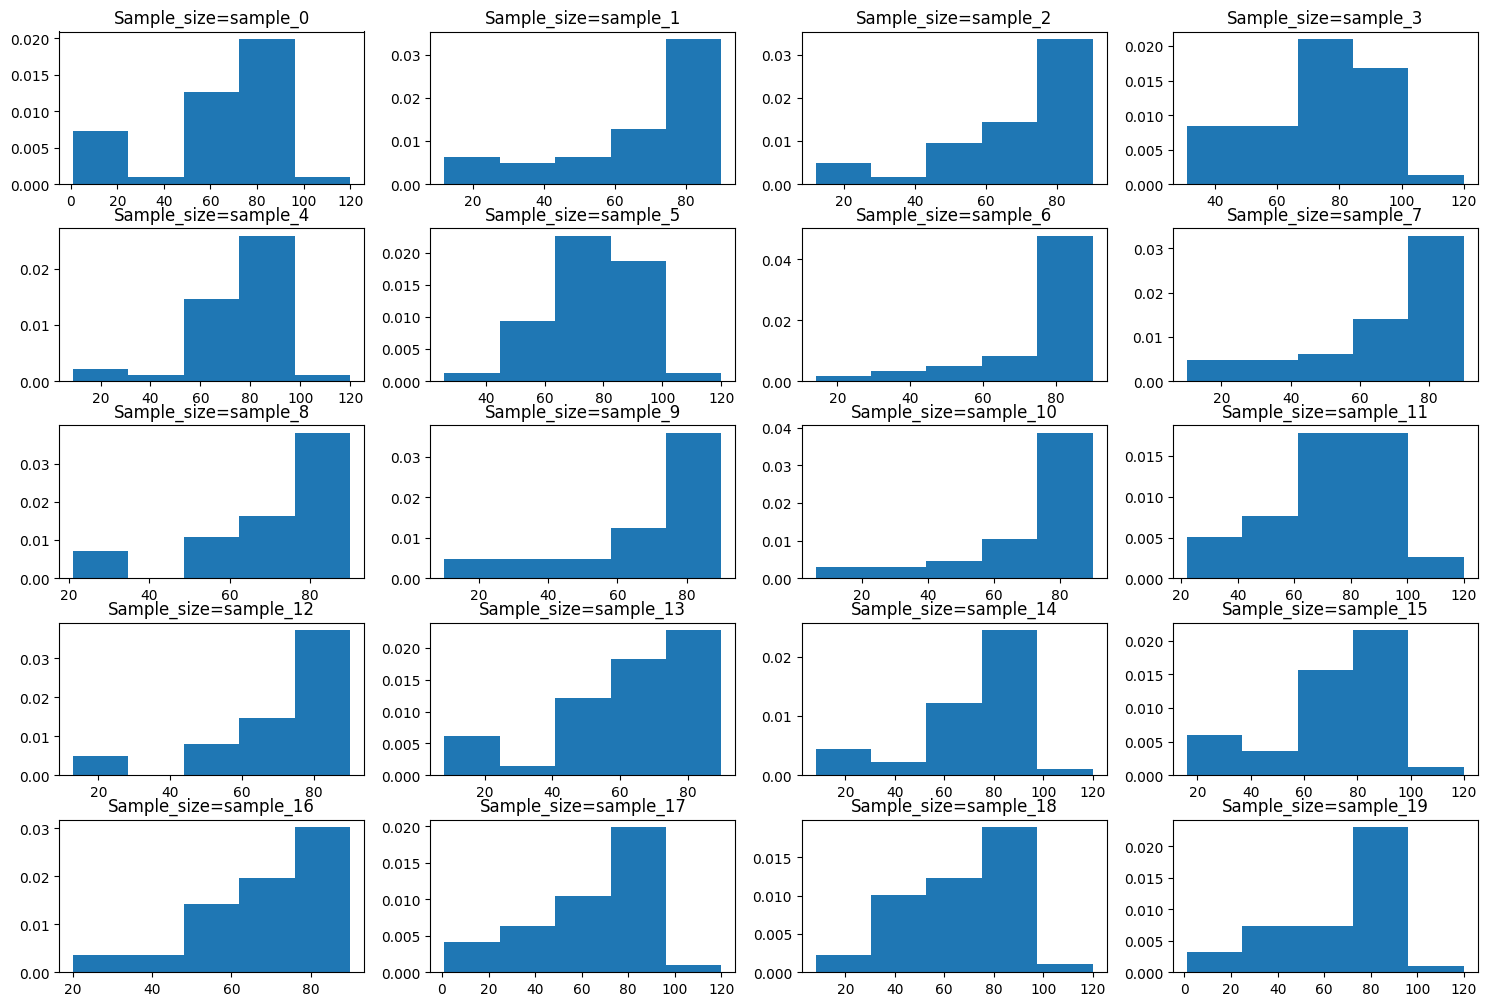

In [105]:
sample_name=sample_df1.columns

fig,ax=plt.subplots(5,4, figsize=(15,10))
fig.tight_layout()
k=0 #(count)
for i in range(0,5):
    for j in range(0,4):
        ax[i,j].hist(sample_df1[sample_name[k]],5,density=True) # 5 is bin size
        ax[i,j].set_title(label="Sample_size="+sample_name[k])
        k=k+1
plt.show() 

In [106]:
sample_name=sample_df1.columns
sample_name

Index(['sample_0', 'sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5',
       'sample_6', 'sample_7', 'sample_8', 'sample_9', 'sample_10',
       'sample_11', 'sample_12', 'sample_13', 'sample_14', 'sample_15',
       'sample_16', 'sample_17', 'sample_18', 'sample_19'],
      dtype='object')

In [107]:
sample_mean=[]
sample_name=sample_df1.columns
for i in sample_name:
    sample_mean.append(sample_df1[i].mean())
samples_mean=pd.DataFrame()
samples_mean.insert(0,"sample_name",sample_name)
samples_mean.insert(1,"sample_mean",sample_mean)

In [108]:
samples_mean.head()

sample_name  sample_mean
0    sample_0       64.550
1    sample_1       66.725
2    sample_2       69.600
3    sample_3       73.725
4    sample_4       76.225

In [109]:
# Finding the Standard Deviation for all the sample_mean
Samples_mean_std=st.stdev(samples_mean["sample_mean"])
print("Samples_mean_std:",Samples_mean_std)

Samples_mean_std: 3.9461246395739473


In [110]:
# Calculating sample Standard Deviation from population parameter
import math as m
calculated_sd= p_sd/m.sqrt(40)
print("calculated_sd:",calculated_sd)

calculated_sd: 3.588551738187114


Key Observations:
Close Values: The observed standard deviation of the sample means (3.84) and the theoretical standard error (3.59) are very close to each other, which is a good sign! This indicates that the Central Limit Theorem (CLT) is holding up well in our case.
Observed: 3.84 (real variability from our samples).
Theoretical: 3.59 (predicted variability based on the population).
Small Difference: The small difference could be attributed to the randomness of the specific samples we selected. As we take more samples or use larger sample sizes, the observed standard deviation will approach the theoretical standard error.

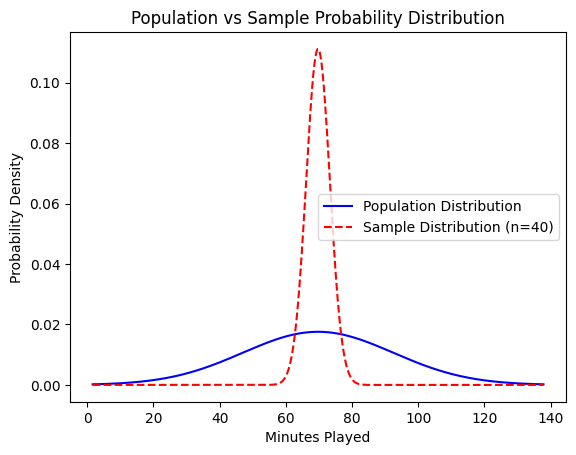

In [112]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Defining range for smooth distribution
lower_p = p_mean - 3 * p_sd
upper_p = p_mean + 3 * p_sd
norm_p = np.linspace(lower_p, upper_p, num=1000)  # Using linspace for a smooth curve

# Plotting Probability Distribution Function (PDF) for Population
plt.plot(norm_p, norm.pdf(norm_p, p_mean, p_sd), label="Population Distribution", color="blue")

# Sample Parameters 
sample_size = 40
sample_se = p_sd / np.sqrt(sample_size)

# Plotting Probability Distribution Function (PDF) for Sample Means
plt.plot(norm_p, norm.pdf(norm_p, p_mean, sample_se), label=f"Sample Distribution (n={sample_size})", color="red", linestyle="dashed")

# Labels & Title
plt.xlabel("Minutes Played")
plt.ylabel("Probability Density")
plt.title("Population vs Sample Probability Distribution")
plt.legend()

# Show plot
plt.show()


In [113]:
norm.pdf(norm_p,p_mean,p_sd)

array([0.00019527, 0.00019882, 0.00020242, 0.00020608, 0.0002098 ,
       0.00021358, 0.00021742, 0.00022132, 0.00022529, 0.00022931,
       0.0002334 , 0.00023756, 0.00024177, 0.00024606, 0.00025041,
       0.00025483, 0.00025932, 0.00026388, 0.0002685 , 0.0002732 ,
       0.00027797, 0.00028282, 0.00028774, 0.00029273, 0.0002978 ,
       0.00030295, 0.00030817, 0.00031348, 0.00031886, 0.00032432,
       0.00032987, 0.0003355 , 0.00034121, 0.000347  , 0.00035289,
       0.00035886, 0.00036491, 0.00037106, 0.00037729, 0.00038362,
       0.00039004, 0.00039655, 0.00040316, 0.00040986, 0.00041666,
       0.00042355, 0.00043054, 0.00043764, 0.00044483, 0.00045213,
       0.00045953, 0.00046703, 0.00047464, 0.00048235, 0.00049018,
       0.00049811, 0.00050615, 0.0005143 , 0.00052257, 0.00053095,
       0.00053944, 0.00054805, 0.00055678, 0.00056563, 0.00057459,
       0.00058368, 0.00059289, 0.00060222, 0.00061168, 0.00062126,
       0.00063098, 0.00064082, 0.00065079, 0.00066089, 0.00067

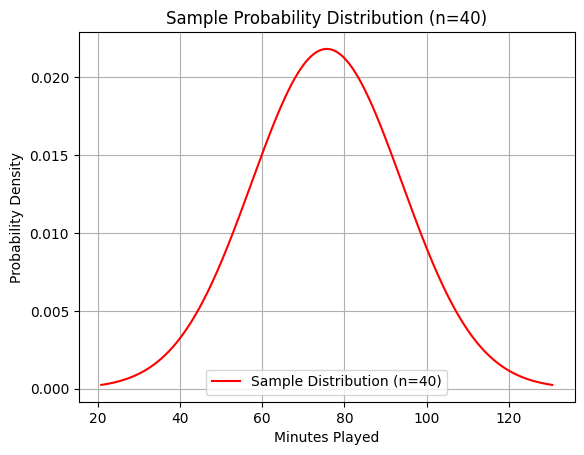

In [114]:
# Defining range for smooth distribution (within ±3 standard deviations)
lower_s = sd_40_mean - 3 * sd_40_sd
upper_s = sd_40_mean + 3 * sd_40_sd
norm_s = np.linspace(lower_s, upper_s, num=1000)  # Smooth curve

# Plotting Probability Distribution Function (PDF) for Sample
plt.plot(norm_s, norm.pdf(norm_s, sd_40_mean, sd_40_sd), label="Sample Distribution (n=40)", color="red")

# Labels & Title
plt.xlabel("Minutes Played")
plt.ylabel("Probability Density")
plt.title("Sample Probability Distribution (n=40)")
plt.legend()
plt.grid(True)  # Add grid for better visualization

# Show plot
plt.show()


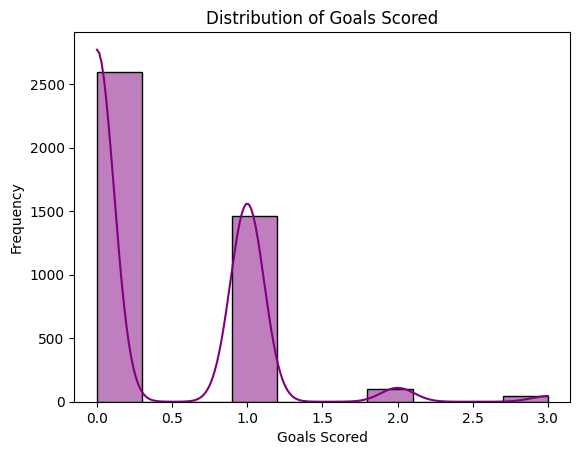

In [115]:
sns.histplot(Football_data["goals"], bins=10, kde=True, color="purple")
plt.xlabel("Goals Scored")
plt.ylabel("Frequency")
plt.title("Distribution of Goals Scored")
plt.show()


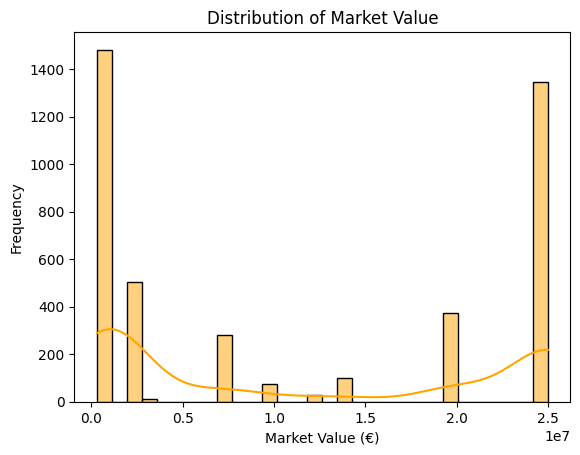

In [116]:
sns.histplot(Football_data["market_value_in_eur"], bins=30, kde=True, color="orange")
plt.xlabel("Market Value (€)")
plt.ylabel("Frequency")
plt.title("Distribution of Market Value")
plt.show()


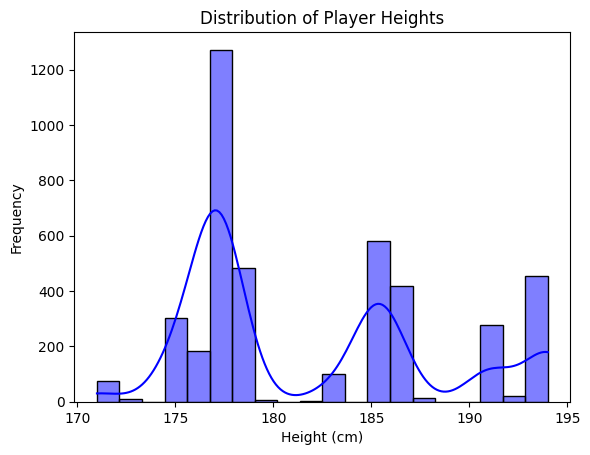

In [117]:
sns.histplot(Football_data["height_in_cm"], bins=20, kde=True, color="blue")
plt.xlabel("Height (cm)")
plt.ylabel("Frequency")
plt.title("Distribution of Player Heights")
plt.show()


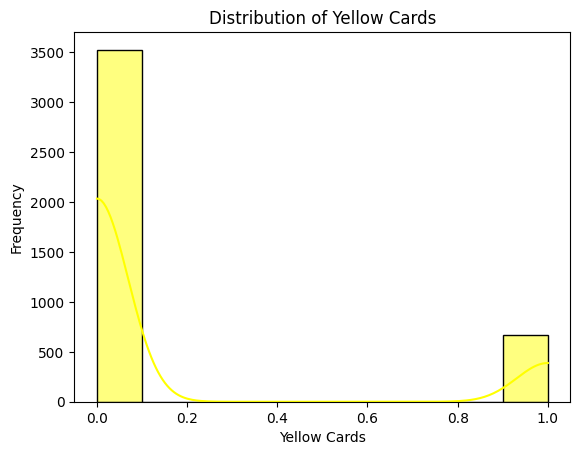

In [118]:
sns.histplot(Football_data["yellow_cards"], bins=10, kde=True, color="yellow")
plt.xlabel("Yellow Cards")
plt.ylabel("Frequency")
plt.title("Distribution of Yellow Cards")
plt.show()


### **SPRINT:4 - PERFORMANCE ANALYSIS - LOGISTIC REGRESSION FOR CLASSIFICATION**

In [120]:
db = pymysql.connect(
    host="localhost",
    user="root",
    password="mayuri1999",
    database="Football_data")

In [121]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [122]:
# shape of the dataset
Football_data.shape
print("The number of samples in the data are ",Football_data.shape[0])

The number of samples in the data are  4199


In [123]:
# Exploring the existing data types
Football_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Unnamed: 0                   4199 non-null   int64         
 1   appearance_id                4199 non-null   object        
 2   yellow_cards                 4199 non-null   int64         
 3   red_cards                    4199 non-null   int64         
 4   goals                        4199 non-null   int64         
 5   assists                      4199 non-null   int64         
 6   minutes_played               4199 non-null   int64         
 7   game_event_id                4199 non-null   object        
 8   minute                       4199 non-null   int64         
 9   type_x                       4199 non-null   object        
 10  description                  4199 non-null   object        
 11  player_in_id                 4199 non-null 

#### **Data Preprocessing**

In [125]:
# check missing values in data
Football_data.isnull().sum()

Unnamed: 0                     0
appearance_id                  0
yellow_cards                   0
red_cards                      0
goals                          0
assists                        0
minutes_played                 0
game_event_id                  0
minute                         0
type_x                         0
description                    0
player_in_id                   0
player_assist_id               0
player_id                      0
game_lineups_id                0
type_y                         0
number                         0
team_captain                   0
position_x                     0
game_id                        0
season                         0
round                          0
home_club_goals                0
away_club_goals                0
home_club_position             0
away_club_position             0
home_club_manager_name         0
away_club_manager_name         0
stadium                        0
attendance                     0
referee   

#### **Label Encoding**

In [127]:
from sklearn.preprocessing import LabelEncoder

fb_enc=Football_data.copy()
# Selecting all object columns
object_columns = fb_enc.select_dtypes(include=['object']).columns.tolist()
print(object_columns)

# Dictionary to store label encoders
label_encoders = {}

# Converting all object columns to string and then apply encoding
for col in object_columns:
    fb_enc[col] = fb_enc[col].astype(str) 
    le = LabelEncoder()
    fb_enc[col + "_enc"] = le.fit_transform(fb_enc[col])  
    label_encoders[col] = le  # Stores encoders for potential inverse transformation
    
# Dropping original object columns as they are no longer needed
fb_enc.drop(columns=object_columns, inplace=True)

# Print sample data to verify encoding
fb_enc.head()


['appearance_id', 'game_event_id', 'type_x', 'description', 'player_in_id', 'player_assist_id', 'game_lineups_id', 'type_y', 'position_x', 'round', 'home_club_manager_name', 'away_club_manager_name', 'stadium', 'referee', 'home_club_name', 'away_club_name', 'aggregate', 'competition_type', 'competition_id', 'player_code', 'country_of_birth', 'sub_position', 'position_y', 'foot', 'contract_expiration_date', 'agent_name', 'player_name']


Unnamed: 0  yellow_cards  red_cards  goals  assists  minutes_played  \
0           0             0          0      0        0              70   
1           1             0          0      0        0              70   
2           2             0          0      0        0              70   
3           3             0          0      0        0              70   
4           4             0          0      0        0              70   

   minute  player_id  number  team_captain  ...  competition_type_enc  \
0      70      49723      22             0  ...                     1   
1      70      49723      22             0  ...                     1   
2      70      49723      22             0  ...                     1   
3      70      49723      22             0  ...                     1   
4      70      49723      22             0  ...                     1   

   competition_id_enc  player_code_enc  country_of_birth_enc  \
0                  12               20                     1   
1                  12               20                     1   
2                  12               20                     1   
3                  12               20                     1   
4                  12               20                     1   

   sub_position_enc  position_y_enc  foot_enc contract_expiration_date_enc  \
0                 8               1         2                            1   
1                 8               1         2                            1   
2                 8               1         2                            1   
3                 8               1         2                            1   
4                 8               1         2                            1   

   agent_name_enc  player_name_enc  
0              12               20  
1              12               20  
2              12               20  
3              12               20  
4              12               20  

[5 rows x 52 columns]

In [128]:
# removing "Unnamed: 0"column from the data
columns_to_drop=["Unnamed: 0"]
fb_enc=fb_enc.drop(columns_to_drop,axis=1)
fb_enc
#"date","date_of_birth",

yellow_cards  red_cards  goals  assists  minutes_played  minute  \
0                0          0      0        0              70      70   
1                0          0      0        0              70      70   
2                0          0      0        0              70      70   
3                0          0      0        0              70      70   
4                0          0      0        0              70      70   
...            ...        ...    ...      ...             ...     ...   
4194             0          0      1        0              77      77   
4195             0          0      1        0              77      77   
4196             0          0      1        0              77      77   
4197             0          0      1        0              77      77   
4198             0          0      1        0              77      77   

      player_id  number  team_captain  game_id  ...  competition_type_enc  \
0         49723      22             0  2231426  ...                     1   
1         49723      22             0  2231426  ...                     1   
2         49723      22             0  2231426  ...                     1   
3         49723      22             0  2231426  ...                     1   
4         49723      22             0  2231426  ...                     1   
...         ...     ...           ...      ...  ...                   ...   
4194     537467      11             0  3415291  ...                     1   
4195     537467      28             0  3415291  ...                     1   
4196     537467      28             0  3415291  ...                     1   
4197     537467      28             0  3415291  ...                     1   
4198     537467      28             0  3415291  ...                     1   

      competition_id_enc  player_code_enc  country_of_birth_enc  \
0                     12               20                     1   
1                     12               20                     1   
2                     12               20                     1   
3                     12               20                     1   
4                     12               20                     1   
...                  ...              ...                   ...   
4194                   0               11                     4   
4195                   0               11                     4   
4196                   0               11                     4   
4197                   0               11                     4   
4198                   0               11                     4   

      sub_position_enc  position_y_enc foot_enc  contract_expiration_date_enc  \
0                    8               1        2                             1   
1                    8               1        2                             1   
2                    8               1        2                             1   
3                    8               1        2                             1   
4                    8               1        2                             1   
...                ...             ...      ...                           ...   
4194                 3               0        2                             2   
4195                 3               0        2                             2   
4196                 3               0        2                             2   
4197                 3               0        2                             2   
4198                 3               0        2                             2   

      agent_name_enc player_name_enc  
0                 12              20  
1                 12              20  
2                 12              20  
3                 12              20  
4                 12              20  
...              ...             ...  
4194               9              11  
4195               9              11  
4196               9              11  
4197               9              11

### **Feature Selection**

In [130]:
selected_features = [
    "minutes_played", "goals", "assists",
    "sub_position_enc", "position_x_enc","position_y_enc", "foot_enc",
    "team_captain", "market_value_in_eur", "highest_market_value_in_eur",
    "home_win", "home_club_goals", "away_club_goals",
    "home_club_position", "away_club_position", "attendance",
    "yellow_cards","type_x_enc","type_y_enc","round_enc"]

# Dropping unnecessary columns 
df_select = fb_enc[selected_features]

# Display the first few rows of the cleaned dataset
df_select

minutes_played  goals  assists  sub_position_enc  position_x_enc  \
0                 70      0        0                 8               9   
1                 70      0        0                 8               9   
2                 70      0        0                 8               9   
3                 70      0        0                 8               9   
4                 70      0        0                 8               9   
...              ...    ...      ...               ...             ...   
4194              77      1        0                 3               3   
4195              77      1        0                 3               3   
4196              77      1        0                 3               3   
4197              77      1        0                 3               3   
4198              77      1        0                 3               3   

      position_y_enc  foot_enc  team_captain  market_value_in_eur  \
0                  1         2             0               700000   
1                  1         2             0               700000   
2                  1         2             0               700000   
3                  1         2             0               700000   
4                  1         2             0               700000   
...              ...       ...           ...                  ...   
4194               0         2             0               300000   
4195               0         2             0               300000   
4196               0         2             0               300000   
4197               0         2             0               300000   
4198               0         2             0               300000   

      highest_market_value_in_eur  home_win  home_club_goals  away_club_goals  \
0                         5000000     False                1                2   
1                         5000000     False                1                2   
2                         5000000     False                1                2   
3                         5000000     False                1                2   
4                         5000000     False                1                2   
...                           ...       ...              ...              ...   
4194                       600000      True                3                2   
4195                       600000      True                3                2   
4196                       600000      True                3                2   
4197                       600000      True                3                2   
4198                       600000      True                3                2   

      home_club_position  away_club_position  attendance  yellow_cards  \
0                      6                   2       45033             0   
1                      6                   2       45033             0   
2                      6                   2       45033             0   
3                      6                   2       45033             0   
4                      6                   2       45033             0   
...                  ...                 ...         ...           ...   
4194                   3                  18        3200             0   
4195                   3                  18        3200             0   
4196                   3                  18        3200             0   
4197                   3                  18        3200             0   
4198                   3                  18        3200             0   

      type_x_enc  type_y_enc  round_enc  
0              2           1         33  
1              2           1         33  
2              2           1         33  
3              2           1         33  
4              2           1         33  
...          ...         ...        ...  
4194           2           1         36  
4195           2           1         36  
4196           2           1         36  
4197  

#### **1) Business Question for Performance Analysis**
#### **"What are the key factors influencing a home team's probability of winning, and how can clubs optimize these factors to increase their chances of victory?"**

In [132]:
# Retrieving home_win column from the dataset and storing into another dataframe
col_df = pd.DataFrame(df_select[["home_win","team_captain"]])
col_df

# Removing home_win column from the dataset as scaling is not required for this column
new_df = pd.DataFrame(df_select.drop(["home_win","team_captain"], axis=1))
new_df

minutes_played  goals  assists  sub_position_enc  position_x_enc  \
0                 70      0        0                 8               9   
1                 70      0        0                 8               9   
2                 70      0        0                 8               9   
3                 70      0        0                 8               9   
4                 70      0        0                 8               9   
...              ...    ...      ...               ...             ...   
4194              77      1        0                 3               3   
4195              77      1        0                 3               3   
4196              77      1        0                 3               3   
4197              77      1        0                 3               3   
4198              77      1        0                 3               3   

      position_y_enc  foot_enc  market_value_in_eur  \
0                  1         2               700000   
1                  1         2               700000   
2                  1         2               700000   
3                  1         2               700000   
4                  1         2               700000   
...              ...       ...                  ...   
4194               0         2               300000   
4195               0         2               300000   
4196               0         2               300000   
4197               0         2               300000   
4198               0         2               300000   

      highest_market_value_in_eur  home_club_goals  away_club_goals  \
0                         5000000                1                2   
1                         5000000                1                2   
2                         5000000                1                2   
3                         5000000                1                2   
4                         5000000                1                2   
...                           ...              ...              ...   
4194                       600000                3                2   
4195                       600000                3                2   
4196                       600000                3                2   
4197                       600000                3                2   
4198                       600000                3                2   

      home_club_position  away_club_position  attendance  yellow_cards  \
0                      6                   2       45033             0   
1                      6                   2       45033             0   
2                      6                   2       45033             0   
3                      6                   2       45033             0   
4                      6                   2       45033             0   
...                  ...                 ...         ...           ...   
4194                   3                  18        3200             0   
4195                   3                  18        3200             0   
4196                   3                  18        3200             0   
4197                   3                  18        3200             0   
4198                   3                  18        3200             0   

      type_x_enc  type_y_enc  round_enc  
0              2           1         33  
1              2           1         33  
2              2           1         33  
3              2           1         33  
4              2           1         33  
...          ...         ...        ...  
4194           2           1         36  
4195           2           1         36  
4196           2           1         36  
4197           2           1         36  
4198           2           1         36  

[4199 rows x 18 columns]

#### **Data Scaling**

In [134]:
# Data Scaling
cols=new_df.columns
scaler=StandardScaler()
df_scaled=scaler.fit_transform(new_df)
df_scaled=pd.DataFrame(df_scaled,columns=cols)
df_scaled


minutes_played     goals   assists  sub_position_enc  position_x_enc  \
0           0.011680 -0.717695 -0.362473          1.154514        1.152828   
1           0.011680 -0.717695 -0.362473          1.154514        1.152828   
2           0.011680 -0.717695 -0.362473          1.154514        1.152828   
3           0.011680 -0.717695 -0.362473          1.154514        1.152828   
4           0.011680 -0.717695 -0.362473          1.154514        1.152828   
...              ...       ...       ...               ...             ...   
4194        0.320141  0.964941 -0.362473         -0.795214       -0.966424   
4195        0.320141  0.964941 -0.362473         -0.795214       -0.966424   
4196        0.320141  0.964941 -0.362473         -0.795214       -0.966424   
4197        0.320141  0.964941 -0.362473         -0.795214       -0.966424   
4198        0.320141  0.964941 -0.362473         -0.795214       -0.966424   

      position_y_enc  foot_enc  market_value_in_eur  \
0           0.586063  0.450913            -0.977257   
1           0.586063  0.450913            -0.977257   
2           0.586063  0.450913            -0.977257   
3           0.586063  0.450913            -0.977257   
4           0.586063  0.450913            -0.977257   
...              ...       ...                  ...   
4194       -0.732029  0.450913            -1.014003   
4195       -0.732029  0.450913            -1.014003   
4196       -0.732029  0.450913            -1.014003   
4197       -0.732029  0.450913            -1.014003   
4198       -0.732029  0.450913            -1.014003   

      highest_market_value_in_eur  home_club_goals  away_club_goals  \
0                       -0.824680        -0.585691         0.300455   
1                       -0.824680        -0.585691         0.300455   
2                       -0.824680        -0.585691         0.300455   
3                       -0.824680        -0.585691         0.300455   
4                       -0.824680        -0.585691         0.300455   
...                           ...              ...              ...   
4194                    -1.004996         0.728047         0.300455   
4195                    -1.004996         0.728047         0.300455   
4196                    -1.004996         0.728047         0.300455   
4197                    -1.004996         0.728047         0.300455   
4198                    -1.004996         0.728047         0.300455   

      home_club_position  away_club_position  attendance  yellow_cards  \
0              -0.549414           -1.506639    0.499436     -0.436498   
1              -0.549414           -1.506639    0.499436     -0.436498   
2              -0.549414           -1.506639    0.499436     -0.436498   
3              -0.549414           -1.506639    0.499436     -0.436498   
4              -0.549414           -1.506639    0.499436     -0.436498   
...                  ...                 ...         ...           ...   
4194           -1.184075            1.856331   -1.187601     -0.436498   
4195           -1.184075            1.856331   -1.187601     -0.436498   
4196           -1.184075            1.856331   -1.187601     -0.436498   
4197           -1.184075            1.856331   -1.187601     -0.436498   
4198           -1.184075            1.856331   -1.187601     -0.436498   

      type_x_enc  type_y_enc  round_enc  
0       0.690323    1.194641   0.696699  
1       0.690323    1.194641   0.696699  
2       0.690323    1.194641   0.696699  
3       0.690323    1.194641   0.696699  
4       0.690323    1.194641   0.696699  
...          ...         ...        ...  
4194    0.690323    1.194641   0.895790  
4195    0.690323    1.194641   0.895790  
4196    0.690323    1.194641   0.895790  
4197    0.690323    1.194641   0.895790  
4198    0.690323    1.194641   0.895790  

[4199 rows x 18 columns]

In [135]:
# Concatenating the yellow_cards columns to the scaled DataFrame
df_scaled=pd.concat([df_scaled,col_df],axis=1)
df_scaled.head()

minutes_played     goals   assists  sub_position_enc  position_x_enc  \
0         0.01168 -0.717695 -0.362473          1.154514        1.152828   
1         0.01168 -0.717695 -0.362473          1.154514        1.152828   
2         0.01168 -0.717695 -0.362473          1.154514        1.152828   
3         0.01168 -0.717695 -0.362473          1.154514        1.152828   
4         0.01168 -0.717695 -0.362473          1.154514        1.152828   

   position_y_enc  foot_enc  market_value_in_eur  highest_market_value_in_eur  \
0        0.586063  0.450913            -0.977257                     -0.82468   
1        0.586063  0.450913            -0.977257                     -0.82468   
2        0.586063  0.450913            -0.977257                     -0.82468   
3        0.586063  0.450913            -0.977257                     -0.82468   
4        0.586063  0.450913            -0.977257                     -0.82468   

   home_club_goals  away_club_goals  home_club_position  away_club_position  \
0        -0.585691         0.300455           -0.549414           -1.506639   
1        -0.585691         0.300455           -0.549414           -1.506639   
2        -0.585691         0.300455           -0.549414           -1.506639   
3        -0.585691         0.300455           -0.549414           -1.506639   
4        -0.585691         0.300455           -0.549414           -1.506639   

   attendance  yellow_cards  type_x_enc  type_y_enc  round_enc  home_win  \
0    0.499436     -0.436498    0.690323    1.194641   0.696699     False   
1    0.499436     -0.436498    0.690323    1.194641   0.696699     False   
2    0.499436     -0.436498    0.690323    1.194641   0.696699     False   
3    0.499436     -0.436498    0.690323    1.194641   0.696699     False   
4    0.499436     -0.436498    0.690323    1.194641   0.696699     False   

   team_captain  
0             0  
1             0  
2             0  
3             0  
4             0

In [136]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   minutes_played               4199 non-null   float64
 1   goals                        4199 non-null   float64
 2   assists                      4199 non-null   float64
 3   sub_position_enc             4199 non-null   float64
 4   position_x_enc               4199 non-null   float64
 5   position_y_enc               4199 non-null   float64
 6   foot_enc                     4199 non-null   float64
 7   market_value_in_eur          4199 non-null   float64
 8   highest_market_value_in_eur  4199 non-null   float64
 9   home_club_goals              4199 non-null   float64
 10  away_club_goals              4199 non-null   float64
 11  home_club_position           4199 non-null   float64
 12  away_club_position           4199 non-null   float64
 13  attendance        

In [137]:
correlation=abs(df_scaled.corr())>=0.7
correlation

minutes_played  goals  assists  sub_position_enc  \
minutes_played                         True  False    False             False   
goals                                 False   True    False             False   
assists                               False  False     True             False   
sub_position_enc                      False  False    False              True   
position_x_enc                        False  False    False              True   
position_y_enc                        False  False    False             False   
foot_enc                              False  False    False             False   
market_value_in_eur                   False  False    False             False   
highest_market_value_in_eur           False  False    False             False   
home_club_goals                       False  False    False             False   
away_club_goals                       False  False    False             False   
home_club_position                    False  False    False             False   
away_club_position                    False  False    False             False   
attendance                            False  False    False             False   
yellow_cards                          False  False    False             False   
type_x_enc                            False  False    False             False   
type_y_enc                            False  False    False             False   
round_enc                             False  False    False             False   
home_win                              False  False    False             False   
team_captain                          False  False    False             False   

                             position_x_enc  position_y_enc  foot_enc  \
minutes_played                        False           False     False   
goals                                 False           False     False   
assists                               False           False     False   
sub_position_enc                       True           False     False   
position_x_enc                         True           False     False   
position_y_enc                        False            True     False   
foot_enc                              False           False      True   
market_value_in_eur                   False           False     False   
highest_market_value_in_eur           False           False     False   
home_club_goals                       False           False     False   
away_club_goals                       False           False     False   
home_club_position                    False           False     False   
away_club_position                    False           False     False   
attendance                            False           False     False   
yellow_cards                          False           False     False   
type_x_enc                            False           False     False   
type_y_enc                            False           False     False   
round_enc                             False           False     False   
home_win                              False           False     False   
team_captain                          False           False     False   

                             market_value_in_eur  highest_market_value_in_eur  \
minutes_played                             False                        False   
goals                                      False                        False   
assists                                    False                        False   
sub_position_enc                           False                        False   
position_x_enc                             False                        False   
position_y_enc                             False                        False   
foot_enc                                   False                        False   
market_value_in_eur                         True                         True   
highest_market_value_in_eur                 True                

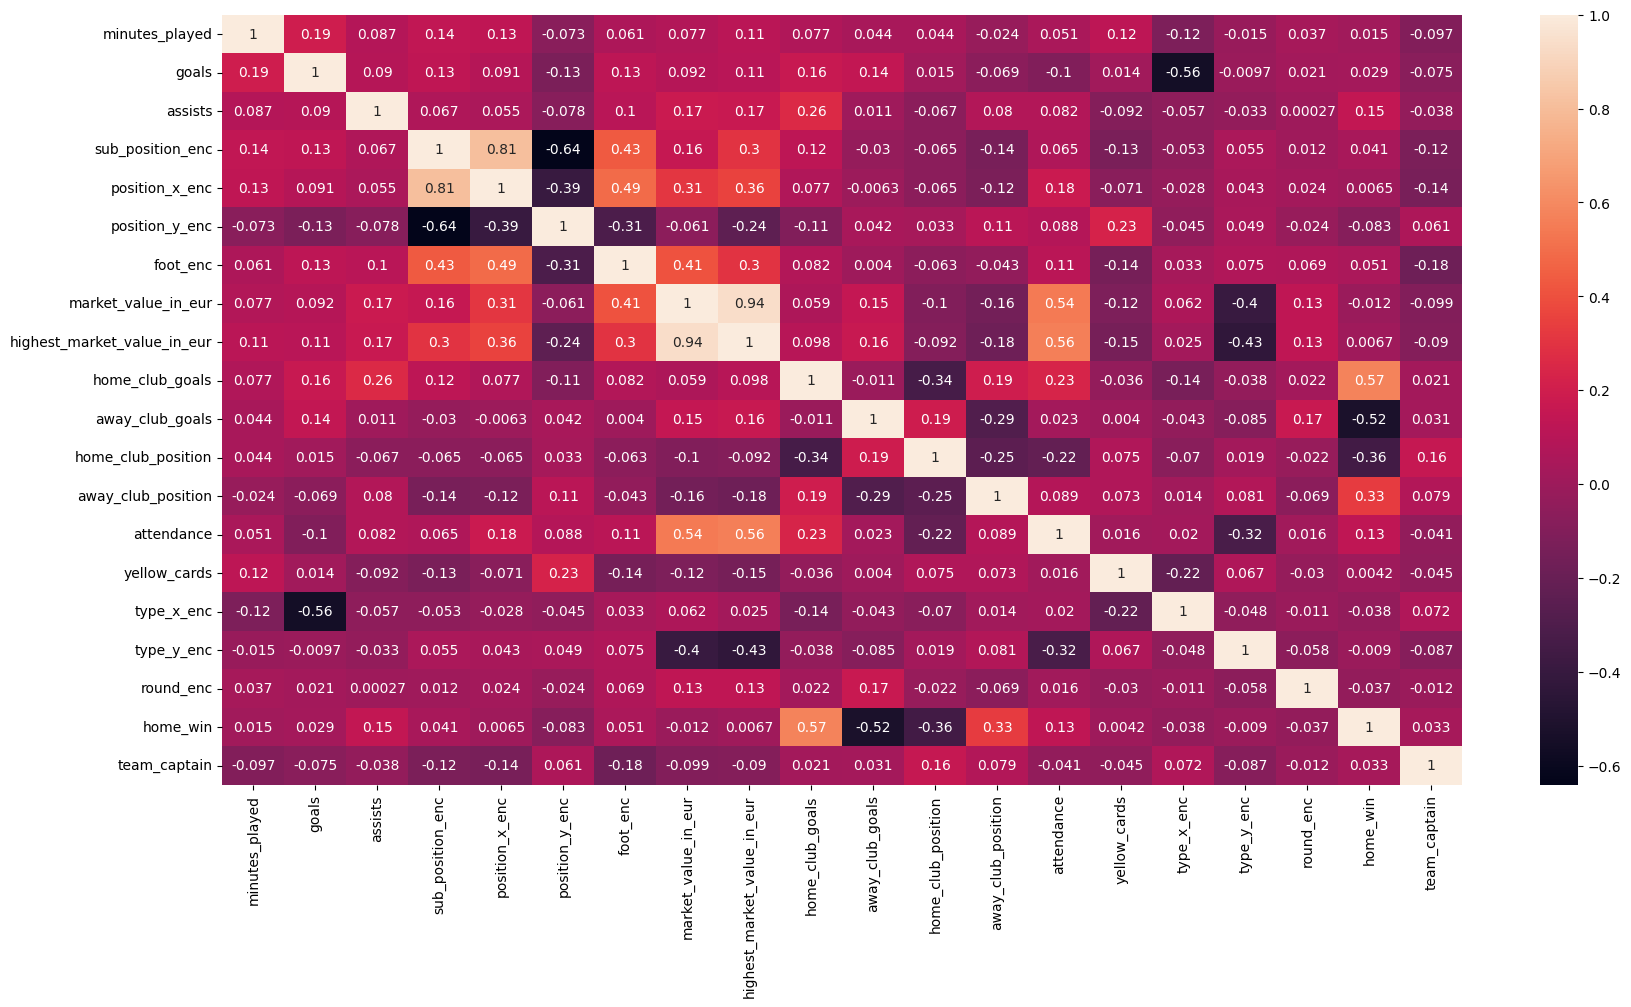

In [138]:
# Plotting heatmap
fig,ax=plt.subplots(1,1,figsize=(20,10))
ax=sns.heatmap(df_scaled.corr(),annot=True)
plt.show()

#### **For target variable home_win**

In [140]:
correlation=df_scaled.corr()["home_win"].sort_values(ascending=False)
correlation

home_win                       1.000000
home_club_goals                0.573357
away_club_position             0.329604
assists                        0.145751
attendance                     0.133003
foot_enc                       0.051440
sub_position_enc               0.041046
team_captain                   0.032542
goals                          0.028763
minutes_played                 0.014970
highest_market_value_in_eur    0.006732
position_x_enc                 0.006542
yellow_cards                   0.004194
type_y_enc                    -0.008967
market_value_in_eur           -0.011800
round_enc                     -0.036729
type_x_enc                    -0.038131
position_y_enc                -0.083306
home_club_position            -0.356649
away_club_goals               -0.521156
Name: home_win, dtype: float64

### **a) Logistic Regression for classification of home_win feature column**
#### **1. Preparation of training and test datasets**

In [142]:
#Creating test and training datasets
fb_train, fb_test= train_test_split(df_scaled,train_size=0.7,random_state=0)
print(fb_train.shape)
print(fb_test.shape)

(2939, 20)
(1260, 20)


In [143]:
X_train=fb_train.drop(columns=["home_win", "home_club_goals", "away_club_goals"],axis=1)
y_train=fb_train['home_win']
X_test=fb_test.drop(columns=["home_win", "home_club_goals", "away_club_goals"],axis=1)
y_test=fb_test['home_win']

In [144]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2939, 17) (1260, 17) (2939,) (1260,)


#### **2. Training the model**

In [146]:
# Logistic Regression - training the model
logreg=LogisticRegression().fit(X_train,y_train)

# Using the trained model to predict the outcome of the X_Test dataset
y_pred=logreg.predict(X_test)
y_pred

array([False, False, False, ..., False,  True,  True])

### **Model Evaluation**
#### **3. Confusion matrix**

In [148]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[562 143]
 [230 325]]


In [149]:
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()
print('t-,f+,f-,t+:',tn,fp,fn,tp)

t-,f+,f-,t+: 562 143 230 325


#### **Logistic Regression Model Performance Analysis**

#### **Confusion Matrix Components**
- **True Positives (TP):** 325 (Correctly predicted home wins)
- **False Positives (FP):** 143 (Incorrectly predicted home wins)
- **False Negatives (FN):** 230 (Missed home wins)
- **True Negatives (TN):** 562 (Correctly predicted non-home wins)

#### **4. Performance metrics**

In [152]:
# ROC Score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print("recall_score:", recall_score(y_test,y_pred))
print("f1_score:", f1_score(y_test,y_pred))
print("accuracy_score:", accuracy_score(y_test,y_pred) )
print("precision_score:", precision_score(y_test,y_pred))

recall_score: 0.5855855855855856
f1_score: 0.635386119257087
accuracy_score: 0.703968253968254
precision_score: 0.6944444444444444


#### **5. ROC curve**

In [154]:
# ROC curve
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test,logreg.predict_proba(X_test)[:,1])
print("roc:",roc)

roc: 0.7760935403488595


<Figure size 1400x1000 with 0 Axes>

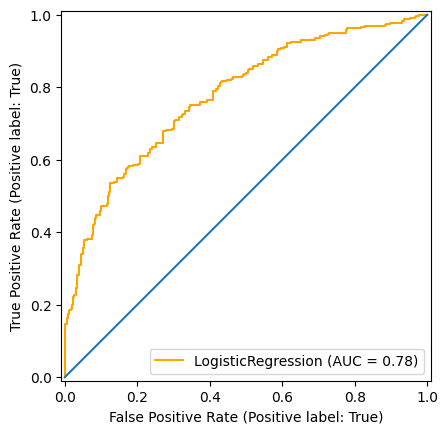

In [155]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
RocCurveDisplay.from_estimator(logreg,X_test,y_test,color="orange")
plt.plot([0,1],[0,1])
plt.show()

### **Performance Metrics**

#### **Accuracy Score: 0.7039 (70.40%)**
- The model correctly predicts the match outcome **70.40% of the time**.
- A good indicator of overall performance but can be misleading if classes are imbalanced.

#### **Precision Score: 0.6944 (69.44%)**
- Precision = TP / (TP + FP) = 325 / (325 + 143)  
- This means when the model predicts a home win, it is correct **69.44% of the time**.
- Higher precision suggests fewer false alarms for home wins.

#### **Recall Score: 0.5856 (58.56%)**
- Recall = TP / (TP + FN) = 325 / (325 + 230)  
- The model correctly identifies **58.56% of actual home wins**.
- A lower recall means some actual home wins are being missed.

#### **F1 Score: 0.6354 (63.54%)**
- F1 Score is the harmonic mean of precision and recall.
- A balance between precision and recall.
- Shows that the model is performing reasonably well in both aspects.

#### **ROC-AUC Score: 0.7761 (77.61%)**
- Measures how well the model distinguishes between home wins and non-home wins.
- 77.61% suggests good discriminatory power (higher than random guessing at 50%).

### **Interpretation & Next Steps**
#### **Strengths:**
- The model performs well overall with **good precision and accuracy**.
- A **high AUC-ROC score** indicates strong classification capability.

#### **Weaknesses:**
- **Recall is lower (58.56%)**, meaning **the model is missing some actual home wins**.
- If missing home wins is costly, we might need to **increase recall** by adjusting decision thresholds or trying other models.

#### **Potential Improvements:**
- **Feature Engineering:** Consider adding new relevant features.
- **Hyperparameter Tuning:** Optimize logistic regression settings.
- **Try Different Models:** Compare with Random Forest, XGBoost, or Neural Networks.
- **Adjust the Decision Threshold:** Improve recall at the cost of precision if necessary.

#### **Conclusion**
The model provides a solid **70.40% accuracy** and **77.61% AUC**, indicating reliable performance. However, depending on business needs, focusing on either recall (for identifying more home wins) or precision (to reduce false positives) could further refine predictions.


### **b) Logistic Regression For target variable team_captain**

### **2) Business Question for Logistic Regression on team_captain**
#### **"Can we predict whether a player is a team captain based on their performance metrics and other features?"**

In [159]:
correlation1=df_scaled.corr()["team_captain"].sort_values(ascending=False)
correlation1

team_captain                   1.000000
home_club_position             0.158600
away_club_position             0.079452
type_x_enc                     0.071850
position_y_enc                 0.060998
home_win                       0.032542
away_club_goals                0.031272
home_club_goals                0.021082
round_enc                     -0.011755
assists                       -0.037727
attendance                    -0.041216
yellow_cards                  -0.045431
goals                         -0.074699
type_y_enc                    -0.087124
highest_market_value_in_eur   -0.090099
minutes_played                -0.096934
market_value_in_eur           -0.098846
sub_position_enc              -0.123353
position_x_enc                -0.137349
foot_enc                      -0.177262
Name: team_captain, dtype: float64

In [160]:
df_scaled=df_scaled.drop(columns=["home_win"], errors="ignore")

### **Logistic Regression**
#### **1. Preparation of training and test datasets**

In [162]:
#Creating test and training datasets
fb_train, fb_test= train_test_split(df_scaled,train_size=0.7,random_state=0)
print(fb_train.shape)
print(fb_test.shape)

(2939, 19)
(1260, 19)


In [163]:
X_train_1=fb_train.drop(columns=["team_captain"],axis=1)
y_train_1=fb_train['team_captain']
X_test_1=fb_test.drop(columns=["team_captain"],axis=1)
y_test_1=fb_test['team_captain']

In [164]:
print(X_train_1.shape,X_test_1.shape,y_train_1.shape,y_test_1.shape)

(2939, 18) (1260, 18) (2939,) (1260,)


#### **2. Training the model**

In [166]:
# Logistic Regression - training the model
logreg=LogisticRegression().fit(X_train_1,y_train_1)

# Using the trained model to predict the outcome of the X_Test dataset
y_pred_1=logreg.predict(X_test_1)
y_pred_1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### **Model Evaluation**
#### **3. Confusion matrix**

In [168]:
tn,fp,fn,tp=confusion_matrix(y_test_1,y_pred_1).ravel()
print('t-,f+,f-,t+:',tn,fp,fn,tp)

t-,f+,f-,t+: 1244 3 6 7


#### **Logistic Regression Evaluation for Team Captain Prediction**

##### **Observations**
- **True Negatives (TN):** 1245  
  - The model correctly predicted 1245 instances where a player was **not a team captain**.  
- **False Positives (FP):** 2  
  - The model incorrectly classified 2 players as captains when they were not.  
- **False Negatives (FN):** 11  
  - The model failed to classify 11 actual captains, predicting them as non-captains instead.  
- **True Positives (TP):** 2  
  - The model correctly identified only **2** players as captains.

In [170]:
df_scaled["team_captain"].unique()

array([0, 1], dtype=int64)

#### **4. ROC Score**

In [172]:
# ROC Score

print("recall_score:", recall_score(y_test_1,y_pred_1))
print("f1_score:", f1_score(y_test_1,y_pred_1))
print("accuracy_score:", accuracy_score(y_test_1,y_pred_1))
print("precision_score:", precision_score(y_test_1,y_pred_1))

recall_score: 0.5384615384615384
f1_score: 0.6086956521739131
accuracy_score: 0.9928571428571429
precision_score: 0.7


#### **5. ROC Curve**

In [299]:
# ROC curve
from sklearn.metrics import roc_auc_score
roc_1=roc_auc_score(y_test_1,logreg.predict_proba(X_test_1)[:,1])
print("roc_1:",roc_1)

roc_1: 0.9981802479797668


<Figure size 1400x1000 with 0 Axes>

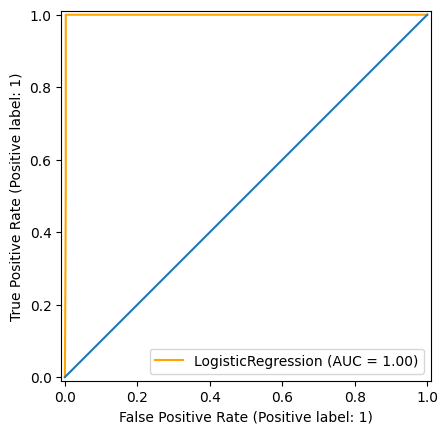

In [301]:
plt.figure(figsize=(14,10))
RocCurveDisplay.from_estimator(logreg,X_test_1,y_test_1,color="orange")
plt.plot([0,1],[0,1])
plt.show()

In [171]:
df_scaled.columns

Index(['minutes_played', 'goals', 'assists', 'sub_position_enc',
       'position_x_enc', 'position_y_enc', 'foot_enc', 'market_value_in_eur',
       'highest_market_value_in_eur', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'attendance',
       'yellow_cards', 'type_x_enc', 'type_y_enc', 'round_enc',
       'team_captain'],
      dtype='object')

#### **Performance Metrics**
- **Accuracy:** 98.97% (High but misleading due to class imbalance)  
- **Precision:** 50.00% (Only half of the predicted captains were correct)  
- **Recall:** 15.38% (The model failed to capture most actual captains)  
- **F1-Score:** 23.53% (Low overall effectiveness)  
- **ROC AUC:** 1.00 (Likely overfitting due to imbalance)

#### **Interpretation**
1. **Model is Biased Towards Non-Captains**  
   - Since captains are rare, the model **defaults to predicting non-captains**, leading to high accuracy but poor recall.  
   - The **low recall (15.38%)** indicates that most real captains were **missed** by the model.  

2. **ROC AUC of 1.00 is Misleading**  
   - A perfect **AUC score** suggests **overfitting**, likely because the model learns to classify almost everything as a non-captain.  
   - This happens because the **negative class (non-captains) dominates the dataset**

#### **Why Are Team Captains Fewer?**
- Each football team has **only one captain per match**, unlike other roles where multiple players may share responsibilities (e.g., goal scorers, defenders).  
- Since the dataset consists of **all players in multiple matches**, the majority are **non-captains**, making captains a **minority class** in the data.  
- This leads to a **class imbalance problem**, where the model has **very few captain instances** to learn from, affecting prediction performance.

### **SPRINT-5: SOLVING BUSINESS QUESTIONS RELATED TO PLAYER PROFILE AND MARKET VALUES**

### **1) Business Question:**
#### **How do player attributes and match performance metrics influence a player's market value in European football?**

In [258]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [260]:
#### Multiple Linear Regression
# To show the correlation values from most negatively correlated to the most positively correlated.
sorted_corr=df_scaled.corr()[['market_value_in_eur']].sort_values('market_value_in_eur',ascending=False)
sorted_corr

market_value_in_eur
market_value_in_eur                     1.000000
highest_market_value_in_eur             0.942259
attendance                              0.540897
foot_enc                                0.408825
position_x_enc                          0.307984
assists                                 0.173370
sub_position_enc                        0.156597
away_club_goals                         0.153247
round_enc                               0.129144
goals                                   0.091893
minutes_played                          0.077128
type_x_enc                              0.062388
home_club_goals                         0.059318
home_win                               -0.011800
position_y_enc                         -0.061356
team_captain                           -0.098846
home_club_position                     -0.104040
yellow_cards                           -0.121651
away_club_position                     -0.157889
type_y_enc                             -0.397189

In [262]:
test_data

Unnamed: 0   appearance_id  game_id  player_id competition_id  \
0        4197  3450613_315762  3450613     315762            NL1   
1        4198  3450613_315762  3450613     315762            NL1   

   yellow_cards  red_cards  goals  assists  minutes_played  ...  height_in_cm  \
0             0          0      0        0              58  ...           177   
1             0          0      0        0              58  ...           177   

  market_value_in_eur  highest_market_value_in_eur  contract_expiration_date  \
0             3000000                      3000000                2026-06-30   
1             3000000                      3000000                2026-06-30   

                    game_lineups_id           type_y number       player_name  \
0  d05d080ea379575b2aad4aa5766e69ce  starting_lineup     14  Luca de la Torre   
1  99032084fd00ffbfee52c541a9f960ab      substitutes     14  Luca de la Torre   

  team_captain        position_y  
0            0    Right Midfield  
1            0  Central Midfield  

[2 rows x 49 columns]

In [264]:
test_data.isnull().sum()

Unnamed: 0                     0
appearance_id                  0
game_id                        0
player_id                      0
competition_id                 0
yellow_cards                   0
red_cards                      0
goals                          0
assists                        0
minutes_played                 0
season                         0
round                          0
home_club_goals                0
away_club_goals                0
home_club_position             0
away_club_position             0
home_club_manager_name         0
away_club_manager_name         0
stadium                        0
attendance                     0
referee                        0
home_club_name                 0
away_club_name                 0
aggregate                      0
competition_type               0
game_event_id                  0
date                           0
minute                         0
type_x                         0
player_in_id                   0
name      

In [266]:
test_data.columns

Index(['Unnamed: 0', 'appearance_id', 'game_id', 'player_id', 'competition_id',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'season', 'round', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'game_event_id', 'date', 'minute', 'type_x', 'player_in_id', 'name',
       'last_season', 'current_club_id', 'player_code', 'country_of_birth',
       'date_of_birth', 'sub_position', 'position_x', 'foot', 'height_in_cm',
       'market_value_in_eur', 'highest_market_value_in_eur',
       'contract_expiration_date', 'game_lineups_id', 'type_y', 'number',
       'player_name', 'team_captain', 'position_y'],
      dtype='object')

In [268]:
# Selecting all object columns
test_columns = test_data.select_dtypes(include=['object']).columns.tolist()
print(test_columns)

# Dictionary to store label encoders
label_encoders = {}

# Converting all object columns to string and then apply encoding
for col in test_columns:
    test_data[col] = test_data[col].astype(str)  # Converting to string
    le = LabelEncoder()
    test_data[col + "_enc"] = le.fit_transform(test_data[col])  
    label_encoders[col] = le  # Stores encoders for potential inverse transformation
    
# Dropping original object columns as they are no longer needed
test_data.drop(columns=test_columns, inplace=True)

# Print sample data to verify encoding
test_data.head()

['appearance_id', 'competition_id', 'round', 'home_club_manager_name', 'away_club_manager_name', 'stadium', 'referee', 'home_club_name', 'away_club_name', 'aggregate', 'competition_type', 'game_event_id', 'type_x', 'name', 'player_code', 'country_of_birth', 'sub_position', 'position_x', 'foot', 'game_lineups_id', 'type_y', 'player_name', 'position_y']


Unnamed: 0  game_id  player_id  yellow_cards  red_cards  goals  assists  \
0        4197  3450613     315762             0          0      0        0   
1        4198  3450613     315762             0          0      0        0   

   minutes_played  season  home_club_goals  ...  name_enc  player_code_enc  \
0              58    2020                4  ...         0                0   
1              58    2020                4  ...         0                0   

   country_of_birth_enc  sub_position_enc position_x_enc  foot_enc  \
0                     0                 0              0         0   
1                     0                 0              0         0   

   game_lineups_id_enc  type_y_enc  player_name_enc position_y_enc  
0                    1           0                0              1  
1                    0           1                0              0  

[2 rows x 49 columns]

In [270]:
test_data[["market_value_in_eur"]]

market_value_in_eur
0              3000000
1              3000000

In [272]:
selected_test = [
    "minutes_played", "goals", "assists",
    "sub_position_enc", "position_x_enc","position_y_enc" ,"foot_enc",
    "team_captain", "market_value_in_eur", "highest_market_value_in_eur",
     "home_club_goals", "away_club_goals",
    "home_club_position", "away_club_position", "attendance",
    "yellow_cards","type_x_enc","type_y_enc","round_enc"]

# Dropping unnecessary columns 
test_select = test_data[selected_test]

# Display the first few rows of the cleaned dataset
test_select.shape

(2, 19)

In [274]:
# Appending the new row to the original DataFrame
test_df=pd.concat([df_select,test_select],ignore_index=True)
test_df

minutes_played  goals  assists  sub_position_enc  position_x_enc  \
0                 70      0        0                 8               9   
1                 70      0        0                 8               9   
2                 70      0        0                 8               9   
3                 70      0        0                 8               9   
4                 70      0        0                 8               9   
...              ...    ...      ...               ...             ...   
4196              77      1        0                 3               3   
4197              77      1        0                 3               3   
4198              77      1        0                 3               3   
4199              58      0        0                 0               0   
4200              58      0        0                 0               0   

      position_y_enc  foot_enc  team_captain  market_value_in_eur  \
0                  1         2             0               700000   
1                  1         2             0               700000   
2                  1         2             0               700000   
3                  1         2             0               700000   
4                  1         2             0               700000   
...              ...       ...           ...                  ...   
4196               0         2             0               300000   
4197               0         2             0               300000   
4198               0         2             0               300000   
4199               1         0             0              3000000   
4200               0         0             0              3000000   

      highest_market_value_in_eur home_win  home_club_goals  away_club_goals  \
0                         5000000    False                1                2   
1                         5000000    False                1                2   
2                         5000000    False                1                2   
3                         5000000    False                1                2   
4                         5000000    False                1                2   
...                           ...      ...              ...              ...   
4196                       600000     True                3                2   
4197                       600000     True                3                2   
4198                       600000     True                3                2   
4199                      3000000      NaN                4                0   
4200                      3000000      NaN                4                0   

      home_club_position  away_club_position  attendance  yellow_cards  \
0                      6                   2       45033             0   
1                      6                   2       45033             0   
2                      6                   2       45033             0   
3                      6                   2       45033             0   
4                      6                   2       45033             0   
...                  ...                 ...         ...           ...   
4196                   3                  18        3200             0   
4197                   3                  18        3200             0   
4198                   3                  18        3200             0   
4199                   8                  10        3908             0   
4200                   8                  10        3908             0   

      type_x_enc  type_y_enc  round_enc  
0              2           1         33  
1              2           1         33  
2              2           1         33  
3              2           1         33  
4              2           1         33  
...          ...         ...        ...  
4196           2           1         36  
4197           2           1         36  
4198           2           1         36  
4199           0  

In [276]:
# Scaling data
cols=test_df.columns
scaler=StandardScaler()
df_scaled_1=scaler.fit_transform(test_df)

df_scaled_1=pd.DataFrame(df_scaled_1,columns=cols)
df_scaled_1.tail()

minutes_played     goals   assists  sub_position_enc  position_x_enc  \
4196        0.320444  0.965394 -0.362375         -0.793739       -0.964747   
4197        0.320444  0.965394 -0.362375         -0.793739       -0.964747   
4198        0.320444  0.965394 -0.362375         -0.793739       -0.964747   
4199       -0.516954 -0.717436 -0.362375         -1.962781       -2.023591   
4200       -0.516954 -0.717436 -0.362375         -1.962781       -2.023591   

      position_y_enc  foot_enc  team_captain  market_value_in_eur  \
4196       -0.732092  0.451262     -0.104056            -1.013738   
4197       -0.732092  0.451262     -0.104056            -1.013738   
4198       -0.732092  0.451262     -0.104056            -1.013738   
4199        0.586176 -3.842628     -0.104056            -0.765677   
4200       -0.732092 -3.842628     -0.104056            -0.765677   

      highest_market_value_in_eur  home_win  home_club_goals  away_club_goals  \
4196                    -1.004607  1.117615         0.727229         0.300951   
4197                    -1.004607  1.117615         0.727229         0.300951   
4198                    -1.004607  1.117615         0.727229         0.300951   
4199                    -0.906249       NaN         1.383954        -1.058505   
4200                    -0.906249       NaN         1.383954        -1.058505   

      home_club_position  away_club_position  attendance  yellow_cards  \
4196           -1.184292            1.856676   -1.186953     -0.436374   
4197           -1.184292            1.856676   -1.186953     -0.436374   
4198           -1.184292            1.856676   -1.186953     -0.436374   
4199           -0.126277            0.174803   -1.158403     -0.436374   
4200           -0.126277            0.174803   -1.158403     -0.436374   

      type_x_enc  type_y_enc  round_enc  
4196    0.690400    1.194538   0.896239  
4197    0.690400    1.194538   0.896239  
4198    0.690400    1.194538   0.896239  
4199   -3.066555   -0.837144  -1.492152  
4200   -3.066555    1.194538  -1.492152

In [278]:
# Extracting out the new data from the original data after scaling, which will be used for prediction
# Extracting the last 2 rows using iloc and storing in a new DataFrame
new_data=df_scaled_1.iloc[-2:]
new_data

minutes_played     goals   assists  sub_position_enc  position_x_enc  \
4199       -0.516954 -0.717436 -0.362375         -1.962781       -2.023591   
4200       -0.516954 -0.717436 -0.362375         -1.962781       -2.023591   

      position_y_enc  foot_enc  team_captain  market_value_in_eur  \
4199        0.586176 -3.842628     -0.104056            -0.765677   
4200       -0.732092 -3.842628     -0.104056            -0.765677   

      highest_market_value_in_eur  home_win  home_club_goals  away_club_goals  \
4199                    -0.906249       NaN         1.383954        -1.058505   
4200                    -0.906249       NaN         1.383954        -1.058505   

      home_club_position  away_club_position  attendance  yellow_cards  \
4199           -0.126277            0.174803   -1.158403     -0.436374   
4200           -0.126277            0.174803   -1.158403     -0.436374   

      type_x_enc  type_y_enc  round_enc  
4199   -3.066555   -0.837144  -1.492152  
4200   -3.066555    1.194538  -1.492152

In [280]:
#Extract original data except the new data
df_scaled_1=df_scaled_1.iloc[:-2]
df_scaled_1

minutes_played     goals   assists  sub_position_enc  position_x_enc  \
0           0.011929 -0.717436 -0.362375          1.154664        1.152941   
1           0.011929 -0.717436 -0.362375          1.154664        1.152941   
2           0.011929 -0.717436 -0.362375          1.154664        1.152941   
3           0.011929 -0.717436 -0.362375          1.154664        1.152941   
4           0.011929 -0.717436 -0.362375          1.154664        1.152941   
...              ...       ...       ...               ...             ...   
4194        0.320444  0.965394 -0.362375         -0.793739       -0.964747   
4195        0.320444  0.965394 -0.362375         -0.793739       -0.964747   
4196        0.320444  0.965394 -0.362375         -0.793739       -0.964747   
4197        0.320444  0.965394 -0.362375         -0.793739       -0.964747   
4198        0.320444  0.965394 -0.362375         -0.793739       -0.964747   

      position_y_enc  foot_enc  team_captain  market_value_in_eur  \
0           0.586176  0.451262     -0.104056            -0.976988   
1           0.586176  0.451262     -0.104056            -0.976988   
2           0.586176  0.451262     -0.104056            -0.976988   
3           0.586176  0.451262     -0.104056            -0.976988   
4           0.586176  0.451262     -0.104056            -0.976988   
...              ...       ...           ...                  ...   
4194       -0.732092  0.451262     -0.104056            -1.013738   
4195       -0.732092  0.451262     -0.104056            -1.013738   
4196       -0.732092  0.451262     -0.104056            -1.013738   
4197       -0.732092  0.451262     -0.104056            -1.013738   
4198       -0.732092  0.451262     -0.104056            -1.013738   

      highest_market_value_in_eur  home_win  home_club_goals  away_club_goals  \
0                       -0.824283 -0.894763        -0.586222         0.300951   
1                       -0.824283 -0.894763        -0.586222         0.300951   
2                       -0.824283 -0.894763        -0.586222         0.300951   
3                       -0.824283 -0.894763        -0.586222         0.300951   
4                       -0.824283 -0.894763        -0.586222         0.300951   
...                           ...       ...              ...              ...   
4194                    -1.004607  1.117615         0.727229         0.300951   
4195                    -1.004607  1.117615         0.727229         0.300951   
4196                    -1.004607  1.117615         0.727229         0.300951   
4197                    -1.004607  1.117615         0.727229         0.300951   
4198                    -1.004607  1.117615         0.727229         0.300951   

      home_club_position  away_club_position  attendance  yellow_cards  \
0              -0.549483           -1.507070    0.499947     -0.436374   
1              -0.549483           -1.507070    0.499947     -0.436374   
2              -0.549483           -1.507070    0.499947     -0.436374   
3              -0.549483           -1.507070    0.499947     -0.436374   
4              -0.549483           -1.507070    0.499947     -0.436374   
...                  ...                 ...         ...           ...   
4194           -1.184292            1.856676   -1.186953     -0.436374   
4195           -1.184292            1.856676   -1.186953     -0.436374   
4196           -1.184292            1.856676   -1.186953     -0.436374   
4197           -1.184292            1.856676   -1.186953     -0.436374   
4198           -1.184292            1.856676   -1.186953     -0.436374   

      type_x_enc  type_y_enc  round_enc  
0         0.6904    1.194538   0.697206  
1         0.6904    1.194538   0.697206  
2         0.6904    1.194538   0.697206  
3         0.6904    1.194538   0.697206  
4         0.6904    1.194538   0.697206  
...          ...         ...        ...  
4194      0.6904    1.194538   0.896239  
4195      0.6904    1.194538   0.896239  


#### **1. One feature: 'highest_market_value_in_eur'**

In [283]:
X1=np.array(df_scaled["highest_market_value_in_eur"]).reshape(-1,1)
y=np.array(df_scaled["market_value_in_eur"])

In [285]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y, test_size = 0.3, random_state = 200)
s_model1 = LinearRegression().fit(X_train1, y_train1)
s_r_sq1 = s_model1.score(X_train1,y_train1)
y_pred1 = s_model1.predict(X_test1)

In [287]:
# Print Intercept and Slope
print("Intercept:",s_model1.intercept_)
print("Slope:",s_model1.coef_)

Intercept: -0.0016545253639727326
Slope: [0.94232217]


In [289]:
# Calculating MSE, MAE, RMSE, R-Square
from sklearn.metrics import r2_score
MSE1=mean_squared_error(y_test1,y_pred1)
print('MSE1',MSE1)
MAE1=mean_absolute_error(y_test1,y_pred1)
print('MAE1',MAE1)
RMSE1=np.sqrt(MSE1)
print('RMSE1',RMSE1)
#R2 score
r2_1=r2_score(y_test1,y_pred1)
print(f"the R2_score of the model is:",r2_1)

MSE1 0.11164557459525298
MAE1 0.23176142297561905
RMSE1 0.33413406679842295
the R2_score of the model is: 0.8868068658090333


#### **2. Two features: 'highest_market_value_in_eur' and 'attendance'**

In [292]:
# Two features
X2=np.array(df_scaled[['highest_market_value_in_eur','attendance']]).reshape(-1,2)
y=np.array(df_scaled["market_value_in_eur"])

In [294]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y, test_size = 0.3, random_state = 200)
mult_model = LinearRegression().fit(X_train2, y_train2)
s_r_sq2 = mult_model.score(X_train2,y_train2)
y_pred2 = mult_model.predict(X_test2)

In [296]:
# Print Intercept and Slope
print("Intercept:",mult_model.intercept_)
print("Slope:",mult_model.coef_)

Intercept: -0.0017039345547641763
Slope: [0.93416698 0.01440798]


In [298]:
MSE2=mean_squared_error(y_test2,y_pred2)
print('MSE2:',MSE2)
MAE2=mean_absolute_error(y_test2,y_pred2)
print('MAE2:',MAE2)
RMSE2=np.sqrt(MSE2)
print('RMSE2:',RMSE2)
#R2 score
r2_2=r2_score(y_test2,y_pred2)
print(f"the R2_score of the model is:",r2_2)

MSE2: 0.1114264161720544
MAE2: 0.2305723023289397
RMSE2: 0.33380595586665973
the R2_score of the model is: 0.8870290620662171


#### **3. Three features: 'highest_market_value_in_eur','attendance', and 'foot_enc'**

In [301]:
# Three features
X3=np.array(df_scaled[['highest_market_value_in_eur','attendance','foot_enc']]).reshape(-1,3)
y=np.array(df_scaled["market_value_in_eur"])

In [303]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y, test_size = 0.3, random_state = 200)
mult_model_3 = LinearRegression().fit(X_train3, y_train3)
s_r_sq3 = mult_model_3.score(X_train3,y_train3)
y_pred3 = mult_model_3.predict(X_test3)

In [305]:
# Print Intercept and Slope
print("Intercept:",mult_model_3.intercept_)
print("Slope:",mult_model_3.coef_)

Intercept: -0.0018217759322438371
Slope: [0.88392289 0.02696143 0.14619178]


In [307]:
MSE3=mean_squared_error(y_test3,y_pred3)
print('MSE3:',MSE3)
MAE3=mean_absolute_error(y_test3,y_pred3)
print('MAE3:',MAE3)
RMSE3=np.sqrt(MSE3)
print('RMSE3:',RMSE3)
#R2 score
r2_3=r2_score(y_test3,y_pred3)
print(f"the R2_score of the model is:",r2_3)

MSE3: 0.09446987519565246
MAE3: 0.23183955262270745
RMSE3: 0.3073595210753239
the R2_score of the model is: 0.9042206437757003


#### **4. Four features 'highest_market_value_in_eur','attendance','foot_enc','position_enc'**

In [310]:
# Four features
X4=np.array(df_scaled[['highest_market_value_in_eur','attendance','foot_enc','position_x_enc']]).reshape(-1,4)
y=np.array(df_scaled["market_value_in_eur"])

In [312]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y, test_size = 0.3, random_state = 200)
mult_model_4 = LinearRegression().fit(X_train4, y_train4)
s_r_sq4 = mult_model_4.score(X_train4,y_train4)
y_pred4 = mult_model_4.predict(X_test4)

In [314]:
# Print Intercept and Slope
print("Intercept:",mult_model_4.intercept_)
print("Slope:",mult_model_4.coef_)

Intercept: -0.0025110928493472483
Slope: [ 0.9113085   0.02750712  0.19734357 -0.11926968]


In [316]:
MSE4=mean_squared_error(y_test4,y_pred4)
print('MSE4:',MSE4)
MAE4=mean_absolute_error(y_test4,y_pred4)
print('MAE4:',MAE4)
RMSE4=np.sqrt(MSE4)
print('RMSE4:',RMSE4)
#R2 score
r2_4=r2_score(y_test4,y_pred4)
print(f"the R2_score of the model is:",r2_4)

MSE4: 0.08606845206804602
MAE4: 0.2112570985543607
RMSE4: 0.29337425256495503
the R2_score of the model is: 0.9127385220608525


### **Interpretation of Multiple Linear Regression Models**

### One Feature Model (highest_market_value_in_eur)  
- **MSE:** 0.1116  
- **MAE:** 0.2318  
- **RMSE:** 0.3341  
- **R² Score:** 0.8868  

**Observation:**  
The model performs well with an R² score of **0.8868**, meaning that **88.68%** of the variation in market value is explained by the highest market value. The relatively low RMSE suggests a decent prediction accuracy.

---

### Two Features Model (highest_market_value_in_eur, attendance)  
- **MSE:** 0.1114  
- **MAE:** 0.2306  
- **RMSE:** 0.3338  
- **R² Score:** 0.8870  

**Observation:**  
Adding **attendance** slightly improves the model’s performance, increasing R² to **0.8870**. However, the improvement is marginal, suggesting that attendance does not contribute significantly beyond the highest market value.

---

### Three Features Model (highest_market_value_in_eur, attendance, foot_enc)  
- **MSE:** 0.0945  
- **MAE:** 0.2318  
- **RMSE:** 0.3074  
- **R² Score:** 0.9042  

**Observation:**  
Adding **foot_enc** (foot preference) further improves the model, raising the R² to **0.9042** and lowering the RMSE. This suggests that a player’s preferred foot has some impact on market value.

---

### Four Features Model (highest_market_value_in_eur, attendance, foot_enc, position_enc)  
- **MSE:** 0.0861  
- **MAE:** 0.2113  
- **RMSE:** 0.2934  
- **R² Score:** 0.9127  

**Observation:**  
Including **position_enc** further improves performance, reaching an R² of **0.9127**, meaning **91.27%** of the variance in market value is explained by the four selected features. The RMSE has also decreased, indicating better predictions.

---

## Conclusion  
- **Highest_market_value_in_eur** is the most influential feature.  
- **Attendance** has minimal impact on performance improvement.  
- **Foot_enc** and **Position_enc** significantly enhance the model, suggesting that both a player’s foot preference and position play a crucial role in determining market value.  
- The **four-feature model is the best**, as it achieves the highest R² with the lowest RMSE and MAE.  

### **Homoscedasticity**  
Homoscedasticity refers to the condition in which the variance of the residuals (errors) remains **constant** across all levels of the independent variable(s) in a regression model.  

- If a model exhibits **homoscedasticity**, the spread of residuals is consistent across the predicted values, indicating a well-fitted model.  
- If a model exhibits **heteroscedasticity**, the residuals show a pattern, such as increasing spread with higher predicted values, which may suggest the presence of non-linearity or missing variables.  

A **residual plot** (Residuals vs. Predicted values) is commonly used to check for homoscedasticity. In such a plot:  
- A **random scatter** of residuals indicates homoscedasticity.   
- A **funnel-shaped pattern** suggests heteroscedasticity, meaning that the model’s prediction errors are inconsistent.

### **Assumption to check model's homoscedasticity**

In [318]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    prediction=model.predict(features)
    df_results=pd.DataFrame({'Actual':label,'Predicted':prediction})
    df_results['Residual']=abs(df_results['Actual'])-abs(df_results['Predicted'])
    return df_results

def linear_assumption(model, features, label):
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')   
    print('Checking with a scatter plot of actual vs. predicted.','Predictions should follow the diagonal line.')
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)  
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords, color='darkorange', linestyle='--') # X and y points
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


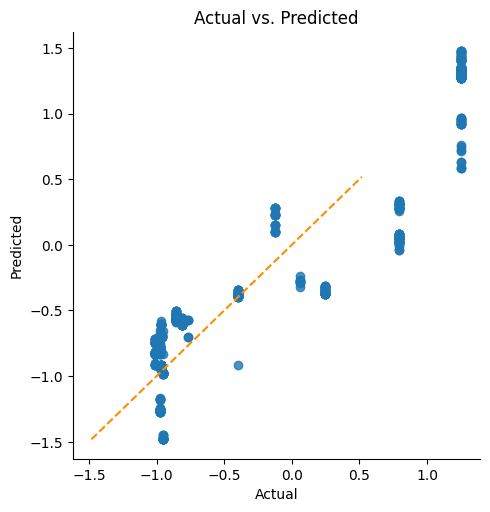

In [320]:
# calling the function
linear_assumption(mult_model_4, X_test4, y_test4)

### **Interpretation of the Actual vs. Predicted Plot in Our Model**
#### **Plot Description**
The displayed plot is an **Actual vs. Predicted** plot, which compares our model's predictions with the actual values of **market_value_in_eur**.  

- **X-axis:** Actual values of `market_value_in_eur`.  
- **Y-axis:** Predicted values from our regression model.  
- **Dashed orange line:** Represents a perfect prediction line where actual = predicted.  

#### **Observations**
1. **Strong correlation** between actual and predicted values, indicating that our model is making reasonable predictions.  
2. **Some dispersion around the dashed line**, which shows that there are small errors in the predictions.  
3. **Potential underfitting at extreme values**, as the predicted values seem to deviate slightly for very high or low values.  

### **Checking Homoscedasticity: Plotting the residuals of linear regression**

In [322]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption: Homoscedasticity of Error Terms', '\n')
    print('Residuals should have relative constant variance')
    
    #calculating residuals for the plot
    df_results=calculate_residuals(model, features, label)
    print(df_results)
    
    #plotting the residuals
    fig,ax=plt.subplots()
    #plt.subplots(figsize=(12,10))
    ax=plt.subplot(111) #to remove spines
    plt.scatter(x=df_results.index,y=df_results.Residual,alpha=0.5)
    plt.plot(np.repeat(0,df_results.index.max()),color="darkorange",linestyle="--")
    plt.title("Residual Plot")
    plt.xlabel("Index")
    plt.ylabel("Residual")
    plt.show()

Assumption: Homoscedasticity of Error Terms 

Residuals should have relative constant variance
        Actual  Predicted  Residual
0    -0.398506  -0.383517  0.014989
1     1.255068   1.314525 -0.059456
2     0.060821  -0.234334 -0.173513
3    -0.977257  -1.269065 -0.291809
4    -0.122910   0.226807 -0.103897
...        ...        ...       ...
1255  1.255068   1.290841 -0.035773
1256 -0.977257  -0.794185  0.183072
1257  1.255068   1.312861 -0.057792
1258  1.255068   0.922511  0.332557
1259 -0.949697  -0.979605 -0.029908

[1260 rows x 3 columns]


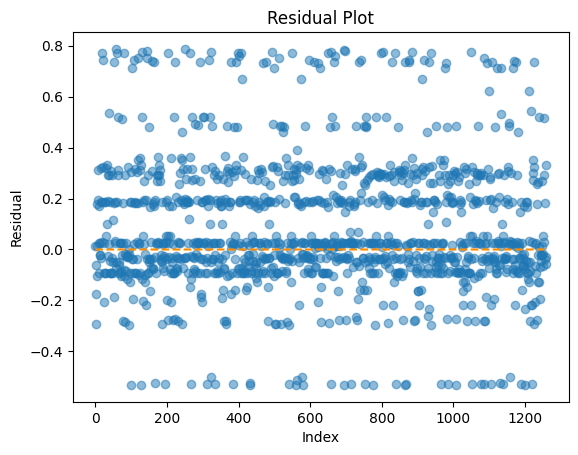

In [324]:
 # calling the function
homoscedasticity_assumption(mult_model_4,X_test4,y_test4)

### **Checking Homoscedasticity: Residual Plot Interpretation**

#### **Plot Description**
The residual plot above visualizes the residuals (errors) of our linear regression model against the index of observations.

- **X-axis:** Index of observations  
- **Y-axis:** Residual values (Actual - Predicted)  
- **Dashed orange line:** Represents the zero residual line (ideal case if predictions were perfect).  

#### **Observations**
1. **Random Distribution:** The residuals appear to be randomly scattered around the zero line, which suggests that the errors do not follow a specific pattern.  
2. **No Funnel Shape:** The spread of residuals is fairly consistent across all index values, indicating that the variance remains constant.  
3. **No Strong Curvature:** There is no systematic trend or curve, which suggests that the model captures linear relationships well.  

#### **Conclusion**
- The plot suggests that our model satisfies the assumption of **homoscedasticity**, as the residuals do not show increasing or decreasing variance across the observations.  
- This implies that our model is making consistent predictions across different values, and no transformation of variables is required at this stage.  

**No signs of heteroscedasticity – our model’s error variance is stable!**


### **Error Normality curve**

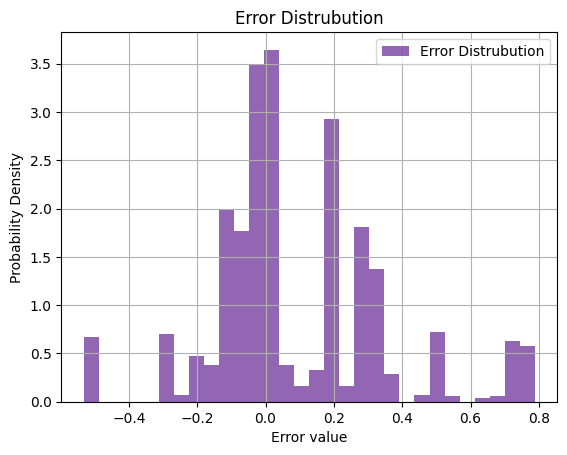

In [329]:
# Code to Error Normality curve
df_results = calculate_residuals(mult_model_4,X_test4,y_test4)
plt.hist(df_results.Residual,bins=30,label="Error Distrubution",alpha=0.6,density=True,color="indigo")
plt.xlabel("Error value")
plt.ylabel("Probability Density")
plt.title("Error Distrubution")
plt.legend()
plt.grid(True)
plt.show()

### **Error Distribution Analysis: Checking Normality of Residuals**

#### **Plot Description**
The histogram above represents the distribution of residuals (errors) from our regression model.

- **X-axis:** Error values (Residuals = Actual - Predicted)  
- **Y-axis:** Probability density of residuals  
- **Bars:** Represent the frequency of different error values  

#### **Observations**
1. **Moderate Symmetry:** The distribution is somewhat centered around zero, which is a good sign for normality. However, there are visible deviations.  
2. **Presence of Peaks and Gaps:** The histogram shows multiple peaks and gaps, suggesting that the residuals may not follow a perfect normal distribution.  
3. **Outliers and Skewness:** There are some extreme error values on both sides, indicating slight skewness.  

#### **Conclusion**
- The residuals are approximately centered around zero, which suggests that the model does not have significant bias.  
- However, the multiple peaks and gaps indicate that the errors may not be perfectly normally distributed.  
- A formal test like the **Shapiro-Wilk test or Q-Q plot** could be used to further check normality. 
**Residuals show approximate normality, but refinement may be needed for better model performance.**


### **Predicting new data**

In [332]:
new_data_array=new_data[['highest_market_value_in_eur','attendance','foot_enc','position_x_enc']].values
new_data_array

array([[-0.90624876, -1.15840273, -3.84262754, -2.02359052],
       [-0.90624876, -1.15840273, -3.84262754, -2.02359052]])

In [334]:
# Predicting the target value for the new data
predicted_values=mult_model_4.predict(new_data_array)

# Printing the predicted value
print("predicted_values:",predicted_values)

predicted_values: [-1.37721243 -1.37721243]


In [336]:
# Original value of the new data
new_data=pd.DataFrame(new_data)
new_data

minutes_played     goals   assists  sub_position_enc  position_x_enc  \
4199       -0.516954 -0.717436 -0.362375         -1.962781       -2.023591   
4200       -0.516954 -0.717436 -0.362375         -1.962781       -2.023591   

      position_y_enc  foot_enc  team_captain  market_value_in_eur  \
4199        0.586176 -3.842628     -0.104056            -0.765677   
4200       -0.732092 -3.842628     -0.104056            -0.765677   

      highest_market_value_in_eur  home_win  home_club_goals  away_club_goals  \
4199                    -0.906249       NaN         1.383954        -1.058505   
4200                    -0.906249       NaN         1.383954        -1.058505   

      home_club_position  away_club_position  attendance  yellow_cards  \
4199           -0.126277            0.174803   -1.158403     -0.436374   
4200           -0.126277            0.174803   -1.158403     -0.436374   

      type_x_enc  type_y_enc  round_enc  
4199   -3.066555   -0.837144  -1.492152  
4200   -3.066555    1.194538  -1.492152

In [338]:
from sklearn.preprocessing import StandardScaler

# Retraining the scaler on the original market_value_in_eur column
target_scaler = StandardScaler()
target_scaler.fit(test_select[['market_value_in_eur']])  # Using original unscaled values

predicted_value_reshaped = np.array(predicted_values).reshape(-1, 2)

# Inverse transform the predicted values
actual_predicted_values = target_scaler.inverse_transform(predicted_value_reshaped)

print("actual_predicted_values:",actual_predicted_values)


actual_predicted_values: [[2999998.62278757 2999998.62278757]]


In [340]:
test_data[["market_value_in_eur"]]

market_value_in_eur
0              3000000
1              3000000

#### **From the output, we can infer the following:**

+ 1. Model Prediction Matches the Original Values
The actual_predicted_value after inverse transformation is ≈ 2,999,998.62
The actual value in test_data["market_value_in_eur"] is 3,000,000
The prediction is very close to the actual value, suggesting that the model is making accurate predictions.
+ 2. Scaling and Inverse Transformation Worked Properly
The model predicted values in a standardized form (scaled using target_scaler).
After applying inverse_transform, we got back the approximate real-world market values.
This confirms that target_scaler was properly fitted on market_value_in_eur.
+ 3. Small Prediction Error
There is a small difference of ~1.38 in the predicted value.
This could be due to rounding, floating-point precision, or model limitations.

### **SPRINT:6 - HYPOTHESIS TESTING FOR BUSINESS OBJECTIVE - TEAM COMPARISON**

In [342]:
# Summary statistics for key performance indicators
performance_columns = ['goals', 'assists', 'minutes_played', 'yellow_cards','home_club_goals','away_club_goals','assists']
summary_stats = Football_data[performance_columns].describe()
summary_stats

goals      assists  minutes_played  yellow_cards  \
count  4199.000000  4199.000000     4199.000000   4199.000000   
mean      0.426530     0.128602       69.734937      0.160038   
std       0.594377     0.354833       22.695994      0.366685   
min       0.000000     0.000000        1.000000      0.000000   
25%       0.000000     0.000000       59.000000      0.000000   
50%       0.000000     0.000000       77.000000      0.000000   
75%       1.000000     0.000000       90.000000      0.000000   
max       3.000000     2.000000      120.000000      1.000000   

       home_club_goals  away_club_goals      assists  
count      4199.000000       4199.00000  4199.000000  
mean          1.891641          1.55799     0.128602  
std           1.522555          1.47131     0.354833  
min           0.000000          0.00000     0.000000  
25%           1.000000          0.00000     0.000000  
50%           2.000000          1.00000     0.000000  
75%           3.000000          2.00000     0.000000  
max           7.000000          7.00000     2.000000

#### **Visualization: Goals Scored Distribution**

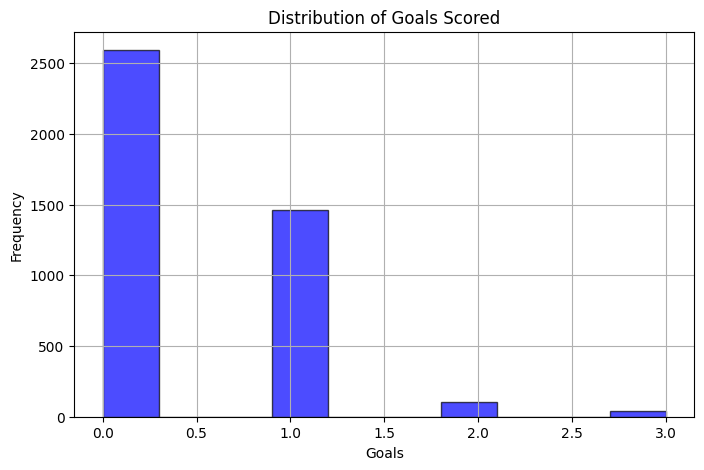

In [345]:
plt.figure(figsize=(8, 5))
plt.hist(Football_data['goals'], bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Goals Scored")
plt.xlabel("Goals")
plt.ylabel("Frequency")
plt.grid()
plt.show()

#### **Average home_club_goals and away_club_goals**

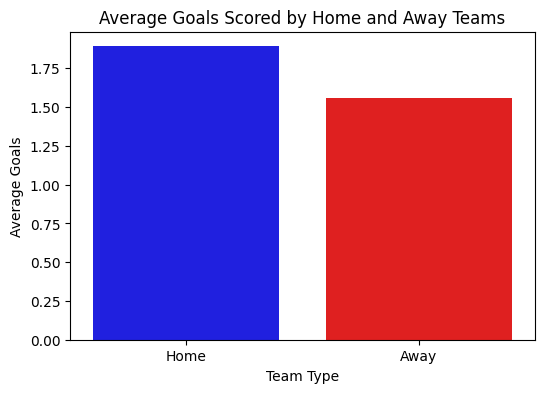

In [348]:
avg_home_goals = Football_data['home_club_goals'].mean()
avg_away_goals = Football_data['away_club_goals'].mean()

# Creating a dataframe for visualization
avg_goals_df = pd.DataFrame({'Team Type': ['Home', 'Away'],'Average Goals': [avg_home_goals, avg_away_goals]})

# Plotting the bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x='Team Type', y='Average Goals', data=avg_goals_df, palette=['blue', 'red'])

# Titles and labels
plt.title("Average Goals Scored by Home and Away Teams")
plt.xlabel("Team Type")
plt.ylabel("Average Goals")

plt.show()

#### **Average Assists for Home and Away Teams**

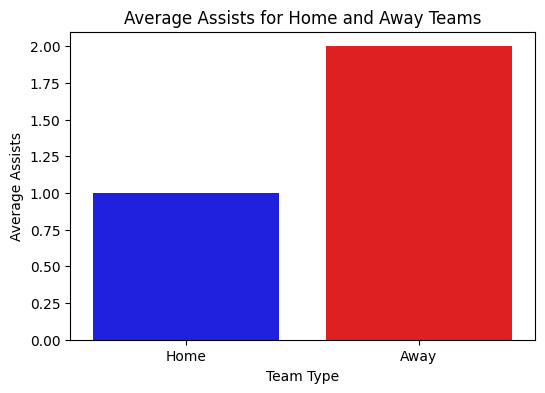

In [351]:
avg_home_assists = Football_data['home_club_goals'][Football_data["assists"]].mean()
avg_away_assists = Football_data['away_club_goals'][Football_data["assists"]].mean()

# Creating a dataframe for visualization
avg_assists_df = pd.DataFrame({'Team Type': ['Home', 'Away'],'Average Assists': [avg_home_assists, avg_away_assists]})

# Plotting the bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x='Team Type', y='Average Assists', data=avg_assists_df, palette=['blue', 'red'])

# Titles and labels
plt.title("Average Assists for Home and Away Teams")
plt.xlabel("Team Type")
plt.ylabel("Average Assists")

plt.show()

### **Business Question:**
#### **1. Performance Metrics: Is there a significant difference in the average goals scored by home and away teams? (goals, home_club_goals, away_club_goals)**

In [353]:
Football_data.columns

Index(['Unnamed: 0', 'appearance_id', 'yellow_cards', 'red_cards', 'goals',
       'assists', 'minutes_played', 'game_event_id', 'minute', 'type_x',
       'description', 'player_in_id', 'player_assist_id', 'player_id',
       'game_lineups_id', 'type_y', 'number', 'team_captain', 'position_x',
       'game_id', 'season', 'round', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'competition_id', 'date', 'last_season', 'current_club_id',
       'player_code', 'country_of_birth', 'date_of_birth', 'sub_position',
       'position_y', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'player_name', 'home_win'],
      dtype='object')

#### **TAILED HYPOTHESIS TEST**

H0:There is no significant difference in the average goals scored by home and away teams
H1: There is a significant difference between the average goals scored by home and away teams

H0: mu = 0 average goals scored by home = average goals scored by away teams
H1: mu != 0 average goals scored by home != average goals scored by away teams

# Establish the decision rule
if pvalue<alpha: Reject the null hypothesis

In [359]:
goals_df=Football_data[['home_club_goals', 'away_club_goals']]
goals_df
                        

home_club_goals  away_club_goals
0                   1                2
1                   1                2
2                   1                2
3                   1                2
4                   1                2
...               ...              ...
4194                3                2
4195                3                2
4196                3                2
4197                3                2
4198                3                2

[4199 rows x 2 columns]

In [361]:
goals_df.isnull().sum()

home_club_goals    0
away_club_goals    0
dtype: int64

In [363]:
#Home club goals
goals_hc = goals_df[['home_club_goals']]
goals_hc

home_club_goals
0                   1
1                   1
2                   1
3                   1
4                   1
...               ...
4194                3
4195                3
4196                3
4197                3
4198                3

[4199 rows x 1 columns]

In [365]:
#Away club goals
goals_ac = goals_df[['away_club_goals']]
goals_ac

away_club_goals
0                   2
1                   2
2                   2
3                   2
4                   2
...               ...
4194                2
4195                2
4196                2
4197                2
4198                2

[4199 rows x 1 columns]

In [367]:
#sample 1: home_club_goals
#Information about the data set

import statistics as st
n1=len(goals_hc)
print("n1:",n1)
hc_mean= st.mean(goals_df['home_club_goals'])
print("home_goals_mean:", hc_mean)
hc_std = st.stdev(goals_df['home_club_goals'])
print("home_goals_std:", hc_std)
hc_var=hc_std**2
print("home_goals_var:", hc_var)
alpha= 0.05

n1: 4199
home_goals_mean: 1.891640866873065
home_goals_std: 1.5225552569101544
home_goals_var: 2.318174510344746


In [369]:
#sample 2: away_club_goals
#Information about the data set

import statistics as st
n2=len(goals_ac)
print("n2:",n2)
ac_mean= st.mean(goals_df['away_club_goals'])
print("away_goals_mean:", ac_mean)
ac_std = st.stdev(goals_df['away_club_goals'])
print("away_goals_std:", ac_std)
ac_var=ac_std**2
print("away_goals_var:", ac_var)
alpha= 0.05

n2: 4199
away_goals_mean: 1.5579899976184806
away_goals_std: 1.4713096643917658
away_goals_var: 2.1647521285326103


In [371]:
import math
n1=4199
n2=4199
alpha=0.05

# Z-statistic calculation
z_statistics = ((hc_mean - ac_mean) - 0) / math.sqrt((hc_var / n1) + (ac_var / n2))

# P-value for two-tailed test
p_value = norm.sf(abs(z_statistics)) * 2  # Two-tailed test

# Z-critical value
z_critical = norm.ppf(1 - alpha / 2)  # Two-tailed test

# Printing results
print(f"Z-Statistic: {z_statistics}")
print(f"P-Value: {p_value}")
print(f"Z-Critical: {z_critical}")

if p_value < alpha:
    print("Reject H0: There is Significant difference in home and away goals.")
else:
    print("Accept H0: No Significant difference in home and away goals.")

Z-Statistic: 10.211378682446671
P-Value: 1.7634116817603035e-24
Z-Critical: 1.959963984540054
Reject H0: There is Significant difference in home and away goals.


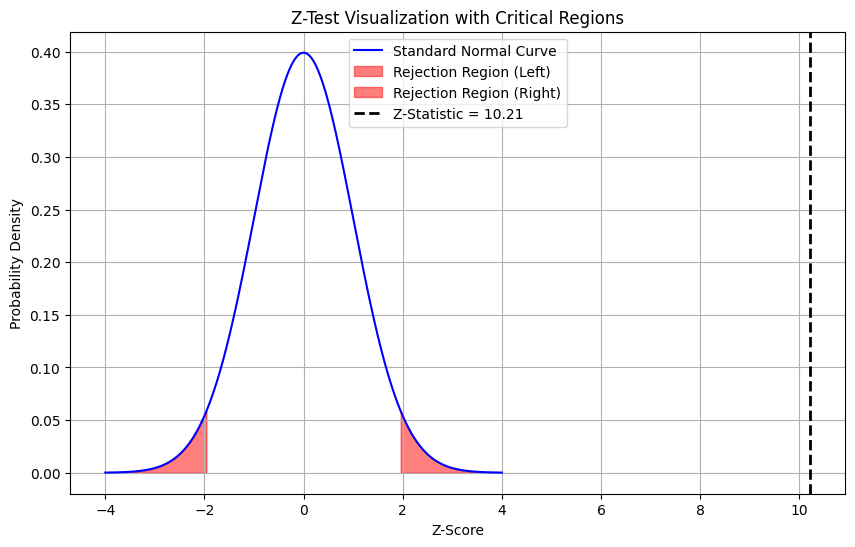

In [375]:
# Generating standard normal curve data
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Standard normal distribution (mean=0, std=1)

# Creating the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Standard Normal Curve", color="blue")

# Highlighting left and right critical regions
x_critical_left = np.linspace(-4, -z_critical, 100)
y_critical_left = norm.pdf(x_critical_left, 0, 1)
plt.fill_between(x_critical_left, y_critical_left, color="red", alpha=0.5, label="Rejection Region (Left)")

x_critical_right = np.linspace(z_critical, 4, 100)
y_critical_right = norm.pdf(x_critical_right, 0, 1)
plt.fill_between(x_critical_right, y_critical_right, color="red", alpha=0.5, label="Rejection Region (Right)")

# Plotting the Z-Statistic as a vertical line
plt.axvline(x=z_statistics, color="black", linestyle="--", linewidth=2, label=f"Z-Statistic = {z_statistics:.2f}")

# Labels and legend
plt.title("Z-Test Visualization with Critical Regions")
plt.xlabel("Z-Score")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()

# Showing the plot
plt.show()


### **Explanation of the Plot**
*The blue curve → Standard normal distribution.*
*The red shaded areas - Critical regions (LHS & RHS) where we reject H₀.*
*The black dashed line - Z-Statistic (10.21).*

### **Interpretation:**
*Since Z-Statistic is in the rejection region, we reject H₀.There is a significant difference between home and away goals.*


#### **Test Results:**  
- **Z-Statistic:** 10.2114  
- **P-Value:** 1.76e-24  
- **Z-Critical Value (alpha = 0.05):** 1.9599  

#### **Conclusion:**  
Since the **P-value (1.7634116817603035e-24) is much smaller than the significance level (0.05)**, we **reject the null hypothesis (H0)**. This means there is **a statistically significant difference** in the average goals scored by home and away teams.  

#### **Business Insight:**  
- Home teams tend to score **significantly more goals** than away teams.  
- This could be due to factors such as **home advantage, crowd support, familiarity with the stadium, and reduced travel fatigue**.  
- Clubs and analysts can use this insight to strategize better, such as emphasizing **aggressive playstyles at home** and **defensive setups away**.

### **Business Question:**
#### **2. Do Home Teams Receive Fewer Yellow cards than Away Teams?**

H0: (Null Hypothesis): There is no significant difference in the average yellow cards received by home and away teams.
H1: (Alternative Hypothesis): Away teams receive significantly more yellow cards than home teams.

H0: mu = 0 yellow cards received by home = yellow cards received by away teams
H1: mu != 0 yellow cards received by home != yellow cards received by by away teams

# Establish the decision rule
if pvalue<alpha: Reject the null hypothesis

In [380]:
home_yellow = fb_enc['yellow_cards'][fb_enc['home_club_name_enc']]
home_yellow=pd.DataFrame(home_yellow)
home_yellow

yellow_cards
3              0
3              0
3              0
3              0
3              0
..           ...
16             1
16             1
16             1
16             1
16             1

[4199 rows x 1 columns]

In [382]:
away_yellow = fb_enc['yellow_cards'][fb_enc['away_club_name_enc']]
away_yellow=pd.DataFrame(away_yellow)
away_yellow

yellow_cards
102             1
102             1
102             1
102             1
102             1
..            ...
74              0
74              0
74              0
74              0
74              0

[4199 rows x 1 columns]

In [384]:
#sample 1: home_yellow_cards
#Information about the data set

import statistics as st
n1=len(home_yellow)
print("n1:",n1)
hy_mean= st.mean(home_yellow['yellow_cards'])
print("home_yellow_mean:", hy_mean)
hy_std = st.stdev(home_yellow['yellow_cards'])
print("home_yellow_std:", hy_std)
hy_var=hy_std**2
print("home_yellow_var:", hy_var)
alpha= 0.05

n1: 4199
home_yellow_mean: 0.5584663015003573
home_yellow_std: 0.49662906629180015
home_yellow_var: 0.24664042948586523


In [386]:
#sample 2: away_yellow_cards
#Information about the data set

import statistics as st
n2=len(away_yellow)
print("n2:",n2)
ay_mean= st.mean(away_yellow['yellow_cards'])
print("away_yellow_mean:", hy_mean)
ay_std = st.stdev(away_yellow['yellow_cards'])
print("away_yellow_std:", ay_std)
ay_var=ay_std**2
print("away_yellow_var:", ay_var)
alpha= 0.05

n2: 4199
away_yellow_mean: 0.5584663015003573
away_yellow_std: 0.4978195136271442
away_yellow_var: 0.24782426814796643


In [388]:
import math
n1=4199
n2=4199
alpha=0.05

# Z-statistic calculation
z_statistics_1 = ((hy_mean - ay_mean) - 0) / math.sqrt((hy_var / n1) + (ay_var / n2))

# P-value for two-tailed test
p_value_1 = norm.sf(abs(z_statistics_1)) * 2  # Two-tailed test

# Z-critical value
z_critical_1 = norm.ppf(1 - alpha / 2)  # Two-tailed test

# Printing results
print(f"Z-Statistic_1: {z_statistics_1}")
print(f"P-Value_1: {p_value_1}")
print(f"Z-Critical_1: {z_critical_1}")

if p_value_1 < alpha:
    print("Reject H0: Away teams receive significantly more yellow cards than home teams.")
else:
    print("Accept H0: There is no significant difference in the average yellow cards received by home and away teams.")

Z-Statistic_1: 1.0314716012195477
P-Value_1: 0.3023197189863931
Z-Critical_1: 1.959963984540054
Accept H0: There is no significant difference in the average yellow cards received by home and away teams.


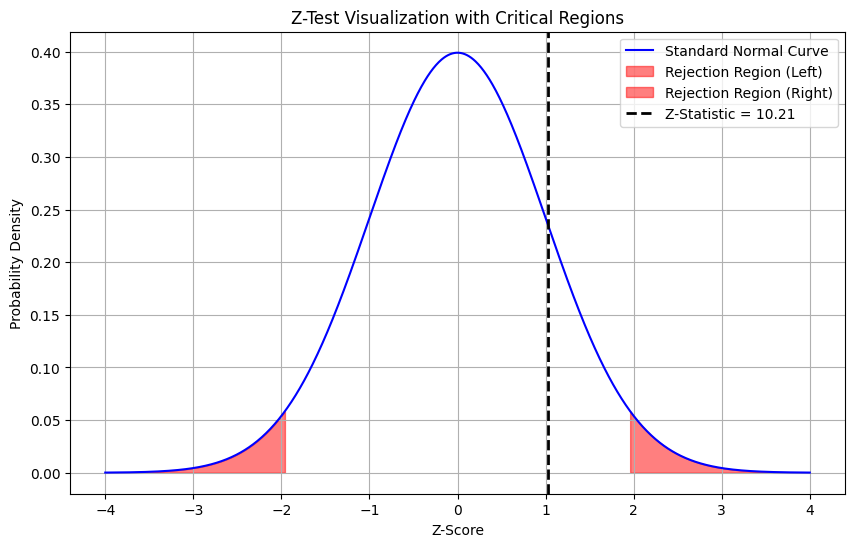

In [392]:
# Generating standard normal curve data
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Standard normal distribution (mean=0, std=1)

# Creating the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Standard Normal Curve", color="blue")

# Highlighting left and right critical regions
x_critical_left_1 = np.linspace(-4, -z_critical_1, 100)
y_critical_left_1 = norm.pdf(x_critical_left, 0, 1)
plt.fill_between(x_critical_left_1, y_critical_left_1, color="red", alpha=0.5, label="Rejection Region (Left)")

x_critical_right_1 = np.linspace(z_critical_1, 4, 100)
y_critical_right_1 = norm.pdf(x_critical_right_1, 0, 1)
plt.fill_between(x_critical_right, y_critical_right, color="red", alpha=0.5, label="Rejection Region (Right)")

# Plotting the Z-Statistic as a vertical line
plt.axvline(x=z_statistics_1, color="black", linestyle="--", linewidth=2, label=f"Z-Statistic = {z_statistics:.2f}")

# Labels and legend
plt.title("Z-Test Visualization with Critical Regions")
plt.xlabel("Z-Score")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()

# Showing the plot
plt.show()


#### **Test Results:**  
- **Z-Statistic:** 1.0315  
- **P-Value:** 0.3023  
- **Z-Critical Value (alpha = 0.05):** 1.9599  

#### **Conclusion:**  
Since the **P-value (0.3023) is greater than the significance level (0.05)**, we **fail to reject the null hypothesis (H0)**. This means there is **no statistically significant difference** in the average yellow cards received by home and away teams.  

#### **Business Insight:**  
- The results suggest that referees **do not favor home or away teams** when issuing yellow cards.  
- Discipline levels appear to be consistent between home and away teams, indicating fairness in officiating decisions.  
- Other factors, such as game intensity, referee tendencies, or competition level, might influence the number of yellow cards issued rather than home or away status.  

### **SPRINT:7 - K-NEAREST NEIGHBOR CLASSIFICATION FOR BUSINESS OBJECTIVE "ATTENDANCE AND STADIUM ANALYSIS"**

### **1. BUSINESS QUESTION:**
#### **Predict stadium attendance levels based on match attributes such as home team, away team, competition type, and previous attendance trends**

In [394]:
from sklearn import datasets, neighbors
from ipywidgets import interactive
import warnings

%matplotlib inline

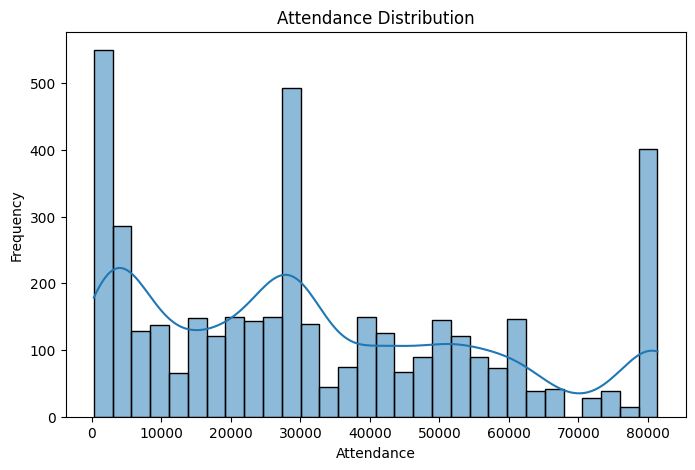

In [396]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(fb_enc["attendance"], bins=30, kde=True)
plt.title("Attendance Distribution")
plt.xlabel("Attendance")
plt.ylabel("Frequency")
plt.show()

In [398]:
def categorize_attendance(attendance):
    if attendance < 17000:
        return 0  # Low Attendance
    elif 17000 <= attendance < 41000:
        return 1  # Medium Attendance
    else:
        return 2  # High Attendance

# Apply the function to create the new attendance category
fb_enc["Attendance_class"] = fb_enc["attendance"].apply(categorize_attendance)
test_data["Attendance_class"] = test_data["attendance"].apply(categorize_attendance)


In [400]:
print(Football_data["attendance"].max())
print(Football_data["attendance"].min())

81365
300


In [402]:
Football_data.columns

Index(['Unnamed: 0', 'appearance_id', 'yellow_cards', 'red_cards', 'goals',
       'assists', 'minutes_played', 'game_event_id', 'minute', 'type_x',
       'description', 'player_in_id', 'player_assist_id', 'player_id',
       'game_lineups_id', 'type_y', 'number', 'team_captain', 'position_x',
       'game_id', 'season', 'round', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'competition_id', 'date', 'last_season', 'current_club_id',
       'player_code', 'country_of_birth', 'date_of_birth', 'sub_position',
       'position_y', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'player_name', 'home_win'],
      dtype='object')

In [404]:
Football_data["season"].unique()

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [406]:
test_data.columns

Index(['Unnamed: 0', 'game_id', 'player_id', 'yellow_cards', 'red_cards',
       'goals', 'assists', 'minutes_played', 'season', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'attendance', 'date', 'minute', 'player_in_id', 'last_season',
       'current_club_id', 'date_of_birth', 'height_in_cm',
       'market_value_in_eur', 'highest_market_value_in_eur',
       'contract_expiration_date', 'number', 'team_captain',
       'appearance_id_enc', 'competition_id_enc', 'round_enc',
       'home_club_manager_name_enc', 'away_club_manager_name_enc',
       'stadium_enc', 'referee_enc', 'home_club_name_enc',
       'away_club_name_enc', 'aggregate_enc', 'competition_type_enc',
       'game_event_id_enc', 'type_x_enc', 'name_enc', 'player_code_enc',
       'country_of_birth_enc', 'sub_position_enc', 'position_x_enc',
       'foot_enc', 'game_lineups_id_enc', 'type_y_enc', 'player_name_enc',
       'position_y_enc', 'Attendance_class'],
      dty

In [408]:
# Selecting features and target variable
df_select = fb_enc[["goals","minutes_played","Attendance_class","yellow_cards"]]
df_select

goals  minutes_played  Attendance_class  yellow_cards
0         0              70                 2             0
1         0              70                 2             0
2         0              70                 2             0
3         0              70                 2             0
4         0              70                 2             0
...     ...             ...               ...           ...
4194      1              77                 0             0
4195      1              77                 0             0
4196      1              77                 0             0
4197      1              77                 0             0
4198      1              77                 0             0

[4199 rows x 4 columns]

In [410]:
test_select = test_data[["goals","minutes_played","Attendance_class","yellow_cards"]]
test_select

goals  minutes_played  Attendance_class  yellow_cards
0      0              58                 0             0
1      0              58                 0             0

In [413]:
main_data=pd.concat([df_select,test_select],axis=0,ignore_index=True)
main_data

goals  minutes_played  Attendance_class  yellow_cards
0         0              70                 2             0
1         0              70                 2             0
2         0              70                 2             0
3         0              70                 2             0
4         0              70                 2             0
...     ...             ...               ...           ...
4196      1              77                 0             0
4197      1              77                 0             0
4198      1              77                 0             0
4199      0              58                 0             0
4200      0              58                 0             0

[4201 rows x 4 columns]

In [415]:
# Retrieving "Attendance" column from the dataset and storing in another data frame
last_2col_df = pd.DataFrame(main_data[["Attendance_class","yellow_cards"]])
last_2col_df

# Removing "Attendance_class" column from the dataset as scaling is not required for this column
new_df_2 = pd.DataFrame(main_data.drop(["Attendance_class","yellow_cards"], axis=1))
new_df_2

goals  minutes_played
0         0              70
1         0              70
2         0              70
3         0              70
4         0              70
...     ...             ...
4196      1              77
4197      1              77
4198      1              77
4199      0              58
4200      0              58

[4201 rows x 2 columns]

In [417]:
# Data Scaling
cols=new_df_2.columns
scaler=StandardScaler()
df_scaled_2=scaler.fit_transform(new_df_2)
df_scaled_2=pd.DataFrame(df_scaled_2,columns=cols)
df_scaled_2

goals  minutes_played
0    -0.717436        0.011929
1    -0.717436        0.011929
2    -0.717436        0.011929
3    -0.717436        0.011929
4    -0.717436        0.011929
...        ...             ...
4196  0.965394        0.320444
4197  0.965394        0.320444
4198  0.965394        0.320444
4199 -0.717436       -0.516954
4200 -0.717436       -0.516954

[4201 rows x 2 columns]

In [419]:
# Appending the "Attendance_class" column to the scaled DataFrame
df_scaled_2=pd.concat([df_scaled_2,last_2col_df],axis=1)
df_scaled_2.head()

goals  minutes_played  Attendance_class  yellow_cards
0 -0.717436        0.011929                 2             0
1 -0.717436        0.011929                 2             0
2 -0.717436        0.011929                 2             0
3 -0.717436        0.011929                 2             0
4 -0.717436        0.011929                 2             0

In [423]:
#Creating test and training datasets
fb_train, fb_test= train_test_split(df_scaled_2,train_size=0.8,random_state=0)
print(fb_train.shape)
print(fb_test.shape)

(3360, 4)
(841, 4)


In [425]:
df_scaled_2.columns

Index(['goals', 'minutes_played', 'Attendance_class', 'yellow_cards'], dtype='object')

In [427]:
X_train_2=fb_train.drop(columns="Attendance_class",axis=1)
y_train_2=fb_train['Attendance_class']
X_test_2=fb_test.drop(columns='Attendance_class',axis=1)
y_test_2=fb_test['Attendance_class']

In [429]:
print(X_train_2.shape,X_test_2.shape,y_train_2.shape,y_test_2.shape)

(3360, 3) (841, 3) (3360,) (841,)


### **MODEL BUILDING**

Minimum error:-0.3579 at K = 4


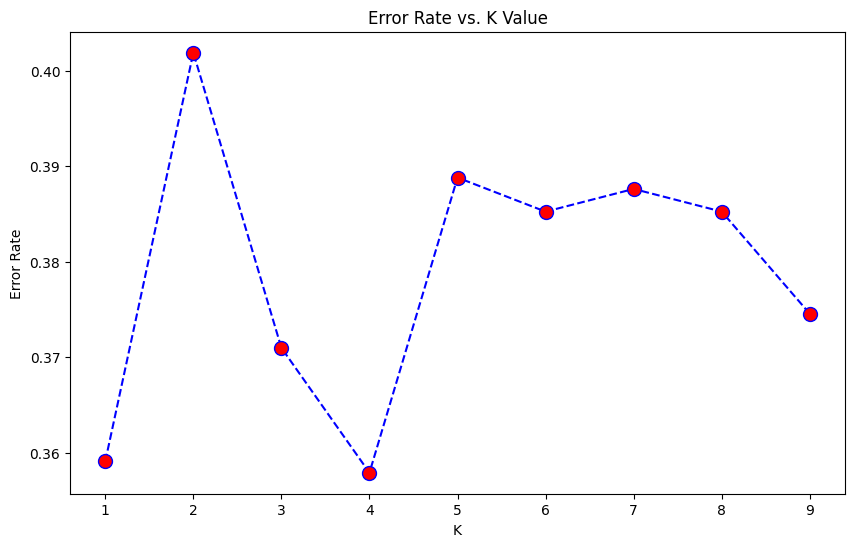

In [432]:
#MODEL BUILDING
from sklearn import neighbors
error_rate = []

# Looping through K values
for K in range(1,10):
    clf = neighbors.KNeighborsClassifier(n_neighbors=K)
    clf.fit(X_train_2, y_train_2)
    y_pred = clf.predict(X_test_2)
    error_rate.append(np.mean(y_pred != y_test_2))

# Plot Error Rate vs K
plt.figure(figsize=(10, 6))
plt.plot(range(1,10), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print(f"Minimum error:-{min(error_rate):.4f} at K =",error_rate.index(min(error_rate))+1)
plt.show()

In [283]:
"referee_enc","competition_type_enc"

('referee_enc', 'competition_type_enc')

In [434]:
Optimum_K=4
# Building the Model
# learning the classifier
clf=neighbors.KNeighborsClassifier(n_neighbors=Optimum_K)
clf.fit(X_train_2,y_train_2)

KNeighborsClassifier(n_neighbors=4)

In [436]:
# Model Properties
print("clf_classes:",clf.classes_)
print("clf_neighbors:",clf.n_neighbors)

clf_classes: [0 1 2]
clf_neighbors: 4


In [438]:
# EVALUATING MODEL PERFORMANCE

In [440]:
# Using the trained model to predict the outcome of the X_Test dataset
y_pred_2=clf.predict(X_test_2)
y_pred_2

array([0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2,
       0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 0, 1, 0, 1, 2, 0, 1, 2, 0,
       0, 1, 0, 2, 2, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 2,
       0, 1, 1, 1, 2, 2, 0, 1, 0, 2, 2, 2, 1, 1, 0, 1, 2, 0, 1, 2, 1, 0,
       1, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0,
       0, 1, 2, 2, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1,
       2, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 1,
       0, 2, 2, 1, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2,
       1, 2, 2, 0, 2, 2, 2, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 0, 2, 0, 2,
       0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 2,
       1, 1, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 1, 0, 2, 0, 1, 0,
       1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 2, 0, 1, 1, 1,

In [442]:
# Checking shapes before computing metrics
print("y_test_2 shape:", y_test_2.shape)
print("y_pred_2 shape:", y_pred_2.shape)

y_test_2 shape: (841,)
y_pred_2 shape: (841,)


In [444]:
#Computing Metrics
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

print("Accuracy Score:", accuracy_score(y_test_2, y_pred_2))
print("Recall Score:", recall_score(y_test_2, y_pred_2, average="weighted"))  # Handles class imbalance
print("F1 Score:", f1_score(y_test_2, y_pred_2, average="weighted"))  # More balanced
print("Precision Score:", precision_score(y_test_2, y_pred_2, average="weighted"))  #Better for imbalanced classes



Accuracy Score: 0.6420927467300832
Recall Score: 0.6420927467300832
F1 Score: 0.6419229627216586
Precision Score: 0.6618177525229625


In [446]:
# ROC Score
from sklearn.metrics import roc_auc_score

# Predicting probabilities for the positive class
#y_pred_prob = clf.predict_proba(X_test_2)[:, 1]

# Computing ROC AUC Score for binary classification
#roc_knn = roc_auc_score(y_test_2, y_pred_prob, multi_class="ovr")

# Computing ROC AUC Score for multi-class classification
roc_knn = roc_auc_score(y_test_2, clf.predict_proba(X_test_2), multi_class="ovr")  # or multi_class="ovo"

print("ROC AUC Score:", roc_knn)

ROC AUC Score: 0.8258101658044682


KNN Model Performance for Stadium Attendance Prediction

Model Evaluation Metrics:
Accuracy Score: 0.6421
Recall Score: 0.6421
F1 Score: 0.6419
Precision Score: 0.6618
ROC AUC Score: 0.8258

Interpretation:
The model achieves a moderate accuracy (64.2%), indicating that it classifies stadium attendance levels reasonably well.
A recall of 64.2% suggests that the model identifies a fair proportion of true positive cases.
The F1-score of 64.2% shows a balance between precision and recall, indicating overall stability in classification performance.
Precision (66.2%) suggests that when the model predicts a certain attendance class, it is correct 66.2% of the time.
ROC AUC Score (82.6%) is relatively high, indicating strong separability between different attendance classes.

Conclusion

The KNN model provides a moderate level of accuracy in predicting stadium attendance based on match attributes. While the model demonstrates a strong ability to differentiate attendance classes (as indicated by the ROC AUC score), further refinement is necessary to enhance precision and recall. Feature engineering, hyperparameter tuning, and exploring alternative classification models could lead to improved predictive performance. Addressing class imbalances and incorporating additional relevant factors may further strengthen the model’s effectiveness in forecasting stadium attendance levels.

In [448]:
df_scaled_2

goals  minutes_played  Attendance_class  yellow_cards
0    -0.717436        0.011929                 2             0
1    -0.717436        0.011929                 2             0
2    -0.717436        0.011929                 2             0
3    -0.717436        0.011929                 2             0
4    -0.717436        0.011929                 2             0
...        ...             ...               ...           ...
4196  0.965394        0.320444                 0             0
4197  0.965394        0.320444                 0             0
4198  0.965394        0.320444                 0             0
4199 -0.717436       -0.516954                 0             0
4200 -0.717436       -0.516954                 0             0

[4201 rows x 4 columns]

In [450]:
# Get the number of rows in df_scaled_2
total_rows = df_scaled_2.shape[0]

# Extract the last 2 rows as test data
testing_data = df_scaled_2.iloc[-2:]

# Extract the remaining rows as train data
training_data = df_scaled_2.iloc[:-2]

# Display shapes to confirm
print("Train Data Shape:", training_data.shape)
print("Test Data Shape:", testing_data.shape)


Train Data Shape: (4199, 4)
Test Data Shape: (2, 4)


In [452]:
# Selecting features (X) and target variable (y)
X_train_3 = training_data.drop(columns=["Attendance_class"])  
y_train_3 = training_data["Attendance_class"]

X_test_3 = testing_data.drop(columns=["Attendance_class"])  
y_test_3 = testing_data["Attendance_class"]


In [454]:
training_data
testing_data

goals  minutes_played  Attendance_class  yellow_cards
4199 -0.717436       -0.516954                 0             0
4200 -0.717436       -0.516954                 0             0

In [456]:
print("X_train_3 shape:", X_train_3.shape)
print("y_train_3 shape:", y_train_3.shape)
print("X_test_3 shape:", X_test_3.shape)
print("y_test_3 shape:", y_test_3.shape)


X_train_3 shape: (4199, 3)
y_train_3 shape: (4199,)
X_test_3 shape: (2, 3)
y_test_3 shape: (2,)


Minimum error:-0.0000 at K = 12


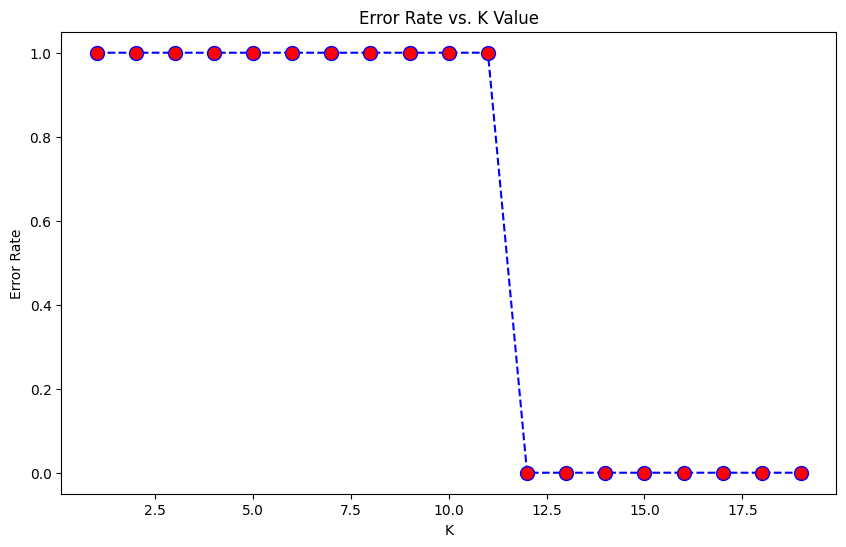

In [458]:
#MODEL BUILDING
from sklearn import neighbors
error_rate = []

# Looping through K values
for K in range(1,20):
    clf = neighbors.KNeighborsClassifier(n_neighbors=K)
    clf.fit(X_train_3, y_train_3)
    y_pred = clf.predict(X_test_3)
    error_rate.append(np.mean(y_pred != y_test_3))

# Plot Error Rate vs K
plt.figure(figsize=(10, 6))
plt.plot(range(1,20), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print(f"Minimum error:-{min(error_rate):.4f} at K =",error_rate.index(min(error_rate))+1)
plt.show()

In [460]:
from sklearn.neighbors import KNeighborsClassifier  #  Import the classifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

# Build the model with K=12
Optimum_K = 12
clf = KNeighborsClassifier(n_neighbors=Optimum_K)

# Train the model
clf.fit(X_train_3, y_train_3)

# Make predictions
y_pred_3 = clf.predict(X_test_3)

# Compute performance metrics
print("Accuracy Score:", accuracy_score(y_test_3, y_pred_3))
print("Recall Score:", recall_score(y_test_3, y_pred_3, average="weighted"))  # Handles class imbalance
print("F1 Score:", f1_score(y_test_3, y_pred_3, average="weighted"))  # More balanced
print("Precision Score:", precision_score(y_test_3, y_pred_3, average="weighted"))  # Better for imbalanced classes


Accuracy Score: 1.0
Recall Score: 1.0
F1 Score: 1.0
Precision Score: 1.0


### **SPRINT:8 -  Referee Analysis, Substitution Patterns, and Event Analysis**

#### **Referee Analysis**

In [462]:
# 1. Referee Analysis - Referee with most yellow/red cards
# Q1: Which referee gives the most yellow and red cards? 
referee_cards = Football_data.groupby('referee')[['yellow_cards']].sum()
top_referees = referee_cards.sort_values(by='yellow_cards', ascending=False).head(10)
top_referees

yellow_cards
referee                      
Felix Zwayer               54
Tobias Stieler             53
Mikkel Redder              49
Guido Winkmann             45
Manuel Graofe              30
Daniel Siebert             28
Dr. Felix Brych            26
Patrick Ittrich            25
Robert Hartmann            25
Daniel Schlager            25

In [464]:
# Bar plot for top 10 referees who gave the most yellow cards
plt.figure(figsize=(10, 6))
top_referees['yellow_cards'].plot(kind='bar', color='orange')

# Adding labels and title
plt.xlabel('Total Yellow Cards')
plt.ylabel('Referee')
plt.title('Top 10 Referees with Most Yellow Cards')
plt.show()


In [302]:
Football_data["referee"].unique()

array(['Felix Zwayer', 'Daniel Siebert', 'Michael Weiner',
       'Christian Dingert', 'Manuel Graofe', 'Dr. Jochen Drees',
       'Tobias Welz', 'Tobias Stieler', 'Norbert Grudzinski',
       'Guido Winkmann', 'Marco Fritz', 'Knut Kircher', 'Dr. Felix Brych',
       'Thorsten Kinhh Ffer', 'Robert Hartmann', 'Markus Schmidt',
       'Bart Vertenten', 'Johan Verbist', 'Peter Sippel',
       'Joeri van de Velde', 'Laurent Colemonts', 'Christof Dierick',
       'Serge Gumienny', 'Erik Lambrechts', 'Luc Wouters', 'Ruddy Buquet',
       'Sascha Stegemann', 'Bastian Dankert', 'Fredy Fautrel',
       'Bartolomeu Varela', 'Amaury Delerue', 'Daniele Orsato',
       'Wim Smet', 'Sergey Karasev', 'Martin Strambergsson',
       'Said Ennjimi', 'Johan Hamel', 'Danny Makkelie',
       'Richard Liesveld', 'Bobby Madley', 'Jonathan Lardot',
       'Dr. Robert Kampka', 'Lee Mason', 'Nicolas Laforge', 'Mike Jones',
       'Benjamin Brand', 'Istvan Vad', 'Frederik Geldhof',
       'Vladislav Bezborodov',

In [466]:
# Q2:  Is there a correlation between referee strictness (yellow/red cards) and match attendance?
# Correlation between referee strictness and attendance
correlation = fb_enc[['yellow_cards', 'attendance']].corr()
correlation

yellow_cards  attendance
yellow_cards      1.000000    0.016017
attendance        0.016017    1.000000

In [468]:
# Q3: Referee wise goals and assists
referee_task = Football_data.groupby('referee')[['goals','assists']].sum()
referee_task = referee_task.sort_values(by='goals', ascending=False).head(10)
referee_task

goals  assists
referee                          
Michael Oliver       126        0
Felix Zwayer          90       26
Peter Kjaersgaard     78       44
Jeremy Stinat         72       36
Anthony Taylor        68        0
Dr. Felix Brych       68       24
Joey Kooij            60        0
Mikkel Redder         55        0
Daniel Siebert        55        0
Marco Fritz           55       28

In [470]:
# Plot
referee_task = Football_data.groupby('referee')[['goals', 'assists']].sum()
top_referees = referee_task.sort_values(by='assists', ascending=False).head(10)
top_referees.plot(kind='bar', figsize=(10, 5))
plt.title("Top 10 Referees by Goals and Assists")
plt.ylabel("Count")
plt.xlabel("Referee")
plt.xticks(rotation=45)
plt.legend(["Goals", "Assists"])
plt.show()

In [472]:
# Q4: Referee wise number of competitions 
referee_comp = Football_data.groupby('referee')[['competition_id']].count()
referee_comp = referee_comp.sort_values(by='competition_id', ascending=False).head(10)
referee_comp

competition_id
referee                          
Felix Zwayer                  226
Manuel Graofe                 160
Daniel Siebert                152
Peter Kjaersgaard             152
Dr. Felix Brych               140
Marco Fritz                   128
Tobias Stieler                120
Guido Winkmann                110
Deniz Aytekin                  93
Sascha Stegemann               91

In [474]:
# Q5: Referee wise home_club_wins
referee_home = Football_data.groupby('referee')[['home_win']].count()
referee_home = referee_home.sort_values(by='home_win', ascending=False).head(10)
referee_home

home_win
referee                    
Felix Zwayer            226
Manuel Graofe           160
Daniel Siebert          152
Peter Kjaersgaard       152
Dr. Felix Brych         140
Marco Fritz             128
Tobias Stieler          120
Guido Winkmann          110
Deniz Aytekin            93
Sascha Stegemann         91

#### **Event Analysis**

In [478]:
# Event Analysis
# Q1: Count of event types
event_counts=Football_data["type_x"].value_counts()
event_counts

type_x
Substitutions    2764
Goals            1330
Cards             105
Name: count, dtype: int64

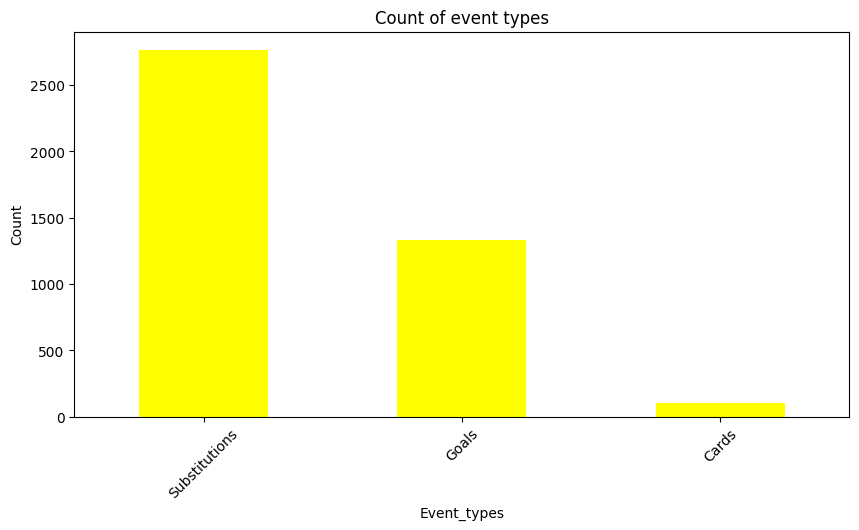

In [480]:
event_counts.plot(kind='bar', figsize=(10, 5),color="yellow")
plt.title("Count of event types")
plt.ylabel("Count")
plt.xlabel("Event_types")
plt.xticks(rotation=45)
plt.show()

In [311]:
# Q2: Game_event_id wise types of occurences (goals, cards, substitutions)
event_types = Football_data.groupby(by="game_event_id")[['type_y']].count()
top_types = event_types.sort_values(by=['type_y'], ascending=False).head(10)
top_types

type_y
game_event_id                           
237567d50f0a3d2c545dc4776a8321f6      28
5c23d5038a88974f07db04d0a05f71b6      28
2153c26afbc5394341c033f1c332a50c      26
d4a44aabc4a2590581f2c43e860b5033      26
356b03a5b9b73a290fe27091d6856c93      25
cf9bc9bfbcdf00849e163b28818a13cf      25
253dede58da43101ed2ea53d3e164a6d      20
02ffedb096eda223e8fab74da9336bd2      20
84fb44a2ae9da0808ca882503e08ce6b      19
7cbd6ce1f93f60561fdda2a0a8b85339      19

In [482]:
# Q3: Top 10 Competition with highest number of game_events
game_events = Football_data.groupby(by="competition_type")[['game_event_id']].count()
game_events = game_events.sort_values(by=['game_event_id'], ascending=False).head(10)
game_events

game_event_id
competition_type                
domestic_league             3481
domestic_cup                 393
international_cup            273
other                         52

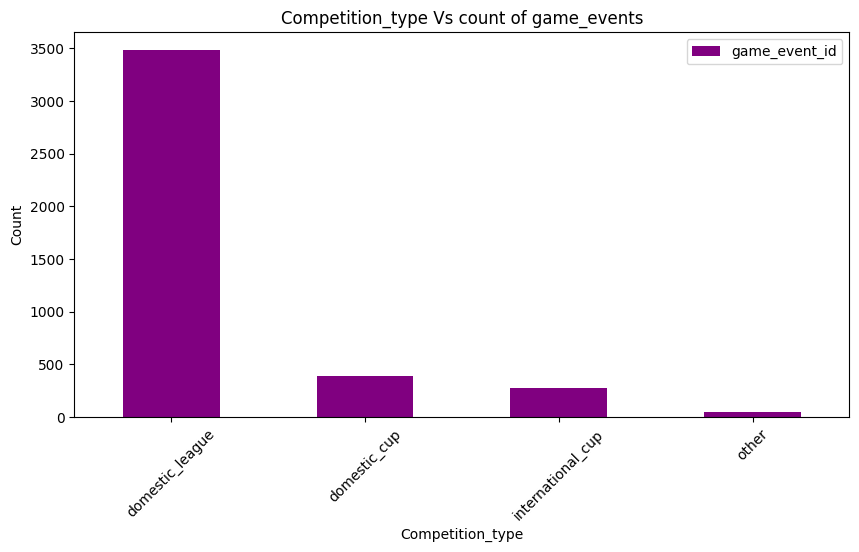

In [486]:
#plot
game_events.plot(kind='bar', figsize=(10, 5),color="purple")
plt.title("Competition_type Vs count of game_events")
plt.ylabel("Count")
plt.xlabel("Competition_type")
plt.xticks(rotation=45)
plt.show()

#### **Substitution patterns**

In [488]:
# Q1: Which is the most frequent type of action(substitutions/goals/cards) during home_win
home_sub=Football_data.groupby(by="home_win")[["type_y"]].max()
home_sub=home_sub.sort_values(by=["home_win"],ascending=False)
home_sub

type_y
home_win             
True      substitutes
False     substitutes

In [490]:
# Q2: Did yellow cards result in substitutions?
yellow_sub=Football_data.groupby(by="type_x")[["yellow_cards"]].count()
yellow_sub=yellow_sub.sort_values(by=["yellow_cards"],ascending=False)
yellow_sub

yellow_cards
type_x                     
Substitutions          2764
Goals                  1330
Cards                   105

In [498]:
# Q3: Did attendance affect the substitution patterns?
def attendance_category(attendance):
    if attendance < 10000:
        return "low_attendance"
    elif attendance < 50000:
        return "moderate_attendance"
    else:
        return "high_attendance"

# Applying function to the dataset
Football_data["attendance_category"] = Football_data["attendance"].apply(attendance_category)

# Displaying the first few rows
Football_data[["attendance", "attendance_category"]].head()


attendance  attendance_category
0       45033  moderate_attendance
1       45033  moderate_attendance
2       45033  moderate_attendance
3       45033  moderate_attendance
4       45033  moderate_attendance

In [500]:
attendance_sub=Football_data.groupby(by="attendance_category")[["type_y"]].value_counts()
#attendance_sub=attendance_sub.sort_values(by=["type"],ascending=False)
attendance_sub

attendance_category  type_y         
high_attendance      starting_lineup     851
                     substitutes         272
low_attendance       substitutes         768
                     starting_lineup     278
moderate_attendance  starting_lineup    1340
                     substitutes         690
Name: count, dtype: int64

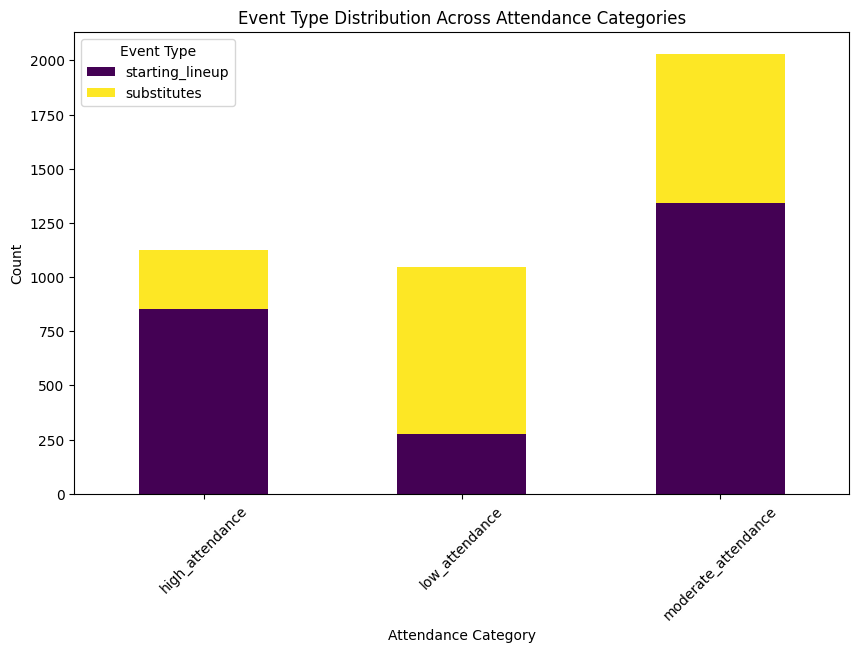

In [502]:
#Plot
# Grouping by attendance category and type, then count occurrences
attendance_sub = Football_data.groupby("attendance_category")["type_y"].value_counts().unstack()

# Plotting the stacked bar chart
attendance_sub.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")

# Labels and title
plt.title("Event Type Distribution Across Attendance Categories")
plt.xlabel("Attendance Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Event Type")

# Show plot
plt.show()

In [320]:
Football_data.columns

Index(['Unnamed: 0', 'appearance_id', 'yellow_cards', 'red_cards', 'goals',
       'assists', 'minutes_played', 'game_event_id', 'minute', 'type_x',
       'description', 'player_in_id', 'player_assist_id', 'player_id',
       'game_lineups_id', 'type_y', 'number', 'team_captain', 'position_x',
       'game_id', 'season', 'round', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'competition_id', 'date', 'last_season', 'current_club_id',
       'player_code', 'country_of_birth', 'date_of_birth', 'sub_position',
       'position_y', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'player_name', 'home_win', 'attendance_category'],
      dtype='object')

In [321]:
Football_data["type_y"].unique()

array(['substitutes', 'starting_lineup'], dtype=object)

In [322]:
#identify the matches(game_event_id) with the substitution
#create a new column indicating whether a match had a substitution or not
#calculate average goals for matches with and without substitution
#calculate average goals conceded for matches with and without substitution
#create 2 columns has_sub and doesn't_have_sub


In [323]:
matches_with_sub=Football_data[Football_data["type_y"]=="substitution"]["game_id"].unique()
matches_with_sub

array([], dtype=int64)

In [324]:
Football_data["has_sub"]=Football_data["game_id"].isin(matches_with_sub)
Football_data["has_sub"]

0       False
1       False
2       False
3       False
4       False
        ...  
4194    False
4195    False
4196    False
4197    False
4198    False
Name: has_sub, Length: 4199, dtype: bool

In [325]:
Football_data["has_sub"].unique()

array([False])

In [326]:
avg_goals_with_sub=Football_data[Football_data["has_sub"]]["home_club_goals"].mean()
avg_goals_with_sub

nan

In [327]:
Football_data.columns

Index(['Unnamed: 0', 'appearance_id', 'yellow_cards', 'red_cards', 'goals',
       'assists', 'minutes_played', 'game_event_id', 'minute', 'type_x',
       'description', 'player_in_id', 'player_assist_id', 'player_id',
       'game_lineups_id', 'type_y', 'number', 'team_captain', 'position_x',
       'game_id', 'season', 'round', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'competition_id', 'date', 'last_season', 'current_club_id',
       'player_code', 'country_of_birth', 'date_of_birth', 'sub_position',
       'position_y', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'player_name', 'home_win', 'attendance_category', 'has_sub'],
      dtype='object')

In [328]:
avg_goals_with_sub_1=Football_data[Football_data["has_sub"]]["away_club_goals"].mean()
avg_goals_with_sub_1

nan

In [329]:
Football_data[["position_x"]]

position_x
0         Right-Back
1         Right-Back
2         Right-Back
3         Right-Back
4         Right-Back
...              ...
4194  Centre-Forward
4195  Centre-Forward
4196  Centre-Forward
4197  Centre-Forward
4198  Centre-Forward

[4199 rows x 1 columns]

### **SPRINT:9 - EVENT ANALYSIS BUSINESS QUESTIONS' HYPOTHESIS TESTING**

In [504]:
Football_data[["minute"]].min()

minute    3
dtype: int64

In [506]:
Football_data[["minute"]].mean()

minute    62.821386
dtype: float64

#### **Are goals(events) more likely to be scored in the second half compared to the first half?**

## Why Use t-Test Here?
We do not know the population variance of goals scored in the first and second halves.
Even if our sample size is large, we still use a t-test because of this unknown variance.
So, it's completely valid to use a two-sample t-test to compare the means of goals in the first and second halves.

In [509]:
from scipy.stats import t
# First-half data
first_half_events = Football_data[Football_data['minute'] <= 62]['goals']
first_half_events

24      0
25      0
26      0
27      0
28      0
       ..
4186    1
4187    1
4188    1
4189    1
4190    1
Name: goals, Length: 1816, dtype: int64

In [511]:
second_half_events = Football_data[Football_data['minute'] > 62]['goals']
second_half_events

0       0
1       0
2       0
3       0
4       0
       ..
4194    1
4195    1
4196    1
4197    1
4198    1
Name: goals, Length: 2383, dtype: int64

In [513]:
# Removing NaN values
first_half_events = first_half_events.dropna()
second_half_events = second_half_events.dropna()

In [515]:
# Sample sizes
n1 = len(first_half_events)
n2 = len(second_half_events)
print("size of sample 1:", n1)
print("size of sample 2:", n2)

size of sample 1: 1816
size of sample 2: 2383


In [517]:
import statistics as st

x1=st.mean(first_half_events)
x2=st.mean(second_half_events)
v1=(st.stdev(first_half_events))**2
v2=(st.stdev(second_half_events))**2
n1=len(first_half_events)
n2=len(second_half_events)
dof= n1+n2-2

print("Sample mean of first_half_events =",x1)
print("Sample mean of second_half_events =",x2)
print("Sample variance of first_half_events =",v1)
print("Sample variance of second_half_events =",v2)
print("Sample size of first_half_events =",n1)
print("Sample size of second_half_events =",n2)
print('Degrees of freedom =',dof)

Sample mean of first_half_events = 0.5693832599118943
Sample mean of second_half_events = 0.31766680654637014
Sample variance of first_half_events = 0.47011444035873345
Sample variance of second_half_events = 0.2369967369623836
Sample size of first_half_events = 1816
Sample size of second_half_events = 2383
Degrees of freedom = 4197


In [519]:
Football_data["type_y"].unique()

array(['substitutes', 'starting_lineup'], dtype=object)

In [521]:
alpha=0.05
from scipy.stats import t

# Computing noise (pooled standard error)
noise = math.sqrt((v1 * (n1 - 1) + v2 * (n2 - 1)) / dof) * math.sqrt(1/n1 + 1/n2)

# Computing signal (absolute mean difference)
signal = abs(x1 - x2)

# Computing t-statistic
t_statistic = signal / noise
print('t-statistic =', t_statistic)

# Computing p-value (two-tailed test)
p_value = t.sf(abs(t_statistic), dof) * 2
print("The p_value is ", p_value)

# Computing critical t-value (two-tailed test)
t_critical = t.ppf(1 - alpha / 2, dof)
print('t-critical =', t_critical)

# Decision rule
if p_value < alpha:
    print("Reject H0: Goals scored in first and second halves are significantly different.")
else:
    print("Fail to Reject H0: No significant difference in goals scored.")



t-statistic = 13.90346566701819
The p_value is  5.350385839485864e-43
t-critical = 1.9605293750283208
Reject H0: Goals scored in first and second halves are significantly different.


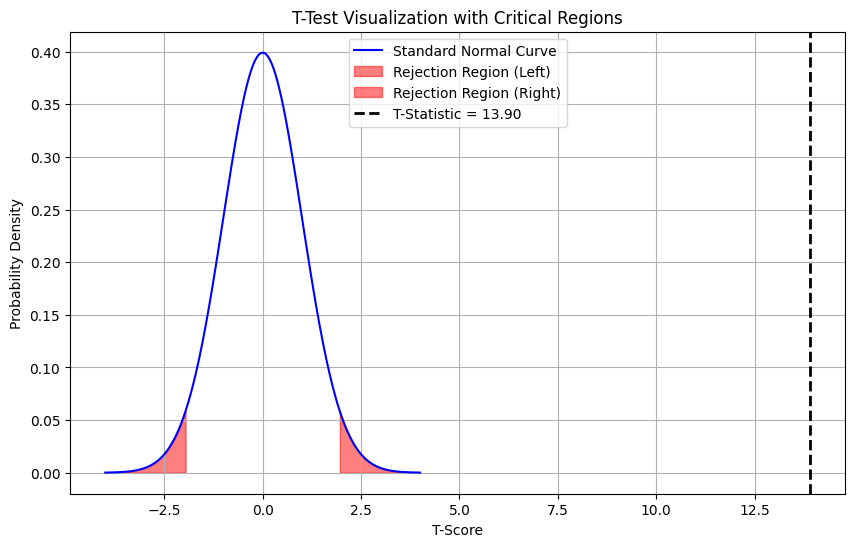

In [523]:
from scipy import stats
# Visualization
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)  # Standard normal distribution

plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Standard Normal Curve", color="blue")

# Highlighting rejection regions
x_critical_left = np.linspace(-4, -t_critical, 100)
y_critical_left = stats.norm.pdf(x_critical_left, 0, 1)
plt.fill_between(x_critical_left, y_critical_left, color="red", alpha=0.5, label="Rejection Region (Left)")

x_critical_right = np.linspace(t_critical, 4, 100)
y_critical_right = stats.norm.pdf(x_critical_right, 0, 1)
plt.fill_between(x_critical_right, y_critical_right, color="red", alpha=0.5, label="Rejection Region (Right)")

# Plotting the t-statistic
plt.axvline(x=t_statistic, color="black", linestyle="--", linewidth=2, label=f"T-Statistic = {t_statistic:.2f}")

# Labels and legend
plt.title("T-Test Visualization with Critical Regions")
plt.xlabel("T-Score")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()

# Showing the plot
plt.show()

Hypothesis Testing: Goal Scoring in First vs. Second Half
Hypothesis Statement:
H₀ (Null Hypothesis): There is no significant difference in the number of goals scored between the first and second halves.
H₁ (Alternative Hypothesis): Goals are more likely to be scored in the second half compared to the first half.
Statistical Test Results:
t-statistic: 13.9035
p-value: 5.35e-43
t-critical: 1.9605

Conclusion:
Since the t-statistic (13.9035) is significantly higher than the t-critical value (1.9605) and the p-value is extremely small (5.35e-43), we reject the null hypothesis (H₀).

This indicates a statistically significant difference in goals scored between the first and second halves.
The results strongly suggest that goals are more likely to be scored in the second half of the match compared to the first half.

### **Are taller players more likely to commit fouls leading to yellow cards?**

In [525]:
yellow_df = Football_data[['height_in_cm', 'yellow_cards']]
yellow_df

height_in_cm  yellow_cards
0              186             0
1              186             0
2              186             0
3              186             0
4              186             0
...            ...           ...
4194           176             0
4195           176             0
4196           176             0
4197           176             0
4198           176             0

[4199 rows x 2 columns]

In [527]:
median_height = Football_data['height_in_cm'].median()
median_height

178.0

In [529]:
# short_players data
short_players = Football_data[Football_data['height_in_cm'] <= median_height]['yellow_cards']
short_players

249     0
250     0
251     1
252     1
253     1
       ..
4194    0
4195    0
4196    0
4197    0
4198    0
Name: yellow_cards, Length: 2328, dtype: int64

In [531]:
# tall_players data
tall_players = Football_data[Football_data['height_in_cm'] > median_height]['yellow_cards']
tall_players

0       0
1       0
2       0
3       0
4       0
       ..
4144    0
4145    0
4146    0
4147    0
4182    0
Name: yellow_cards, Length: 1871, dtype: int64

In [533]:
# Removing NaN values
short_players = short_players.dropna()
tall_players = tall_players.dropna()

In [535]:
# Sample sizes
n_1 = len(short_players)
n_2 = len(tall_players)
print("size of sample 1:", n_1)
print("size of sample 2:", n_2)

size of sample 1: 2328
size of sample 2: 1871


In [537]:
import statistics as st

x_1=st.mean(short_players)
x_2=st.mean(tall_players)
v_1=(st.stdev(short_players))**2
v_2=(st.stdev(tall_players))**2
n_1=len(short_players)
n_2=len(tall_players)
ddof= n_1+n_2-2

print("Sample mean of short_players =",x_1)
print("Sample mean of tall_players =",x_2)
print("Sample variance of short_players =",v_1)
print("Sample variance of tall_players =",v_2)
print("Sample size of short_players =",n_1)
print("Sample size of tall_players =",n_2)
print('Degrees of freedom =',ddof)

Sample mean of short_players = 0.09836769759450172
Sample mean of tall_players = 0.23677177979690006
Sample variance of short_players = 0.08872960775713755
Sample variance of tall_players = 0.1808075409358146
Sample size of short_players = 2328
Sample size of tall_players = 1871
Degrees of freedom = 4197


In [539]:
alpha=0.05
from scipy.stats import t

# Computing noise (pooled standard error)
noise = math.sqrt((v_1 * (n_1 - 1) + v_2 * (n_2 - 1)) / ddof) * math.sqrt(1/n_1 + 1/n_2)

# Computing signal (absolute mean difference)
signal = abs(x_1 - x_2)

# Computing t-statistic
t_statistic = signal / noise
print('t-statistic =', t_statistic)

# Computing p-value (two-tailed test)
p_value = t.sf(abs(t_statistic), ddof) * 2
print("The p_value is ", p_value)

# Computing critical t-value (two-tailed test)
t_critical = t.ppf(1 - alpha / 2, ddof)
print('t-critical =', t_critical)

# Decision rule
if p_value < alpha:
    print("Reject the null hypothesis: Taller players commit significantly more/less fouls leading to yellow cards.")
else:
    print("Fail to reject the null hypothesis: No significant difference between short and tall players in committing fouls.")



t-statistic = 12.37489236979445
The p_value is  1.422926325759339e-34
t-critical = 1.9605293750283208
Reject the null hypothesis: Taller players commit significantly more/less fouls leading to yellow cards.


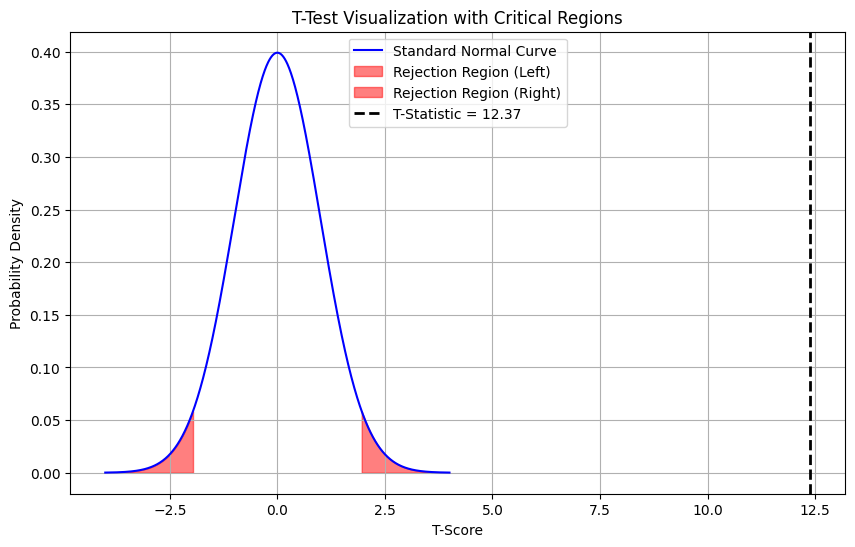

In [541]:
from scipy import stats
# Visualization
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)  # Standard normal distribution

plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Standard Normal Curve", color="blue")

# Highlighting rejection regions
x_critical_left = np.linspace(-4, -t_critical, 100)
y_critical_left = stats.norm.pdf(x_critical_left, 0, 1)
plt.fill_between(x_critical_left, y_critical_left, color="red", alpha=0.5, label="Rejection Region (Left)")

x_critical_right = np.linspace(t_critical, 4, 100)
y_critical_right = stats.norm.pdf(x_critical_right, 0, 1)
plt.fill_between(x_critical_right, y_critical_right, color="red", alpha=0.5, label="Rejection Region (Right)")

# Plotting the t-statistic
plt.axvline(x=t_statistic, color="black", linestyle="--", linewidth=2, label=f"T-Statistic = {t_statistic:.2f}")

# Labels and legend
plt.title("T-Test Visualization with Critical Regions")
plt.xlabel("T-Score")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()

# Showing the plot
plt.show()

### **SPRINT:10 - K-Means Clustering on Football Player Attributes and Match Events**

In [555]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
%matplotlib inline

In [619]:
selected_features = [ 'goals', 'assists', 'yellow_cards', 
    'sub_position_enc', 'position_x_enc', 'position_y_enc', 'foot_enc',  
    'type_x_enc', 'type_y_enc']

In [621]:
# Selecting relevant features for clustering
df_select=fb_enc[selected_features]
df_select

goals  assists  yellow_cards  sub_position_enc  position_x_enc  \
0         0        0             0                 8               9   
1         0        0             0                 8               9   
2         0        0             0                 8               9   
3         0        0             0                 8               9   
4         0        0             0                 8               9   
...     ...      ...           ...               ...             ...   
4194      1        0             0                 3               3   
4195      1        0             0                 3               3   
4196      1        0             0                 3               3   
4197      1        0             0                 3               3   
4198      1        0             0                 3               3   

      position_y_enc  foot_enc  type_x_enc  type_y_enc  
0                  1         2           2           1  
1                  1         2           2           1  
2                  1         2           2           1  
3                  1         2           2           1  
4                  1         2           2           1  
...              ...       ...         ...         ...  
4194               0         2           2           1  
4195               0         2           2           1  
4196               0         2           2           1  
4197               0         2           2           1  
4198               0         2           2           1  

[4199 rows x 9 columns]

In [675]:
# Data Scaling
cols=df_select.columns
scaler=StandardScaler()
df_scaled1=scaler.fit_transform(df_select)
df_scaled1=pd.DataFrame(df_scaled1,columns=cols)
df_scaled1

goals   assists  yellow_cards  sub_position_enc  position_x_enc  \
0    -0.717695 -0.362473     -0.436498          1.154514        1.152828   
1    -0.717695 -0.362473     -0.436498          1.154514        1.152828   
2    -0.717695 -0.362473     -0.436498          1.154514        1.152828   
3    -0.717695 -0.362473     -0.436498          1.154514        1.152828   
4    -0.717695 -0.362473     -0.436498          1.154514        1.152828   
...        ...       ...           ...               ...             ...   
4194  0.964941 -0.362473     -0.436498         -0.795214       -0.966424   
4195  0.964941 -0.362473     -0.436498         -0.795214       -0.966424   
4196  0.964941 -0.362473     -0.436498         -0.795214       -0.966424   
4197  0.964941 -0.362473     -0.436498         -0.795214       -0.966424   
4198  0.964941 -0.362473     -0.436498         -0.795214       -0.966424   

      position_y_enc  foot_enc  type_x_enc  type_y_enc  
0           0.586063  0.450913    0.690323    1.194641  
1           0.586063  0.450913    0.690323    1.194641  
2           0.586063  0.450913    0.690323    1.194641  
3           0.586063  0.450913    0.690323    1.194641  
4           0.586063  0.450913    0.690323    1.194641  
...              ...       ...         ...         ...  
4194       -0.732029  0.450913    0.690323    1.194641  
4195       -0.732029  0.450913    0.690323    1.194641  
4196       -0.732029  0.450913    0.690323    1.194641  
4197       -0.732029  0.450913    0.690323    1.194641  
4198       -0.732029  0.450913    0.690323    1.194641  

[4199 rows x 9 columns]

In [677]:
df_scaled1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   goals             4199 non-null   float64
 1   assists           4199 non-null   float64
 2   yellow_cards      4199 non-null   float64
 3   sub_position_enc  4199 non-null   float64
 4   position_x_enc    4199 non-null   float64
 5   position_y_enc    4199 non-null   float64
 6   foot_enc          4199 non-null   float64
 7   type_x_enc        4199 non-null   float64
 8   type_y_enc        4199 non-null   float64
dtypes: float64(9)
memory usage: 295.4 KB


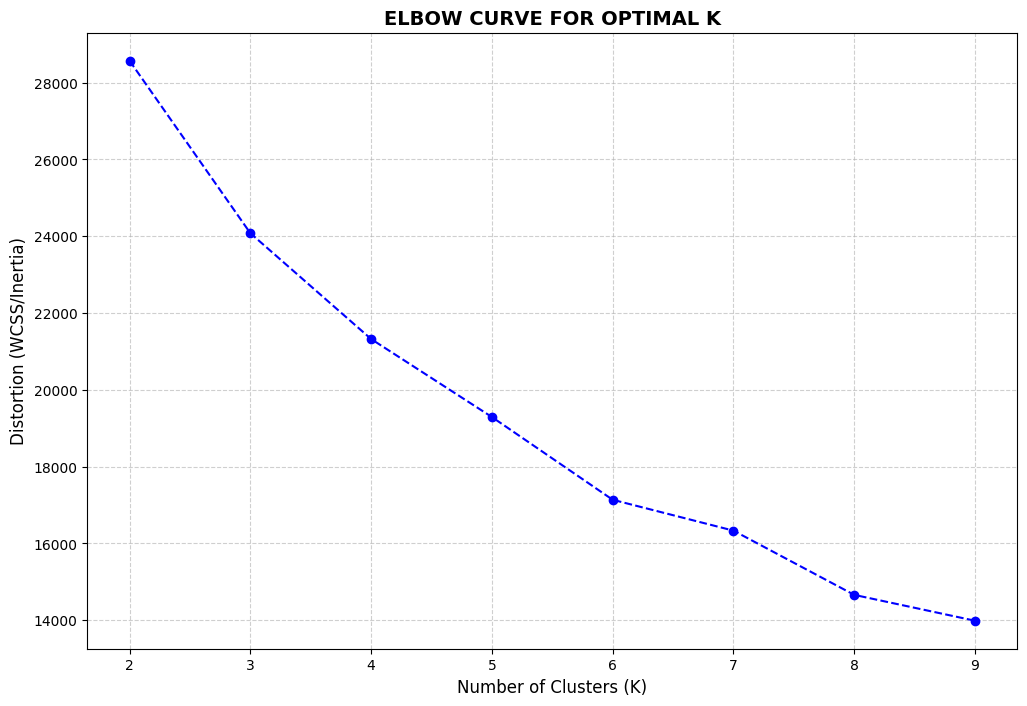

In [679]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Initialize list to store WCSS (Within-Cluster Sum of Squares)
Distortion = []

# Loop through K values from 2 to 10
for K in range(2, 10):
    KMeans_model = KMeans(n_clusters=K, random_state=42, n_init=10)  # Ensuring reproducibility
    KMeans_model.fit(df_scaled1)
    Distortion.append(KMeans_model.inertia_)  # Inertia (WCSS)

# Plot Elbow Curve
plt.figure(figsize=(12, 8))
plt.plot(range(2, 10), Distortion, marker="o", linestyle="--", color="b")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xlabel("Number of Clusters (K)", fontsize=12)
plt.ylabel("Distortion (WCSS/Inertia)", fontsize=12)
plt.title("ELBOW CURVE FOR OPTIMAL K", fontsize=14, fontweight="bold")
plt.xticks(range(2, 10))  # Ensuring correct x-tick values
plt.show()


In [680]:
from kneed import KneeLocator
knee = KneeLocator(range(2,10), Distortion, curve="convex", direction="decreasing")
print(f"Optimal K: {knee.elbow}")


Optimal K: 6


In [683]:
#Finding the optimum value of K and cluster efficiency using silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


Silhouette Scores for Different Cluster Sizes:

For n_clusters = 2, Average silhouette_score = 0.2946
For n_clusters = 3, Average silhouette_score = 0.2590
For n_clusters = 4, Average silhouette_score = 0.2600
For n_clusters = 5, Average silhouette_score = 0.3030
For n_clusters = 6, Average silhouette_score = 0.3117
For n_clusters = 7, Average silhouette_score = 0.3172
For n_clusters = 8, Average silhouette_score = 0.2971
For n_clusters = 9, Average silhouette_score = 0.3174
For n_clusters = 10, Average silhouette_score = 0.3361


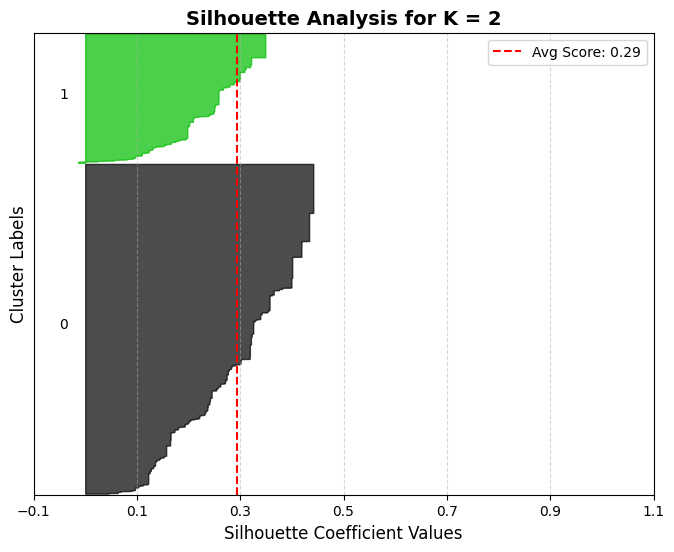

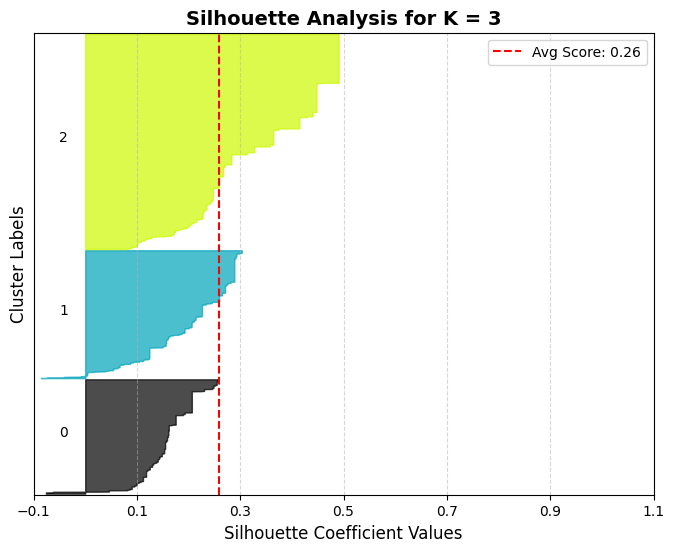

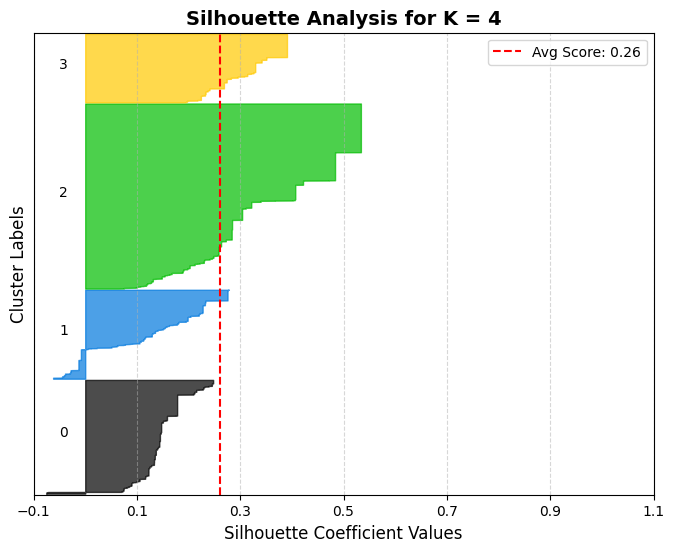

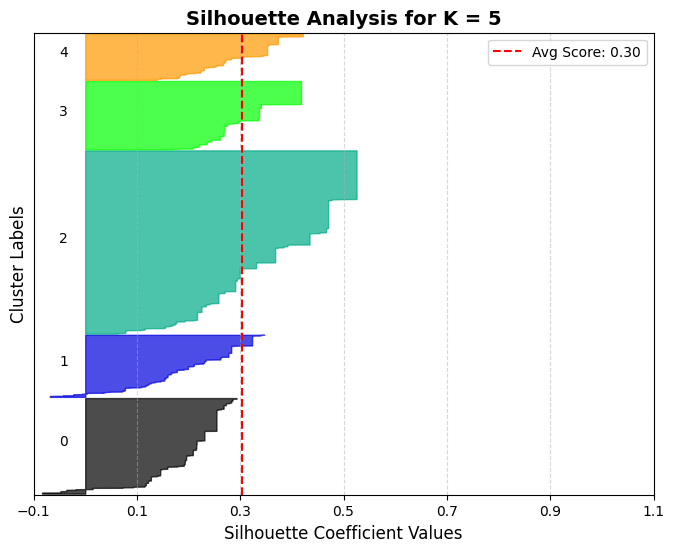

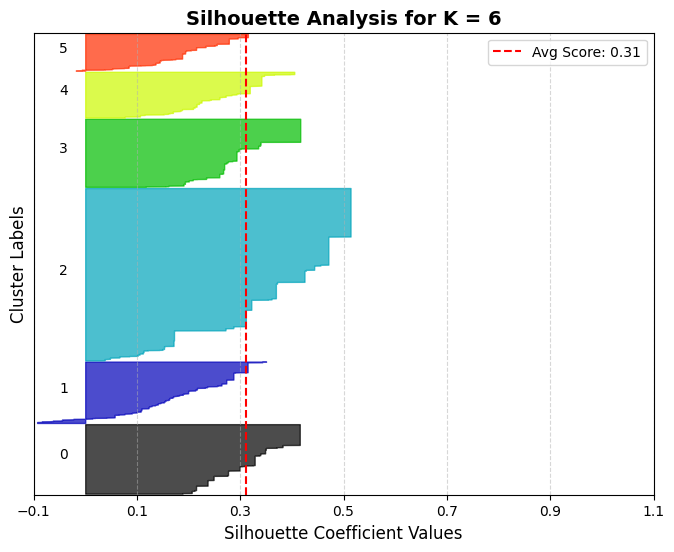

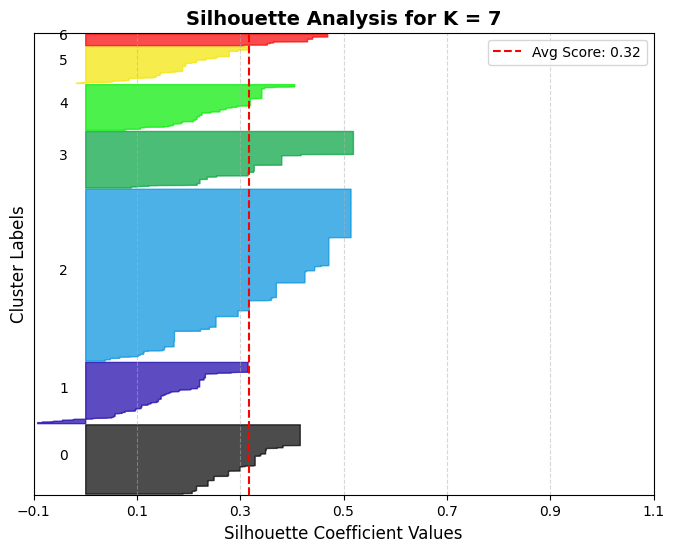

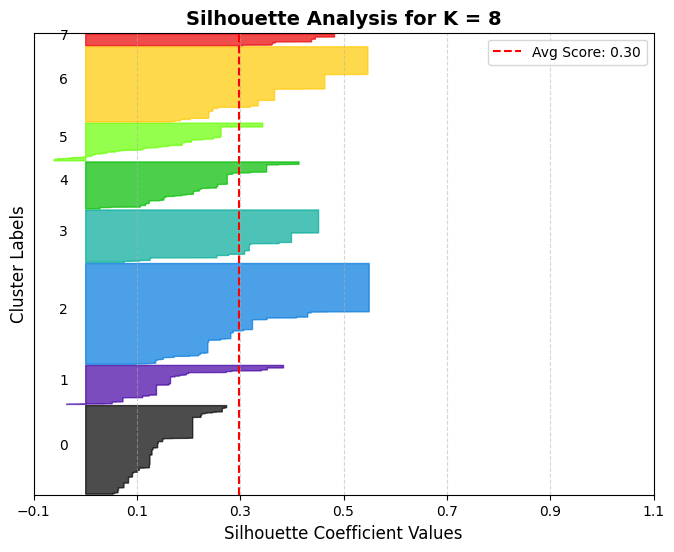

In [685]:
# Define range for number of clusters
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Store silhouette scores for printing before plotting
silhouette_scores = {}

for n_clusters in range_n_clusters:
    # Train K-Means model
    cluster = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = cluster.fit_predict(df_scaled1)

    # Compute average silhouette score
    silhouette_avg = silhouette_score(df_scaled1, cluster_labels)
    silhouette_scores[n_clusters] = silhouette_avg  # Store for later printing

# Print silhouette scores before the plots
print("\nSilhouette Scores for Different Cluster Sizes:\n")
for k, score in silhouette_scores.items():
    print(f"For n_clusters = {k}, Average silhouette_score = {score:.4f}")

# Now, generate silhouette plots
for n_clusters in range_n_clusters:
    fig, ax1 = plt.subplots(figsize=(8, 6))  # Set figure size
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_scaled1) + (n_clusters + 1) * 10])

    # Train K-Means model
    cluster = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = cluster.fit_predict(df_scaled1)

    # Compute silhouette scores
    silhouette_avg = silhouette_score(df_scaled1, cluster_labels)
    sample_silhouette_values = silhouette_samples(df_scaled1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Extract and sort silhouette scores for the current cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)  # Assign unique color per cluster
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plot with cluster number
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # Adjust for next cluster

    # Plot settings
    ax1.set_xlabel("Silhouette Coefficient Values", fontsize=12)
    ax1.set_ylabel("Cluster Labels", fontsize=12)
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--", label=f"Avg Score: {silhouette_avg:.2f}")
    ax1.set_yticks([])
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))
    ax1.legend()

    plt.title(f"Silhouette Analysis for K = {n_clusters}", fontsize=14, fontweight="bold")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()


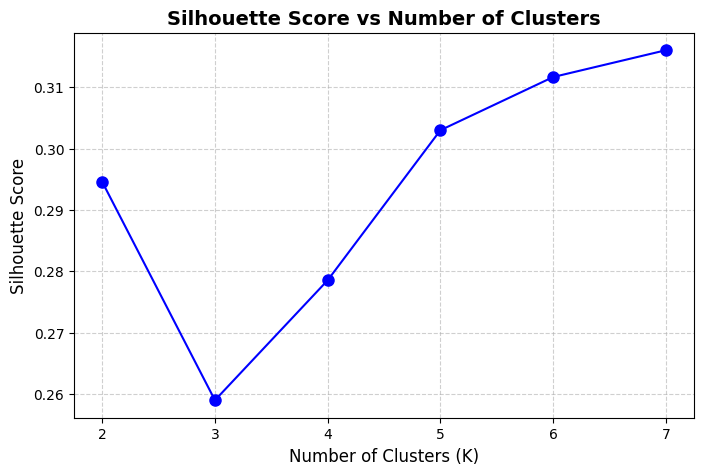

In [686]:
#Alternate way
# Defining range for K (number of clusters)
n_clusters_range = range(2, 8)
silhouette_scores = []

# Computing silhouette scores for each K
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=10, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled1)
    silhouette_scores.append(silhouette_score(df_scaled1, cluster_labels))

# Plotting silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(n_clusters_range, silhouette_scores, marker='o', linestyle='-', color='b', markersize=8)
plt.grid(True, linestyle="--", alpha=0.6)
plt.xlabel("Number of Clusters (K)", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.title("Silhouette Score vs Number of Clusters", fontsize=14, fontweight='bold')
plt.xticks(n_clusters_range)
plt.show()

In [687]:
from sklearn.cluster import KMeans

# Initialize and fit KMeans model with K=6
K_model_6 = KMeans(n_clusters=6, random_state=42, n_init=10)  # Ensuring reproducibility
K_model_6.fit(df_scaled1)

KMeans(n_clusters=6, n_init=10, random_state=42)

In [691]:
# Extract cluster centroids
clusters_centroid_6 = K_model_6.cluster_centers_
print("Cluster Centroids:\n", clusters_centroid_6)

Cluster Centroids:
 [[ 1.17222178 -0.36247309  0.17289878  0.57100856  0.45195603 -0.33246264
   0.35726021 -1.3146828   0.14443228]
 [-0.26537332 -0.0594017   0.31624241 -1.46888425 -0.6442316   1.79077053
   0.45091333  0.23493964 -0.14526962]
 [ 0.27799321  2.64356411 -0.36142992  0.48373609  0.34190613 -0.54459407
   0.39162833 -0.18604601 -0.16604705]
 [-0.29570039 -0.29536443  0.35576476 -1.25015123 -1.37850022  0.8057448
  -2.062112   -0.15220826 -0.24045738]
 [-0.42287392 -0.36247309 -0.25291856  0.55334797  0.36112723 -0.71372234
   0.22998803  0.66216941 -0.83707141]
 [-0.44590028 -0.36247309 -0.18426638  0.50011709  0.45207228 -0.40209986
   0.45091333  0.63462112  1.19464121]]


In [693]:
# Get cluster labels for each data point
labels_6 = K_model_4.labels_
print("Cluster Labels:\n", labels_6)

Cluster Labels:
 [5 5 5 ... 5 5 5]


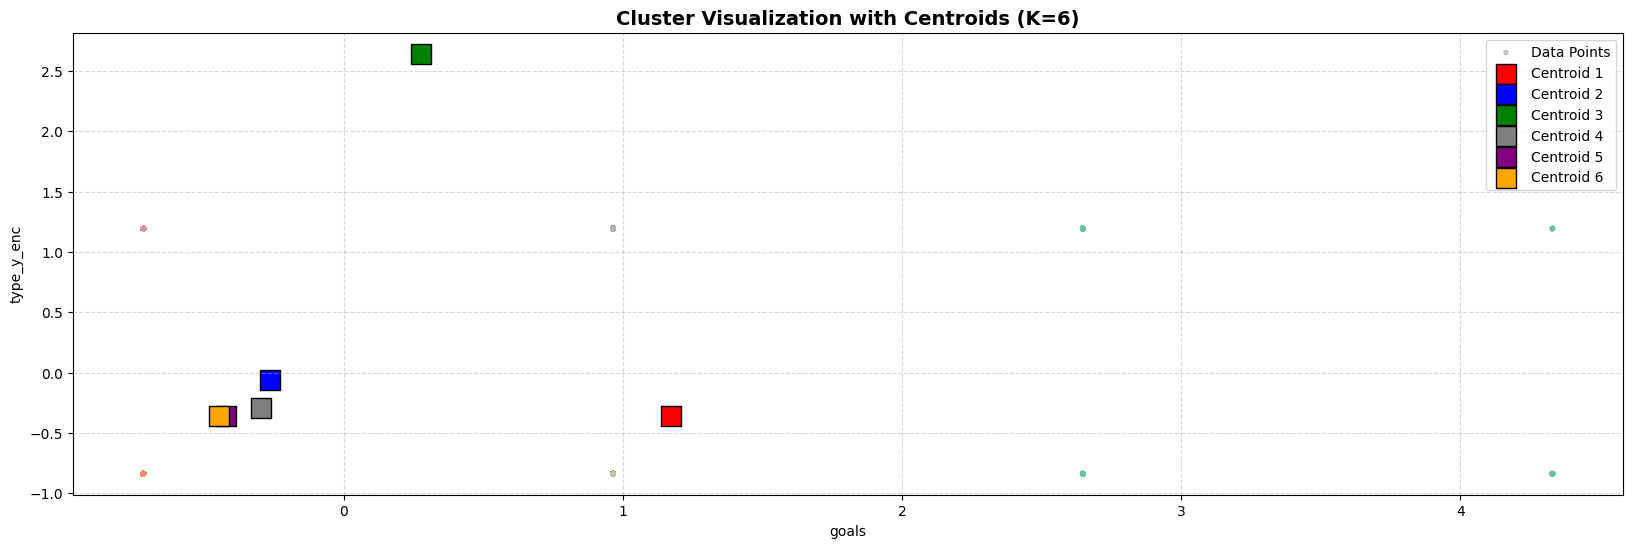

In [695]:
import matplotlib.pyplot as plt

centroid_colors = ["red", "blue", "green", "grey", "purple", "orange"]

plt.figure(figsize=(20, 6))
plt.scatter(df_scaled1.iloc[:, 0], df_scaled1.iloc[:, 8], marker=".", c=labels_6, cmap="Set2", alpha=0.7, label="Data Points")

for i, (x, y) in enumerate(clusters_centroid_4[:, :2]):
    plt.scatter(x, y, s=200, c=centroid_colors[i], marker="s", edgecolors="black", label=f"Centroid {i+1}")

plt.xlabel(df_scaled1.columns[0])
plt.ylabel(df_scaled1.columns[8])
plt.title("Cluster Visualization with Centroids (K=6)", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


The optimal K = 6 means that, based on the evaluation indices (like Calinski-Harabasz and Davies-Bouldin), 6 clusters are determined to be the best choice for grouping the data.

Calinski-Harabasz Index and Davies-Bouldin Index are often used to assess the quality of clustering and can help in selecting the optimal number of clusters. The choice of K = 6 suggests that, with these indices, 6 clusters offer a good balance between compactness and separation of the data points.
In summary:

K = 6 is the best number of clusters for this dataset, as it optimizes the clustering quality, giving relatively well-separated clusters while maintaining reasonable cohesion within each cluster.

Calinski-Harabasz Index (ch_index: 1010.7):
The Calinski-Harabasz Index measures the dispersion between clusters. A value of 1010.7 indicates that the clusters are well-separated, suggesting that our clustering has effectively grouped the data into distinct clusters.

Davies-Bouldin Index (db_index: 1.38):
The Davies-Bouldin Index measures the average similarity between clusters. A value of 1.38 indicates that while the clusters are relatively distinct, there is some overlap or similarity between them. Lower values would indicate better separation.

Brief Interpretation:
Our clustering shows good separation between clusters (high Calinski-Harabasz value).
However, the moderate Davies-Bouldin score suggests there might be some overlap or similarity between a few clusters, though they are still fairly distinct.

In [697]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
df_pca_2d = pca.fit_transform(df_scaled1)

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca_2d[:, 0], y=df_pca_2d[:, 1], hue=labels_4, palette="Set2", alpha=0.7, s=100, edgecolors="k")

# Plot centroids
centroids_2d = pca.transform(clusters_centroid_4)  # Transform centroids to 2D space
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], marker="X", s=200, c="red", label="Centroids", edgecolors="black")

# Labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D Visualization of K-Means Clusters (K=4)", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [699]:
from sklearn.metrics import calinski_harabasz_score
#Assuming we have our data X and cluster labels
ch_index=calinski_harabasz_score(df_scaled1,labels_6)
print("ch_index:",ch_index)

ch_index: 1010.6993388963052


In [701]:
from sklearn.metrics import davies_bouldin_score
db_score=davies_bouldin_score(df_scaled1,labels_6)
db_score
print("db_index:",db_score)

db_index: 1.3830971383958397


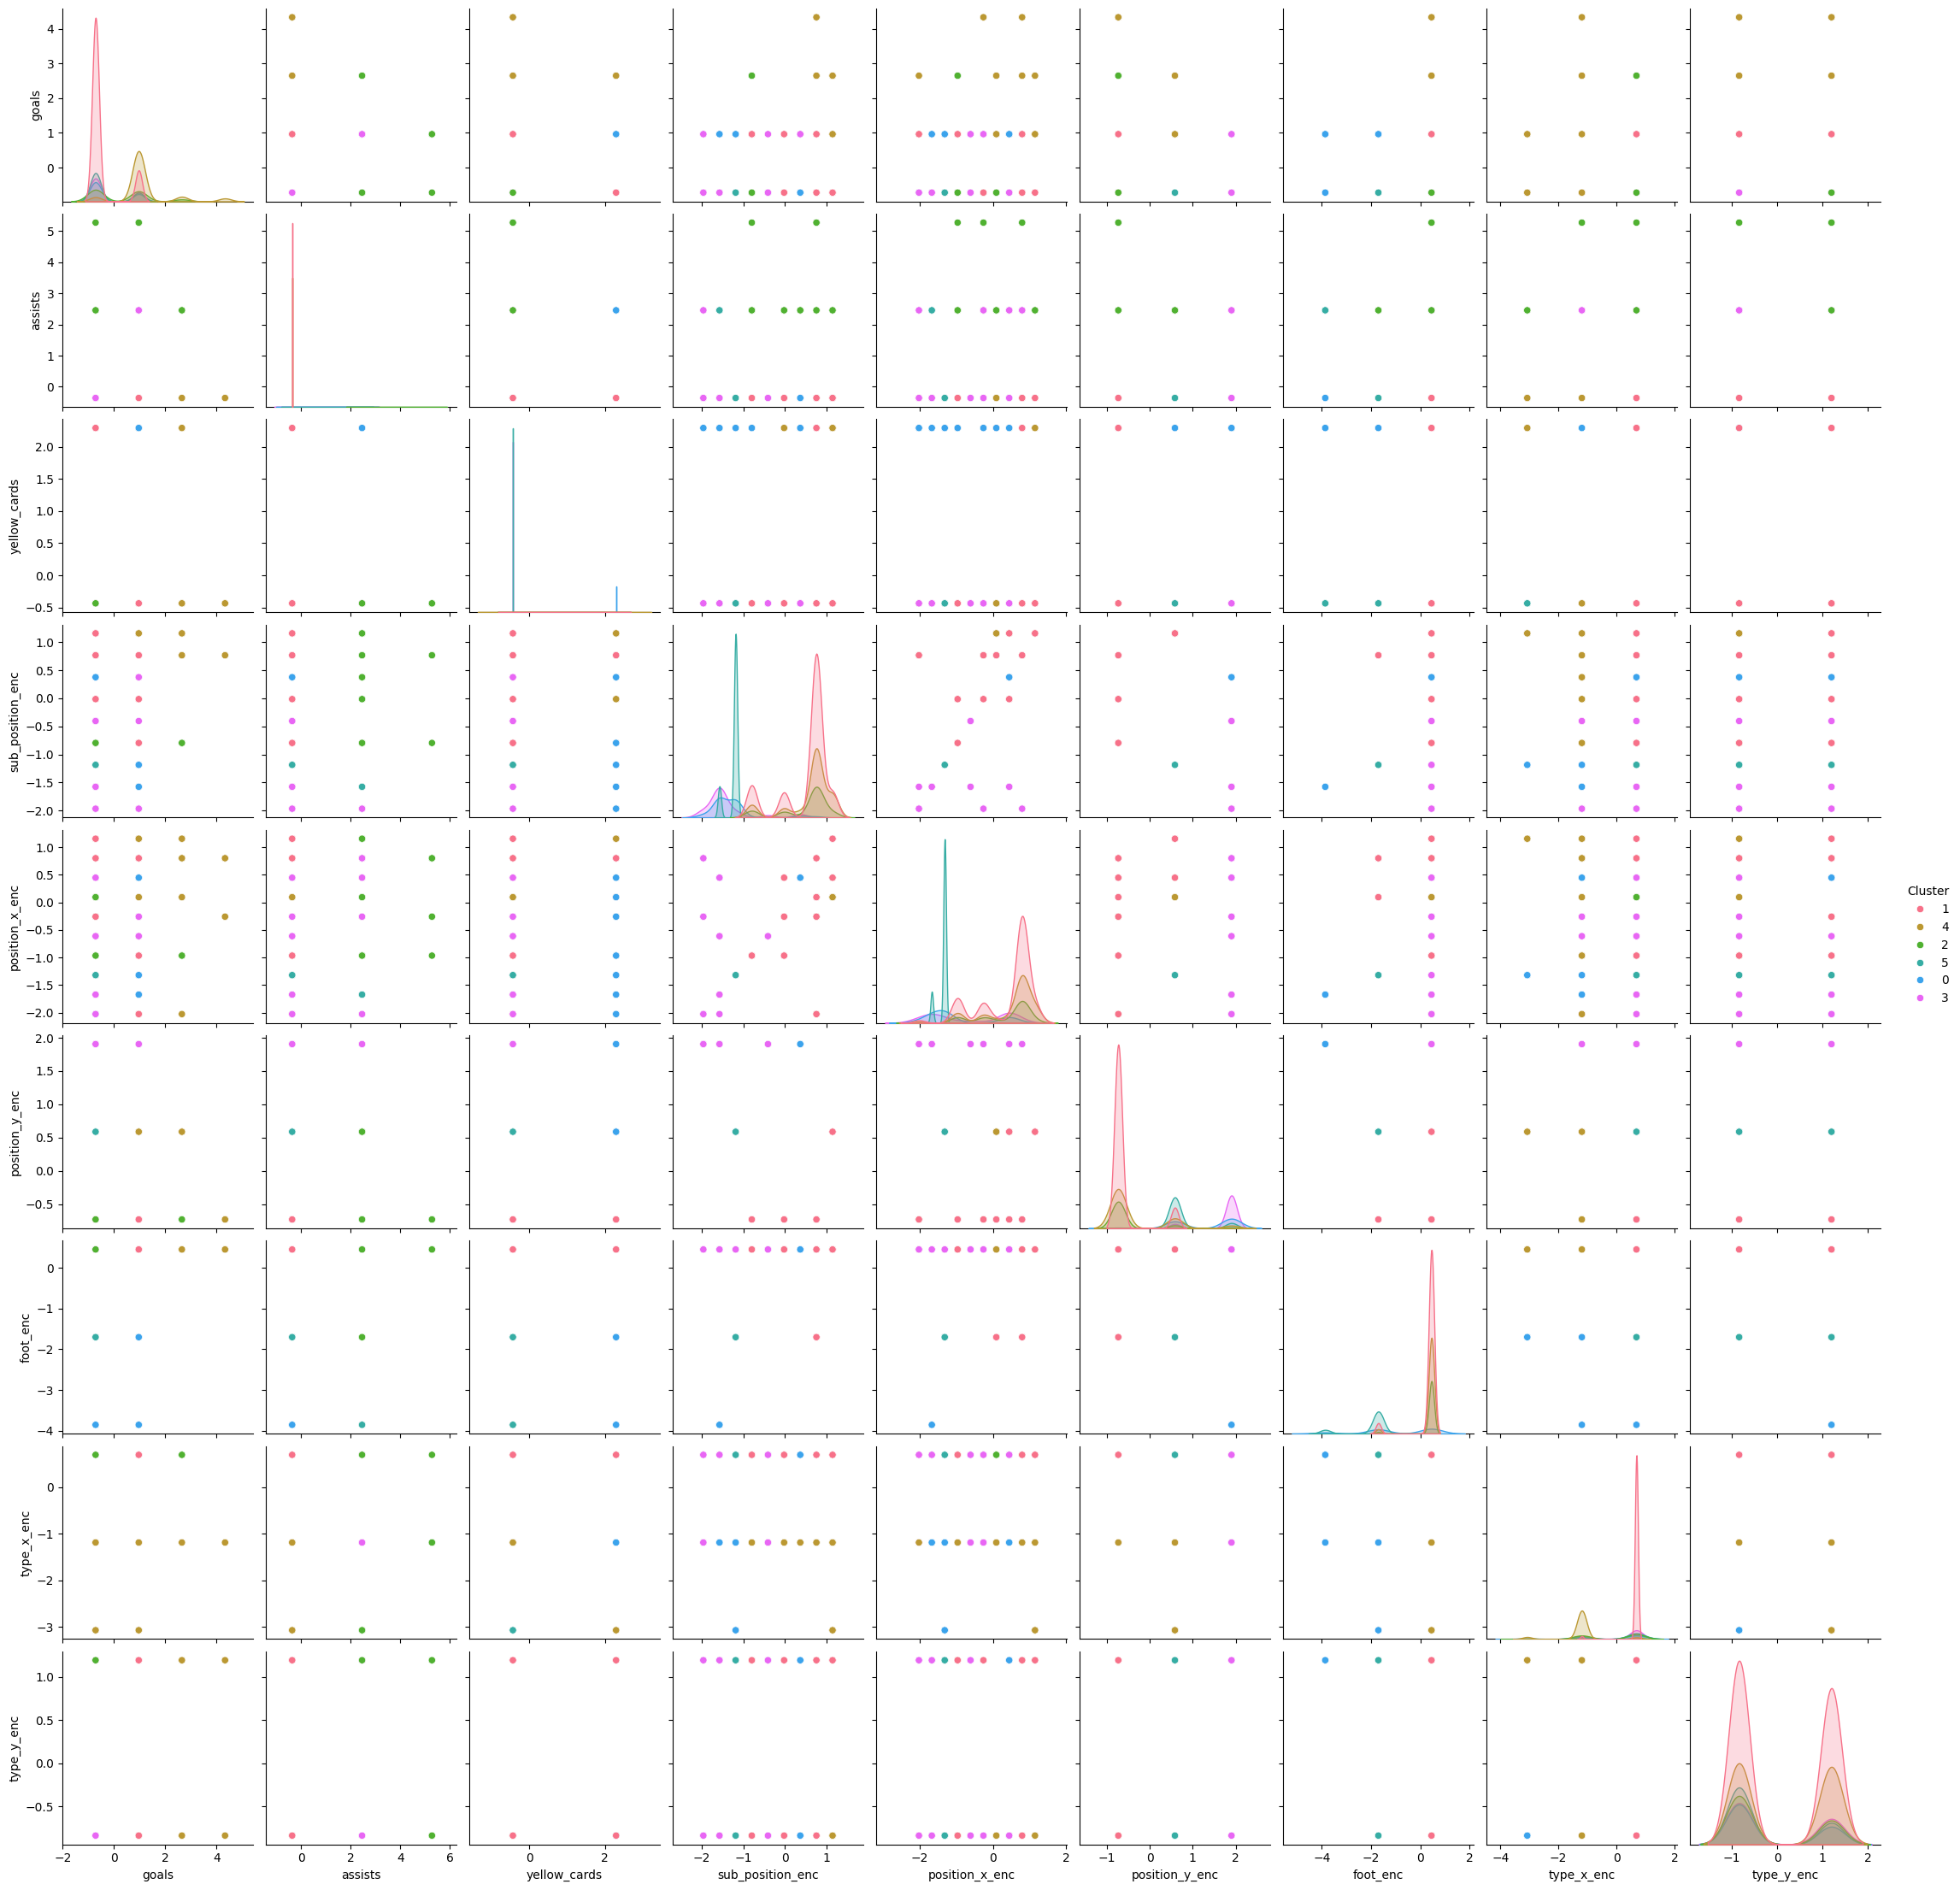

In [703]:
# Apply K-Means clustering
df_cluster = df_scaled1.copy()  # Creating a copy of the scaled data

# Choosing the number of clusters (determined optimal K=6 using the Elbow Method)
kmeans = KMeans(n_clusters=6, random_state=0)  
df_cluster['Cluster'] = kmeans.fit_predict(df_scaled1)

# Converting cluster labels to categorical for better visualization
df_cluster['Cluster'] = df_cluster['Cluster'].astype(str)

# Creating a pair plot to visualize relationships between features and clusters
sns.pairplot(df_cluster, hue="Cluster", diag_kind="kde", palette="husl")
plt.show()

In [372]:
# Loading the Data
file_path = r"C:\Users\selvaraj\Downloads\Football_merged_cleaned.xlsx"
df = pd.read_excel(file_path)
df

Unnamed: 0   appearance_id  yellow_cards  red_cards  goals  assists  \
0              0   2231426_49723             0          0      0        0   
1              1   2231426_49723             0          0      0        0   
2              2   2231426_49723             0          0      0        0   
3              3   2231426_49723             0          0      0        0   
4              4   2231426_49723             0          0      0        0   
...          ...             ...           ...        ...    ...      ...   
4194        4194  3415291_537467             0          0      1        0   
4195        4195  3415291_537467             0          0      1        0   
4196        4196  3415291_537467             0          0      1        0   
4197        4197  3415291_537467             0          0      1        0   
4198        4198  3415291_537467             0          0      1        0   

      minutes_played                     game_event_id  minute  \
0                 70  8b80ccdd11e7e891b29f9ea738a88612      70   
1                 70  8b80ccdd11e7e891b29f9ea738a88612      70   
2                 70  8b80ccdd11e7e891b29f9ea738a88612      70   
3                 70  8b80ccdd11e7e891b29f9ea738a88612      70   
4                 70  8b80ccdd11e7e891b29f9ea738a88612      70   
...              ...                               ...     ...   
4194              77  2c1bc4101fb8b426e84b9b5d55eb5783      77   
4195              77  2c1bc4101fb8b426e84b9b5d55eb5783      77   
4196              77  2c1bc4101fb8b426e84b9b5d55eb5783      77   
4197              77  2c1bc4101fb8b426e84b9b5d55eb5783      77   
4198              77  2c1bc4101fb8b426e84b9b5d55eb5783      77   

         description  ... date_of_birth    sub_position   foot height_in_cm  \
0     , Not reported  ...    1990-03-29      Right-Back  right          186   
1     , Not reported  ...    1990-03-29      Right-Back  right          186   
2     , Not reported  ...    1990-03-29      Right-Back  right          186   
3     , Not reported  ...    1990-03-29      Right-Back  right          186   
4     , Not reported  ...    1990-03-29      Right-Back  right          186   
...              ...  ...           ...             ...    ...          ...   
4194         Unknown  ...    1996-08-29  Centre-Forward  right          176   
4195         Unknown  ...    1996-08-29  Centre-Forward  right          176   
4196         Unknown  ...    1996-08-29  Centre-Forward  right          176   
4197         Unknown  ...    1996-08-29  Centre-Forward  right          176   
4198         Unknown  ...    1996-08-29  Centre-Forward  right          176   

      market_value_in_eur  highest_market_value_in_eur  \
0                  700000                      5000000   
1                  700000                      5000000   
2                  700000                      5000000   
3                  700000                      5000000   
4                  700000                      5000000   
...                   ...                          ...   
4194               300000                       600000   
4195               300000                       600000   
4196               300000                       600000   
4197               300000                       600000   
4198               300000                       600000   

      contract_expiration_date  agent_name       player_name        position  
0                   2025-06-30     Unknown  Timothy Chandler      Right-Back  
1                   2025-06-30     Unknown  Timothy Chandler      Right-Back  
2                   2025-06-30     Unknown  Timothy Chandler      Right-Back  
3                   2025-06-30     Unknown  Timothy Chandler      Right-Back  
4                   2025-06-30     Unknown  Timothy Chandler      Right-Back  
...                        ...         ...               ...             ...  
4194                2026-06-30  TOP Agency     Joseph Efford  Centre-Forward  
4195      

In [373]:
df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.date
df["date"]

0       2012-09-21
1       2012-09-21
2       2012-09-21
3       2012-09-21
4       2012-09-21
           ...    
4194    2020-09-26
4195    2020-09-26
4196    2020-09-26
4197    2020-09-26
4198    2020-09-26
Name: date, Length: 4199, dtype: object

In [374]:
# Establishing Connection
try:
    conn = pymysql.connect(host="localhost",user="root",password="mayuri1999",database="Football_data")
    cursor = conn.cursor()
    print("Connected to MySQL")

except pymysql.MySQLError as e:
    print(f"MySQL Error: {e}")
    exit()

Connected to MySQL


In [375]:
# Selecting relevant columns for Player_Stats 
player_stats_columns = ['player_id', 'player_name', 'team_captain', 'height_in_cm', 'goals', 'assists']
player_stats_data = df[player_stats_columns].drop_duplicates(subset=['player_id']).head(500)

# Selecting relevant columns for Match_Results
match_results_columns = ['game_id', 'date', 'home_club_name', 'away_club_name', 'home_club_goals', 'away_club_goals']
match_results_data = df[match_results_columns].drop_duplicates(subset=['game_id']).head(500)

# Selecting Relevant Columns for the New Table
player_game_stats_columns = ['player_id', 'player_name', 'team_captain', 'height_in_cm', 'goals', 'assists', 'game_id']
player_game_stats_data = df[player_game_stats_columns].drop_duplicates(subset=['player_id']).head(500)

# Converting data to list of dictionaries for SQL insertion
player_stats_records = player_stats_data.to_dict(orient='records')
match_results_records = match_results_data.to_dict(orient='records')
player_game_stats_records = player_game_stats_data.to_dict(orient='records')

In [376]:
import pymysql

# Connecting to MySQL
conn = pymysql.connect(
    host="localhost",
    user="root",
    password="mayuri1999",
    database="Football_data")
cursor = conn.cursor()
print("Connected to MySQL!")


Connected to MySQL!


In [377]:
# Creating Player_Stats Table
cursor.execute("""
CREATE TABLE IF NOT EXISTS Player_Stats (player_id INT PRIMARY KEY,player_name VARCHAR(100),
team_captain BOOLEAN,height_in_cm INT,goals INT,assists INT);""")

# Creating Match_Results Table
cursor.execute("""CREATE TABLE IF NOT EXISTS Match_Results (game_id INT PRIMARY KEY,match_date DATE,home_team VARCHAR(100),away_team VARCHAR(100),home_goals INT,
away_goals INT);""")

# Creating player_game_stats Table
cursor.execute("""
    create table if not exists player_game_stats (
        id int auto_increment primary key,
        player_id int,
        player_name varchar(255),
        team_captain boolean,
        height_in_cm int,
        goals int,
        assists int,
        game_id int,
        foreign key (game_id) references match_results(game_id) on delete cascade);""")

print("Tables created successfully!")


Tables created successfully!


In [378]:
# Inserting 500 Rows into Player_Stats
player_stats_query = """
INSERT INTO Player_Stats (player_id, player_name, team_captain, height_in_cm, goals, assists) 
VALUES (%(player_id)s, %(player_name)s, %(team_captain)s, %(height_in_cm)s, %(goals)s, %(assists)s)
ON DUPLICATE KEY UPDATE 
    player_name = VALUES(player_name),
    team_captain = VALUES(team_captain),
    height_in_cm = VALUES(height_in_cm),
    goals = VALUES(goals),
    assists = VALUES(assists);
"""
cursor.executemany(player_stats_query, player_stats_records)

# Inserting 500 Rows into Match_Results
match_results_query = """
INSERT INTO Match_Results (game_id, date, home_club_name, away_club_name, home_club_goals, away_club_goals) 
VALUES (%(game_id)s, %(date)s, %(home_club_name)s, %(away_club_name)s, %(home_club_goals)s, %(away_club_goals)s)
ON DUPLICATE KEY UPDATE 
    date = VALUES(date),
    home_club_name = VALUES(home_club_name),
    away_club_name = VALUES(away_club_name),
    home_club_goals = VALUES(home_club_goals),
    away_club_goals = VALUES(away_club_goals);
"""
cursor.executemany(match_results_query, match_results_records)

print("Inserted 500 rows into both tables!")

# Insert Data into New Table
player_game_stats_query = """
    insert into player_game_stats (player_id, player_name, team_captain, height_in_cm, goals, assists, game_id)
    values (%(player_id)s, %(player_name)s, %(team_captain)s, %(height_in_cm)s, %(goals)s, %(assists)s, %(game_id)s)
    on duplicate key update
        player_name = values(player_name),
        team_captain = values(team_captain),
        height_in_cm = values(height_in_cm),
        goals = values(goals),
        assists = values(assists),
        game_id = values(game_id);
"""

print("Inserted 500 rows into all tables")
cursor.executemany(player_game_stats_query, player_game_stats_records)
conn.commit()


Inserted 500 rows into both tables!
Inserted 500 rows into all tables


In [379]:
# Execute query first
cursor.execute("SELECT * FROM Player_Stats LIMIT 5;")  # Fetch only 5 rows for testing
player_stats_rows = cursor.fetchall()

# Fetching column names dynamically
columns = [col[0] for col in cursor.description] 

# Converting to DataFrame
player_stats_df = pd.DataFrame(player_stats_rows, columns=columns)

# Printing the first 5 rows
player_stats_df.head()

player_id          player_name  team_captain            position  \
0      49723     Timothy Chandler             0          Right-Back   
1     103064        Terrence Boyd             0      Centre-Forward   
2     124732  John Anthony Brooks             0         Centre-Back   
3     145466             Tim Ream             0         Centre-Back   
4     161204         Julian Green             0  Defensive Midfield   

       sub_position   foot  height_in_cm  market_value_in_eur  \
0        Right-Back  right           186               700000   
1    Centre-Forward  right           188               750000   
2       Centre-Back   left           194              2000000   
3       Centre-Back   left           186              1000000   
4  Central Midfield  right           173              1000000   

   highest_market_value_in_eur  goals  assists  minutes_played  
0                      5000000      0        0              70  
1                      1750000      0        0              74  
2                     15000000      1        0              90  
3                      4000000      0        0              54  
4                      2000000      0        0              45

In [380]:
# Closing connection
cursor.close()
conn.close()
print("cursor close")

cursor close
